In [702]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [703]:
df = pd.read_csv('modify.csv')
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   
3            1       89             66             23       94  28.1   
4            4      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [704]:
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  768
Columns  :  9

Features : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing values :   0

Unique values :  
 Pregnancies                  16
Glucose                     135
BloodPressure                46
SkinThickness                50
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [705]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

0    500
1    268
Name: Outcome, dtype: int64


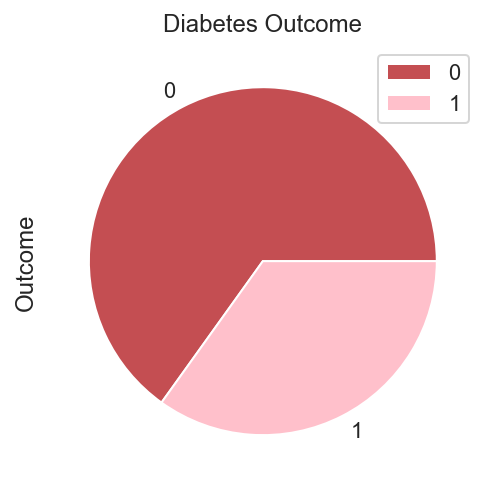

In [706]:
# value_counts command is to give no.of 0's and 1's in outcome column
#legend command is to give thae which outcomes is belongs to which color
df = pd.read_csv('modify.csv')
print(df.Outcome.value_counts())
color=['r',"pink"]
df['Outcome'].value_counts().plot.pie(colors=color).set_title('Diabetes Outcome')
plt.legend()
plt.show()

In [707]:
df.Outcome.value_counts()[1] / df.Outcome.count()

0.3489583333333333

In [708]:
df.Outcome.value_counts()[0] / df.Outcome.count()

0.6510416666666666

In [709]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.423177  121.656250      72.386719      29.108073  140.671875   
std       2.980481   30.438286      12.096642       8.791221   86.383060   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.750000      64.000000      25.000000  121.500000   
50%       4.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

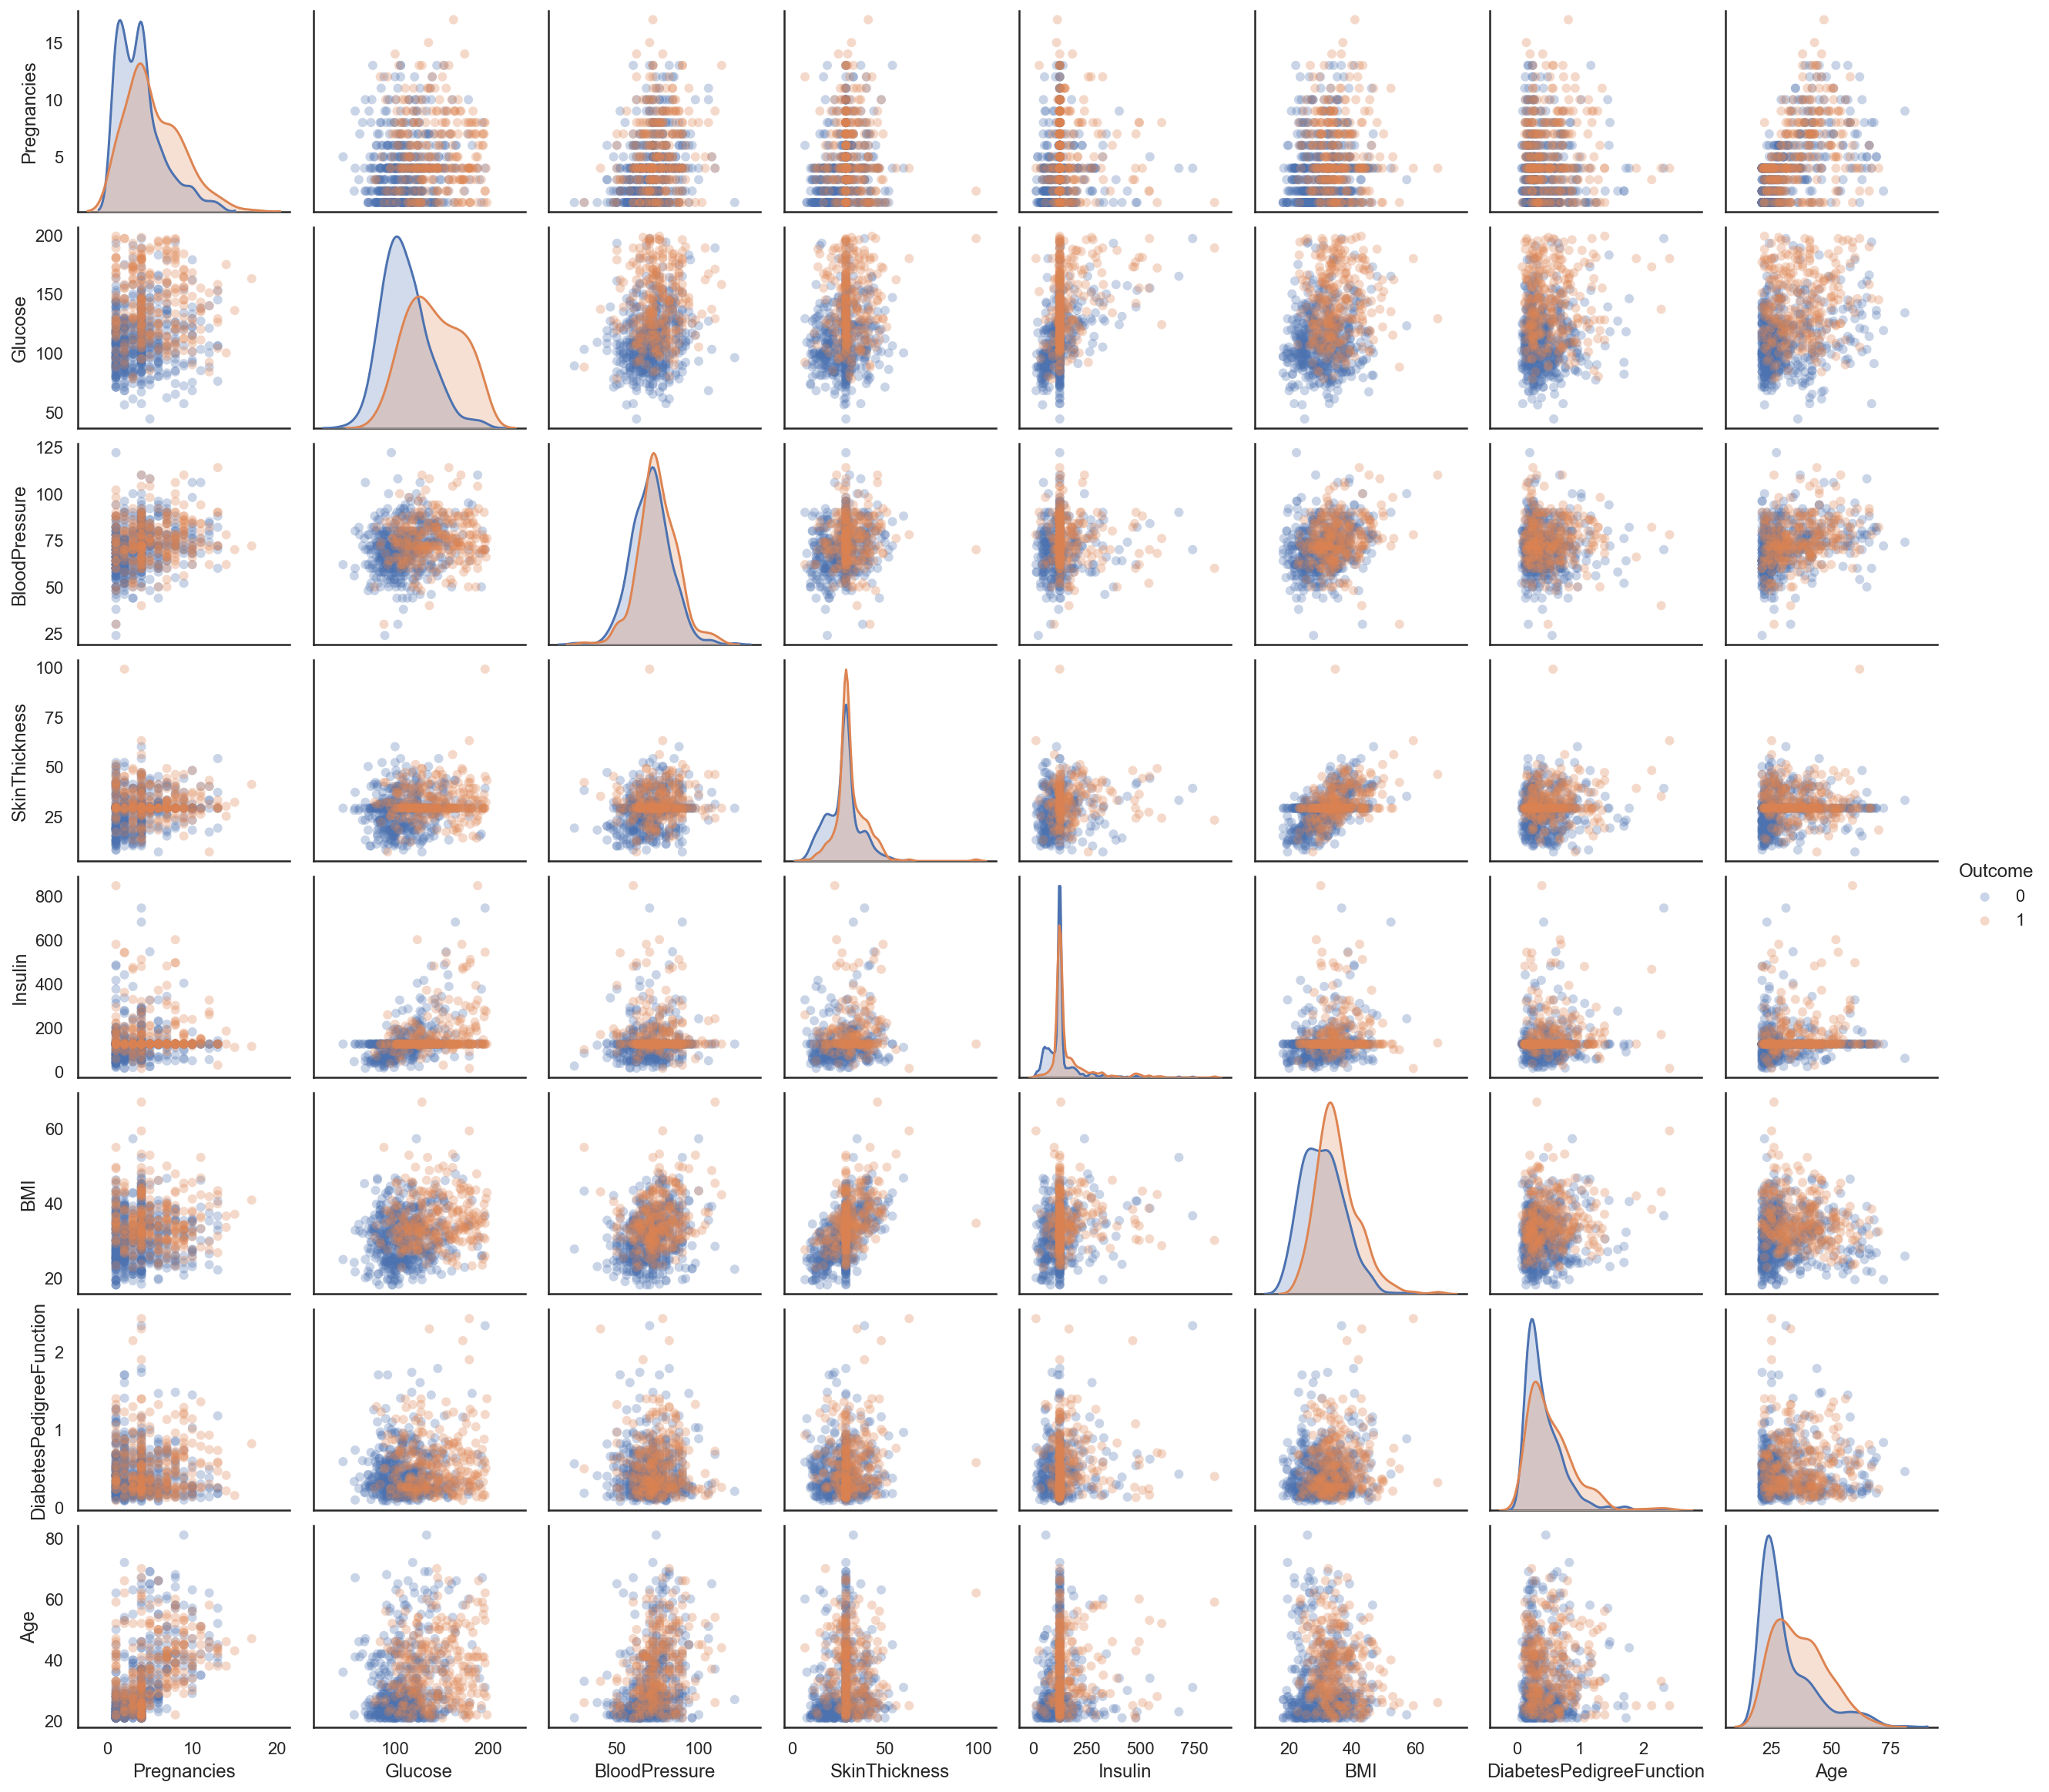

In [710]:
sns.pairplot(df, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

(9.5, -0.5)

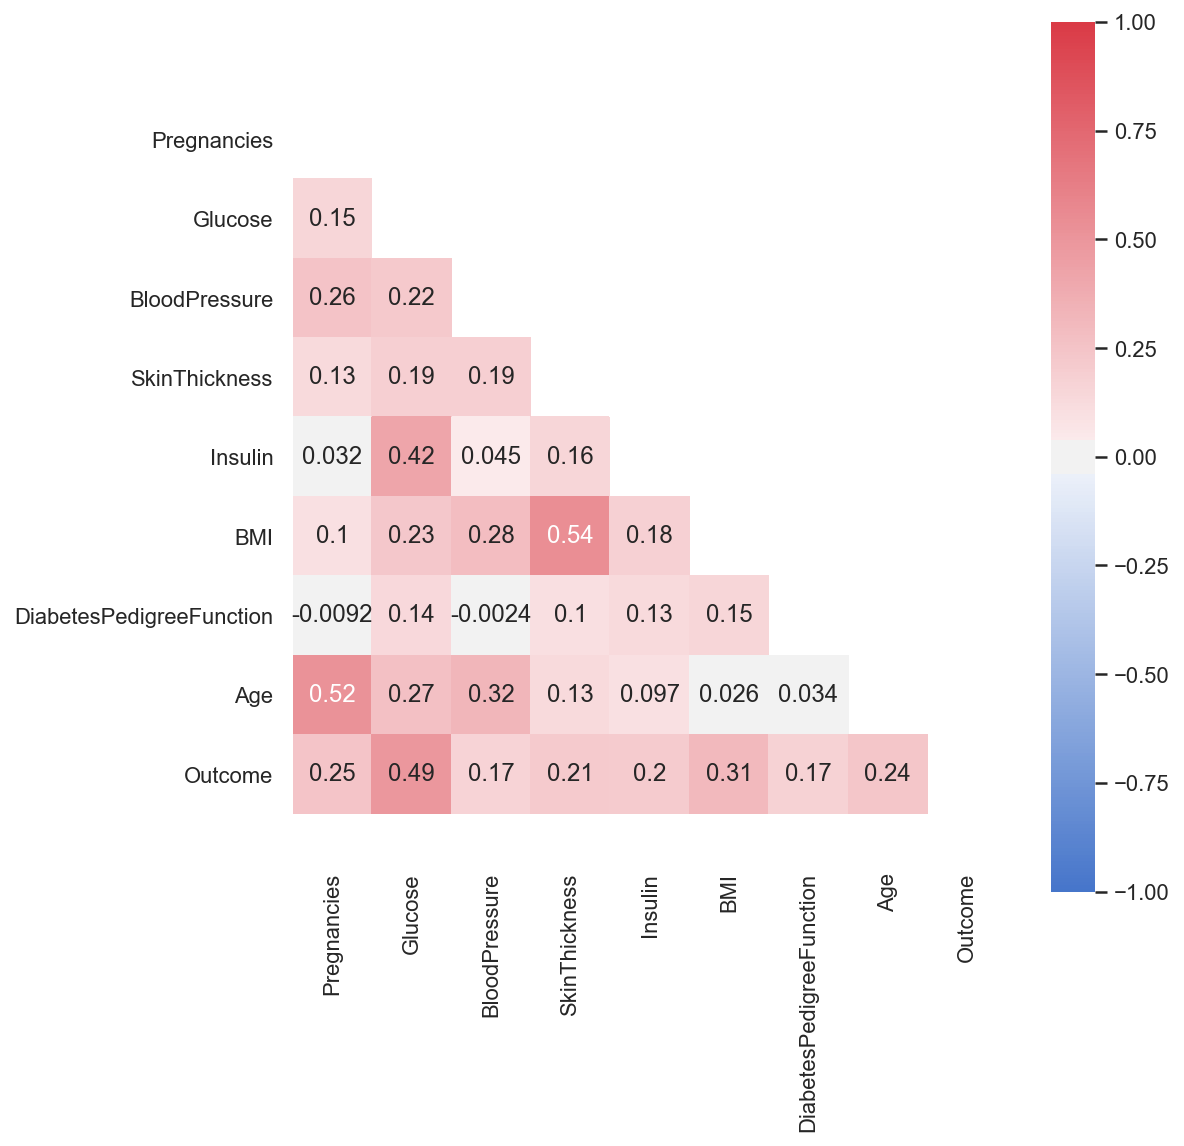

In [711]:

sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(8,8))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

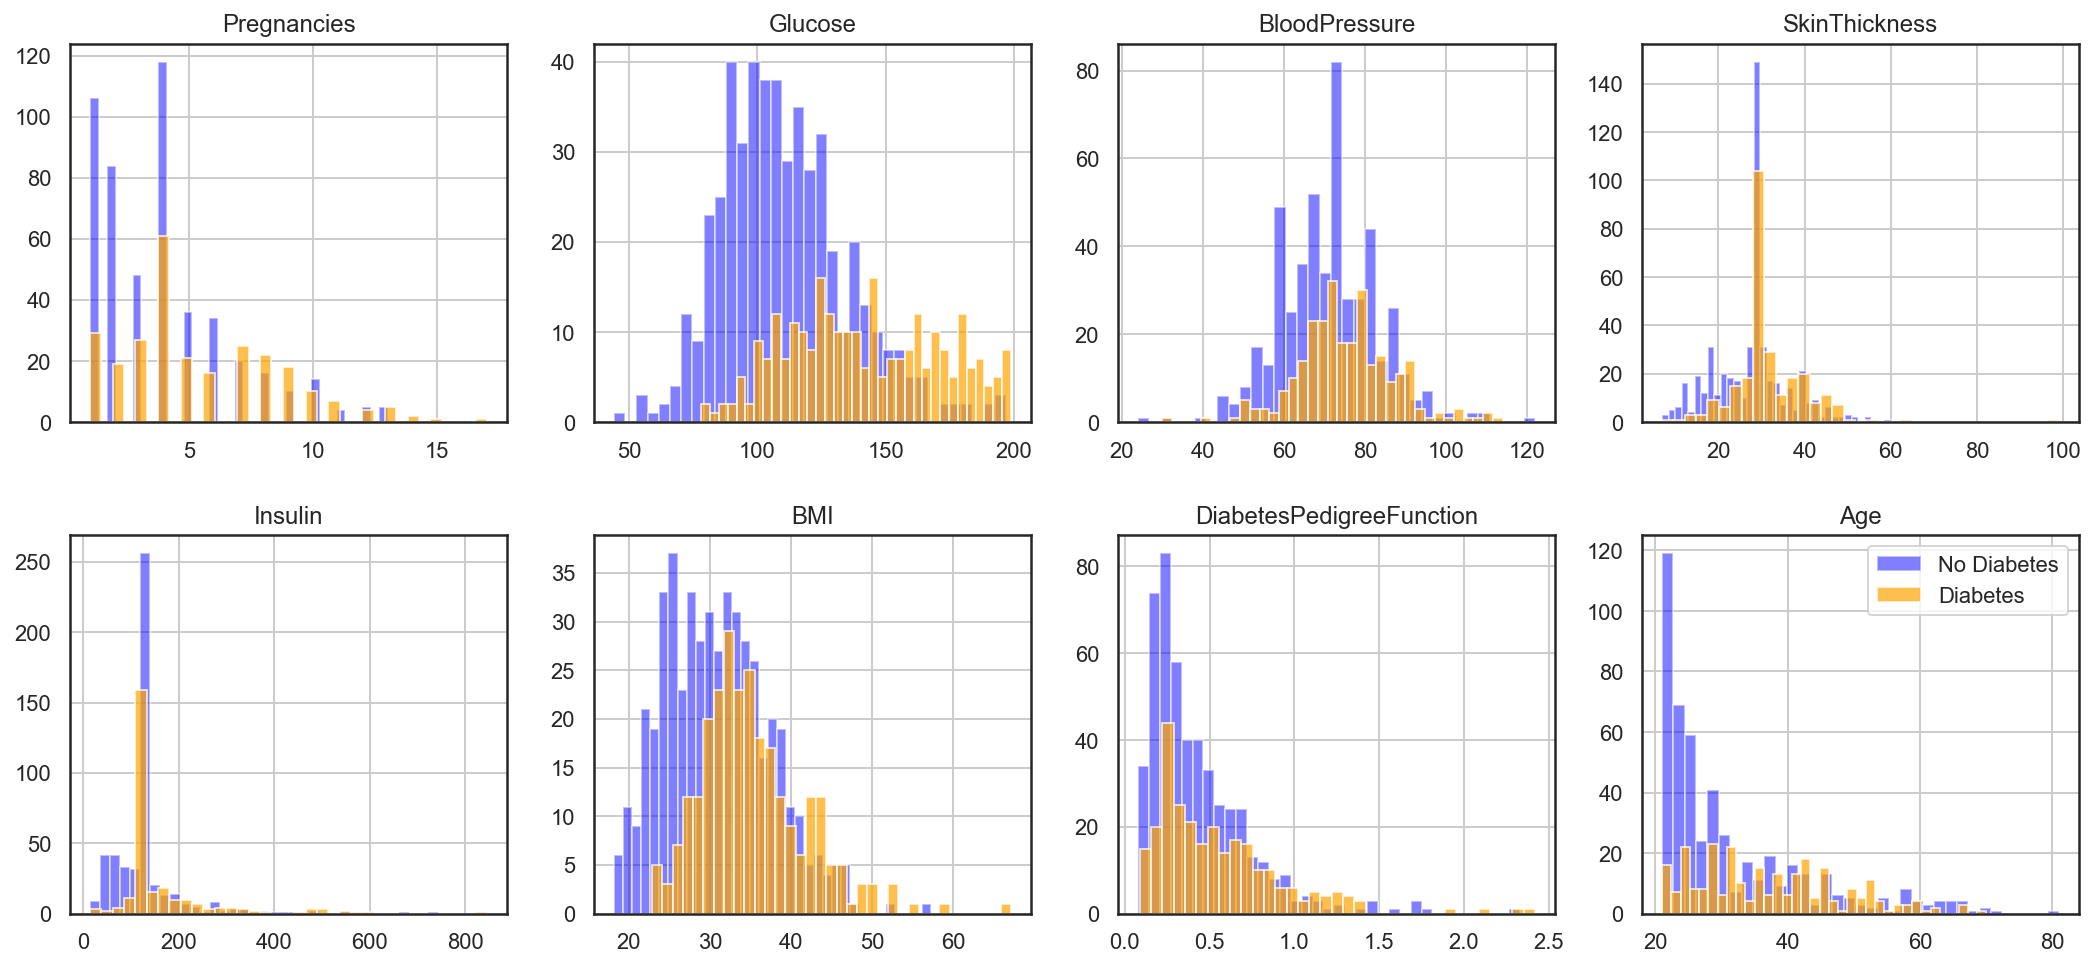

In [712]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

In [713]:

X, y = df.drop('Outcome', axis=1), df['Outcome']
print(X.shape, y.shape)

(768, 8) (768,)


Text(0.5, 1.0, 'Top Features derived by Random Forest')

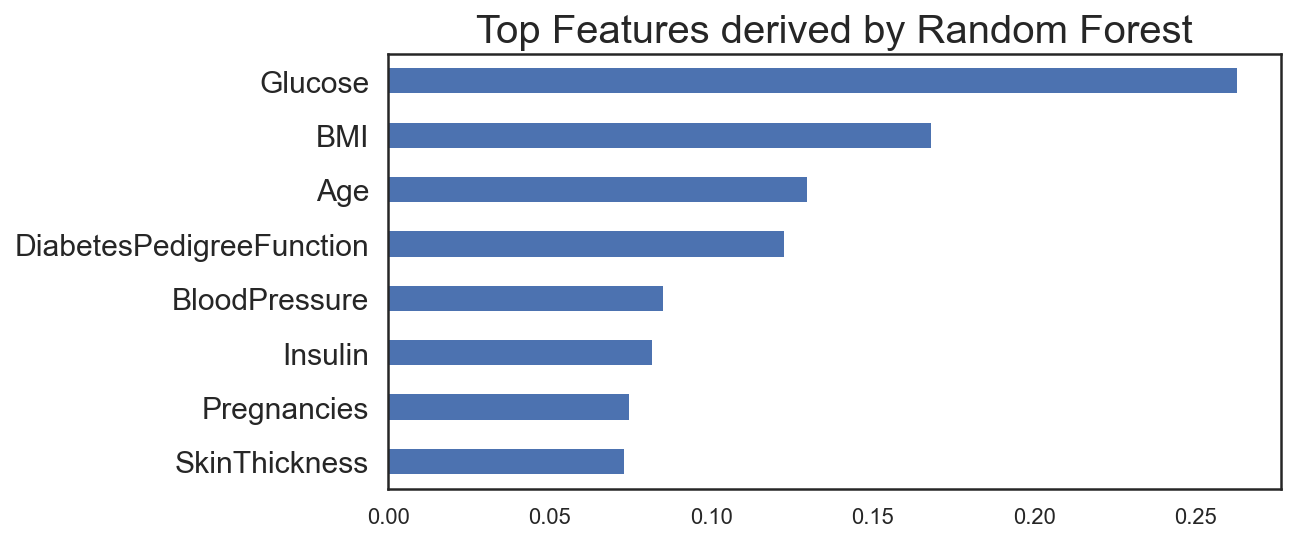

In [714]:
rfc = RandomForestClassifier(random_state=SEED, n_estimators=100)

# Train model, note that NO scaling is required
rfc_model = rfc.fit(X, y)

# Plot the top features based on its importance
(pd.Series(rfc_model.feature_importances_, index=X.columns)
    .nlargest(10)   # can adjust based on how many top features you want
    .plot(kind='barh', figsize=[8,4])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

In [715]:
X = df.drop('Outcome', axis=1)   # axis=0 for row, axis=1 for column
y = df['Outcome']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


BASE MODEL EVALUATION

In [716]:
def evaluate(model, X_test , y_test,modelname):
  y_pred1=model.predict(X_test)
  precision    = precision_score(y_test, y_pred1)
  recall       = recall_score(y_test, y_pred1)
  f1score      = f1_score(y_test, y_pred1) 
  rocauc       = roc_auc_score(y_test, y_pred1)
  logloss      = log_loss(y_test, y_pred1)
  accuracy     = accuracy_score(y_test, y_pred1)

  df_model1 = pd.DataFrame({  'model'        : [modelname],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [time2]   
                                }) 
  return df_model1

In [717]:
%%time
time2=time.time()
print("base model")
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test,modelname)
model1 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model1.timetaken[0] = time.time() - time2



base model
Wall time: 528 ms


In [718]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

time2=time.time()
print("base model")
base_model1 = ExtraTreesClassifier()
base_model1.fit(X_train, y_train)
model2 = evaluate(base_model1,  X_test,  y_test, 'Extra Tree')
model2.timetaken[0] = time.time() - time2



base model
Wall time: 1.22 s


In [719]:
%%time
time2=time.time()
print("base model")
base_model2 = LogisticRegression()
base_model2.fit(X_train, y_train)
model3 = evaluate(base_model2,  X_test,  y_test, 'Logistic Regression')
model3.timetaken[0] = time.time() - time2


base model
Wall time: 78.2 ms


In [720]:
%%time
time2=time.time()
print("base model")
base_model3 = KNeighborsClassifier()
base_model3.fit(X_train, y_train)
model4 = evaluate(base_model3,  X_test,  y_test, 'KNN')
model4.timetaken[0] = time.time() - time2


base model
Wall time: 41.8 ms


In [721]:
%%time
time2=time.time()
print("base model")
base_model4 = LinearSVC()
base_model4.fit(X_train, y_train)
model5 = evaluate(base_model4,  X_test,  y_test, 'LinearSVC')
model5.timetaken[0] = time.time() - time2



base model
Wall time: 99.6 ms


In [722]:
%%time
time2=time.time()
print("base model")
base_model5 = GaussianNB()
base_model5.fit(X_train, y_train)
model6 = evaluate(base_model5,  X_test,  y_test, 'GaussianNB')
model6.timetaken[0] = time.time() - time2


base model
Wall time: 16.2 ms


In [723]:
%%time
time2=time.time()
print("base model")
base_model6=SVC()
base_model6.fit(X_train, y_train)
model7 = evaluate(base_model6,  X_test,  y_test, 'SVC')
model7.timetaken[0] = time.time() - time2


base model
Wall time: 49.4 ms


In [724]:
%%time
time2=time.time()
print("base model")
base_model7=DecisionTreeClassifier()
base_model7.fit(X_train, y_train)
model8 = evaluate(base_model7,  X_test,  y_test, 'Decision Tree')
model8.timetaken[0] = time.time() - time2


base model
Wall time: 27.8 ms


In [725]:
df_base= pd.concat([model1,model2,model3,model4,model5,model6,model7,model8],axis = 0).reset_index()
df_base.drop('index', axis=1, inplace=True)
df_base

model  accuracy  precision    recall   f1score    rocauc  \
0         RandomForest  0.740260   0.659091  0.537037  0.591837  0.693519   
1           Extra Tree  0.733766   0.627451  0.592593  0.609524  0.701296   
2  Logistic Regression  0.740260   0.659091  0.537037  0.591837  0.693519   
3                  KNN  0.688312   0.560000  0.518519  0.538462  0.649259   
4            LinearSVC  0.649351   0.000000  0.000000  0.000000  0.500000   
5           GaussianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.720779   0.648649  0.444444  0.527473  0.657222   
7        Decision Tree  0.675325   0.547619  0.425926  0.479167  0.617963   

     logloss  timetaken  
0   8.971189   0.527565  
1   9.195487   1.216379  
2   8.971189   0.078193  
3  10.765447   0.041798  
4  12.111000   0.099567  
5  10.316912   0.016155  
6   9.644012   0.049407  
7  11.213987   0.027816

### HYPERPARAMETER TECHNIQUE

RANDOMIZED SEARCH CV

In [726]:
from sklearn.model_selection import RandomizedSearchCV

In [727]:
%%time
time1 = time.time()
random_grid={'bootstrap': [True],
 'max_depth': [None],
 'max_features': ['auto'],
 'min_samples_leaf': [1], #intial 1
 'min_samples_split': [5],
 'n_estimators': [800]}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
best_random = rf_random.best_estimator_
model11=evaluate(best_random,  X_test,  y_test, 'RandomForest')
model11.timetaken[0] = time.time() - time1
print("randomized model of Random Forest")
print("confusion matrix")
y_pred2=best_random.predict(X_test)
print(confusion_matrix(y_test, y_pred2))




Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.9s finished


randomized model of Random Forest
confusion matrix
[[84 16]
 [23 31]]
Wall time: 7.3 s


In [728]:
print("Classification report of Random Forest")
print('\n')
clf = RandomForestClassifier(**rf_random.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Random Forest


              precision    recall  f1-score   support

           0     0.7850    0.8400    0.8116       100
           1     0.6596    0.5741    0.6139        54

    accuracy                         0.7468       154
   macro avg     0.7223    0.7070    0.7127       154
weighted avg     0.7410    0.7468    0.7423       154



In [729]:
%%time
time1 = time.time()
param_grid_et={'bootstrap': [False],
 'max_depth': [70],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [5],
 'n_estimators': [1600]
 }
etc = ExtraTreesClassifier(random_state=42)
ETC = RandomizedSearchCV(estimator = etc, param_distributions = param_grid_et, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ETC.fit(X_train, y_train)
best_ETC = ETC.best_estimator_
model12=evaluate(best_ETC,  X_test,  y_test, 'Extra Tree')
model12.timetaken[0] = time.time() - time1
print("randomized model of Extra Tree")
print("confusion matrix")
y_pred2=best_ETC.predict(X_test)
print(confusion_matrix(y_test, y_pred2))



Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.1s finished


randomized model of Extra Tree
confusion matrix
[[87 13]
 [27 27]]
Wall time: 15 s


In [730]:
print("Classification report of Extra Tree")
print('\n')
clf = ExtraTreesClassifier(**ETC.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Extra Tree


              precision    recall  f1-score   support

           0     0.7632    0.8700    0.8131       100
           1     0.6750    0.5000    0.5745        54

    accuracy                         0.7403       154
   macro avg     0.7191    0.6850    0.6938       154
weighted avg     0.7322    0.7403    0.7294       154



In [731]:
%%time
time1 = time.time()
param_grid_lr={'C': [6.0],
 'max_iter': [490],
 'solver': ['newton-cg'],
 }
Lr = LogisticRegression(random_state=42)
LR = RandomizedSearchCV(estimator = Lr, param_distributions = param_grid_lr, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
LR.fit(X_train, y_train)
best_LR = LR.best_estimator_
model13=evaluate(best_LR,  X_test,  y_test, 'Logistic Regression')
model13.timetaken[0] = time.time() - time1
print("randomized model of Logistic Regression")
print("confusion matrix")
y_pred2=best_LR.predict(X_test)
print(confusion_matrix(y_test, y_pred2))



Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


randomized model of Logistic Regression
confusion matrix
[[80 20]
 [26 28]]
Wall time: 2.93 s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished


In [732]:
print("Classification report of Logistic Regression")
print('\n')
clf = LogisticRegression(**LR.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Logistic Regression


              precision    recall  f1-score   support

           0     0.7547    0.8000    0.7767       100
           1     0.5833    0.5185    0.5490        54

    accuracy                         0.7013       154
   macro avg     0.6690    0.6593    0.6629       154
weighted avg     0.6946    0.7013    0.6969       154



In [733]:
%%time
time1 = time.time()
param_grid_kn={'algorithm': ['auto'], 'leaf_size': [200], 'p': [3]} #intial p is 2
knn = KNeighborsClassifier(n_neighbors=42)
KNN = RandomizedSearchCV(estimator = knn, param_distributions = param_grid_kn, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
KNN.fit(X_train, y_train)

best_KNN = KNN.best_estimator_
model14=evaluate(best_KNN,  X_test,  y_test, 'KNN')
model14.timetaken[0] = time.time() - time1
print("randomized model of KNN")
print("confusion matrix")
y_pred2=best_KNN.predict(X_test)
print(confusion_matrix(y_test, y_pred2))


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


randomized model of KNN
confusion matrix
[[83 17]
 [26 28]]
Wall time: 317 ms


In [734]:
print("Classification report of KNN")
print('\n')
clf = KNeighborsClassifier(**KNN.best_params_, n_neighbors=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of KNN


              precision    recall  f1-score   support

           0     0.7615    0.8300    0.7943       100
           1     0.6222    0.5185    0.5657        54

    accuracy                         0.7208       154
   macro avg     0.6918    0.6743    0.6800       154
weighted avg     0.7126    0.7208    0.7141       154



In [735]:
%%time
time1 = time.time()
param_grid_lsvc={
    'class_weight': [None], 'dual': [False], 'intercept_scaling': [8], 'tol': [1e-05], 'max_iter' : [200]
}
lsvc =LinearSVC(random_state=42)
LSVC = RandomizedSearchCV(estimator = lsvc, param_distributions = param_grid_lsvc, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
LSVC.fit(X_train, y_train)

best_LSVC= LSVC.best_estimator_
model15=evaluate(best_LSVC,  X_test,  y_test, 'LinearSVC')
model15.timetaken[0] = time.time() - time1
print("randomized model of LinearSVC")
print("confusion matrix")
y_pred2=best_LSVC.predict(X_test)
print(confusion_matrix(y_test, y_pred2))



Fitting 3 folds for each of 1 candidates, totalling 3 fits
randomized model of LinearSVC
confusion matrix
[[82 18]
 [27 27]]
Wall time: 78.7 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [736]:
print("Classification report of LinearSVC")
print('\n')
clf = LinearSVC(**LSVC.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of LinearSVC


              precision    recall  f1-score   support

           0     0.7523    0.8200    0.7847       100
           1     0.6000    0.5000    0.5455        54

    accuracy                         0.7078       154
   macro avg     0.6761    0.6600    0.6651       154
weighted avg     0.6989    0.7078    0.7008       154



In [737]:
%%time
time1 = time.time()
param_grid_gnb={ 'priors': [None], 'var_smoothing': [1e-20]   #intaial -09
}
gnb =GaussianNB()
GNB = RandomizedSearchCV(estimator = gnb, param_distributions = param_grid_gnb, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
GNB.fit(X_train, y_train)

best_GNB= GNB.best_estimator_
model16=evaluate(best_GNB,  X_test,  y_test, 'GassuianNB')
model16.timetaken[0] = time.time() - time1
print("randomized model of GaussianNB")
print("confusion matrix")
y_pred2=best_GNB.predict(X_test)
print(confusion_matrix(y_test, y_pred2))


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


randomized model of GaussianNB
confusion matrix
[[74 26]
 [20 34]]
Wall time: 66.1 ms


In [738]:
print("Classification report of GaussianNB")
print('\n')
clf = GaussianNB(**GNB.best_params_)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of GaussianNB


              precision    recall  f1-score   support

           0     0.7872    0.7400    0.7629       100
           1     0.5667    0.6296    0.5965        54

    accuracy                         0.7013       154
   macro avg     0.6770    0.6848    0.6797       154
weighted avg     0.7099    0.7013    0.7045       154



In [739]:
%%time
time1 = time.time()
param_grid_svc={'break_ties': [True],
               'cache_size': [211], 
               'degree' : [8],
               'class_weight': [None],
               'tol': [0.01] 
               }
svc=SVC(random_state=42)
SVc = RandomizedSearchCV(estimator = svc, param_distributions = param_grid_svc, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
SVc.fit(X_train, y_train)

best_SVc= SVc.best_estimator_
model17=evaluate(best_SVc,  X_test,  y_test, 'SVC')
model17.timetaken[0] = time.time() - time1
print("randomized model of SVC")
print("confusion matrix")
y_pred2=best_SVc.predict(X_test)
print(confusion_matrix(y_test, y_pred2))


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


randomized model of SVC
confusion matrix
[[87 13]
 [30 24]]
Wall time: 121 ms


In [740]:
print("Classification report of SVC")
print('\n')
clf = SVC(**SVc.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of SVC


              precision    recall  f1-score   support

           0     0.7436    0.8700    0.8018       100
           1     0.6486    0.4444    0.5275        54

    accuracy                         0.7208       154
   macro avg     0.6961    0.6572    0.6647       154
weighted avg     0.7103    0.7208    0.7056       154



In [741]:
%%time
time1 = time.time()
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt={
 'class_weight': [None],
 'max_depth': [60],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [10]
}
DTC = RandomizedSearchCV(estimator = dt, param_distributions = param_grid_dt, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
DTC.fit(X_train, y_train)

best_DTC= DTC.best_estimator_
model18=evaluate(best_DTC,  X_test,  y_test, 'Decision Tree')
model18.timetaken[0] = time.time() - time1
print("randomized model of Decision Tree")
print("confusion matrix")
y_pred2=best_DTC.predict(X_test)
print(confusion_matrix(y_test, y_pred2))




Fitting 3 folds for each of 1 candidates, totalling 3 fits
randomized model of Decision Tree
confusion matrix
[[81 19]
 [26 28]]
Wall time: 186 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [742]:
print("Classification report of Decision Tree")
print('\n')
clf = DecisionTreeClassifier(**DTC.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Decision Tree


              precision    recall  f1-score   support

           0     0.7570    0.8100    0.7826       100
           1     0.5957    0.5185    0.5545        54

    accuracy                         0.7078       154
   macro avg     0.6764    0.6643    0.6685       154
weighted avg     0.7005    0.7078    0.7026       154



In [743]:
df_randomized= pd.concat([model11,model12,model13,model14,model15,model16,model17,model18],axis = 0).reset_index()
df_randomized.drop('index', axis=1, inplace=True)
df_randomized

model  accuracy  precision    recall   f1score    rocauc  \
0         RandomForest  0.746753   0.659574  0.574074  0.613861  0.707037   
1           Extra Tree  0.740260   0.675000  0.500000  0.574468  0.685000   
2  Logistic Regression  0.701299   0.583333  0.518519  0.549020  0.659259   
3                  KNN  0.720779   0.622222  0.518519  0.565657  0.674259   
4            LinearSVC  0.707792   0.600000  0.500000  0.545455  0.660000   
5           GassuianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.720779   0.648649  0.444444  0.527473  0.657222   
7        Decision Tree  0.707792   0.595745  0.518519  0.554455  0.664259   

     logloss  timetaken  
0   8.746916   7.077144  
1   8.971178  14.604259  
2  10.316881   2.920889  
3   9.644032   0.227777  
4  10.092593   0.070647  
5  10.316912   0.060392  
6   9.644012   0.101501  
7  10.092598   0.177592

### NATURE INSPIRIED ALGORITHM

In [744]:
! pip install sklearn_nature_inspired_algorithms==0.4.3
! pip install NiaPy
! pip install algorithms
from sklearn_nature_inspired_algorithms.model_selection.nature_inspired_search_cv import NatureInspiredSearchCV
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_lineplot
from sklearn.metrics import classification_report


BAT ALGORITHM

In [745]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()

param_grid={'bootstrap': [True],
 'max_depth': [70],
 'max_features': ['auto'],
 'min_samples_leaf':[2], #Intial condition is 1 but changed to 2
 'min_samples_split': [5],
 'n_estimators': [800]
 }

clf_1 = RandomForestClassifier(random_state=42)
nia_search = NatureInspiredSearchCV(
    clf_1,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42)
    
    # or any number if you want same results on each run


nia_search.fit(X_train, y_train)
print("Bat model")

print("Random Forest")

ba_random= nia_search.best_estimator_
model21=evaluate(ba_random, X_test, y_test,'Random Forest')
model21.timetaken[0] = time.time() - time1
print("Confusion matrix")
y_pred3=ba_random.predict(X_test)
print(confusion_matrix(y_test, y_pred3))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.7s finished


Bat model
Random Forest
Confusion matrix
[[85 15]
 [22 32]]
Wall time: 9.79 s


<AxesSubplot:xlabel='generation', ylabel='max score'>

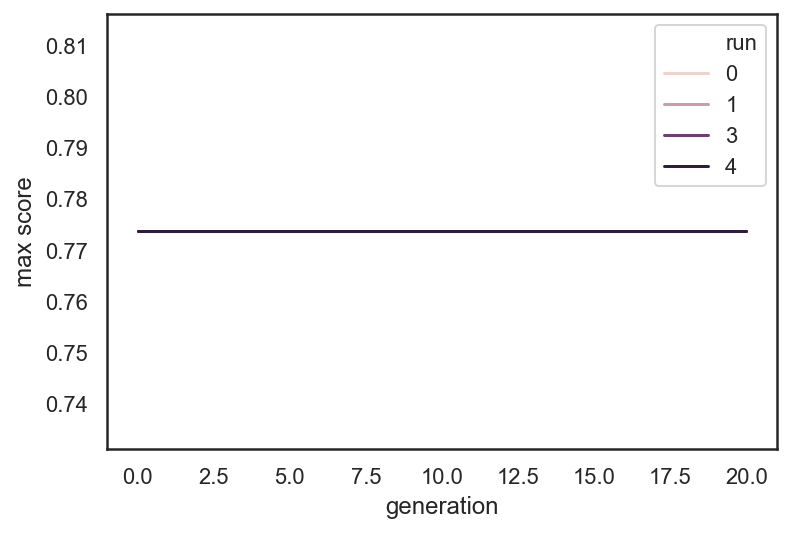

In [746]:
score_by_generation_lineplot(nia_search)



In [747]:
print("Classification report of Random Forest")
print('\n')
clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Random Forest


              precision    recall  f1-score   support

           0     0.7944    0.8500    0.8213       100
           1     0.6809    0.5926    0.6337        54

    accuracy                         0.7597       154
   macro avg     0.7376    0.7213    0.7275       154
weighted avg     0.7546    0.7597    0.7555       154



In [748]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={'bootstrap': [True],
 'max_depth': [110],
 'max_features': ['auto'],
 'min_samples_leaf':[2], #intaial 1
 'min_samples_split': [5],
 'n_estimators': [800]}
clf_2 = ExtraTreesClassifier(random_state=42)

nia_search2 = NatureInspiredSearchCV(
    clf_2,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42
)
    # or any number if you want same results on each run


nia_search2.fit(X_train, y_train)
print("Bat model")

print("Extra Tree")

ba_et= nia_search2.best_estimator_
model22=evaluate(ba_et,  X_test,  y_test, 'Extra Tree')
model22.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_et.predict(X_test)
print(confusion_matrix(y_test, y_pred3))

Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.1s finished


Bat model
Extra Tree
confusion matrix
[[88 12]
 [27 27]]
Wall time: 8.4 s


<AxesSubplot:xlabel='generation', ylabel='max score'>

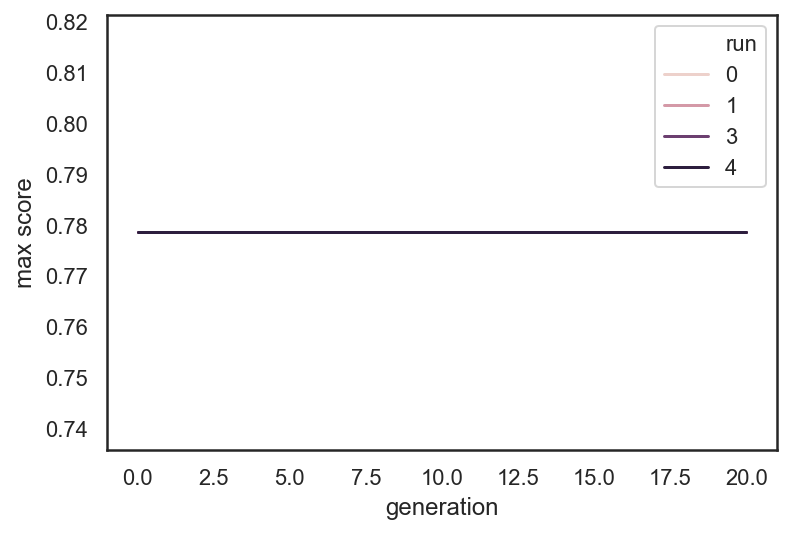

In [749]:
score_by_generation_lineplot(nia_search2)


In [750]:
print("Classification report of Extra Tree")
print('\n')
clf = ExtraTreesClassifier(**nia_search2.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Extra Tree


              precision    recall  f1-score   support

           0     0.7652    0.8800    0.8186       100
           1     0.6923    0.5000    0.5806        54

    accuracy                         0.7468       154
   macro avg     0.7288    0.6900    0.6996       154
weighted avg     0.7397    0.7468    0.7352       154



In [751]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid_lr={'max_iter': [1200], 'solver': ['newton-cg'], 'C': [4.0]}
clf_1 = LogisticRegression(random_state=42)

nia_search1 = NatureInspiredSearchCV(
    clf_1,
    param_grid_lr,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search1.fit(X_train, y_train)
print("Bat model")

print("Logistic Regression")

ba_lr= nia_search1.best_estimator_
model23=evaluate(ba_lr,  X_test,  y_test, 'Logistic Regression')
model23.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred3))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Bat model
Logistic Regression
confusion matrix
[[80 20]
 [26 28]]
Wall time: 970 ms


<AxesSubplot:xlabel='generation', ylabel='max score'>

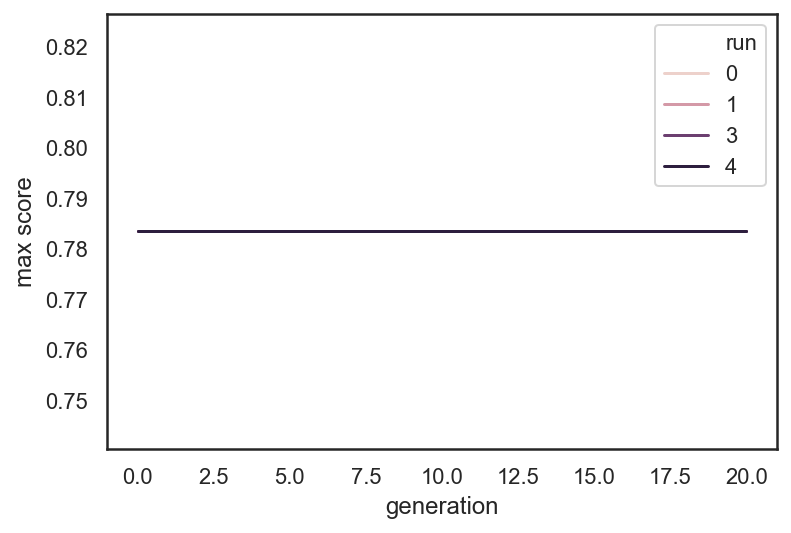

In [752]:
score_by_generation_lineplot(nia_search1)



In [753]:
print("Classification report of Logistic Regression")
print('\n')
clf = LogisticRegression(**nia_search1.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Logistic Regression


              precision    recall  f1-score   support

           0     0.7547    0.8000    0.7767       100
           1     0.5833    0.5185    0.5490        54

    accuracy                         0.7013       154
   macro avg     0.6690    0.6593    0.6629       154
weighted avg     0.6946    0.7013    0.6969       154



In [754]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
clf_4 = KNeighborsClassifier(n_neighbors=42)
param_grid={'algorithm': ['kd_tree'], 'leaf_size': [133], 'p': [2]} 
nia_search4 = NatureInspiredSearchCV(
    clf_4,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search4.fit(X_train, y_train)
print("Bat model")

print("KNN")

ba_kn= nia_search4.best_estimator_
model24=evaluate(ba_kn , X_test,  y_test, 'KNN')
model24.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_kn.predict(X_test)
print(confusion_matrix(y_test, y_pred3))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Bat model
KNN
confusion matrix
[[84 16]
 [26 28]]
Wall time: 901 ms


<AxesSubplot:xlabel='generation', ylabel='max score'>

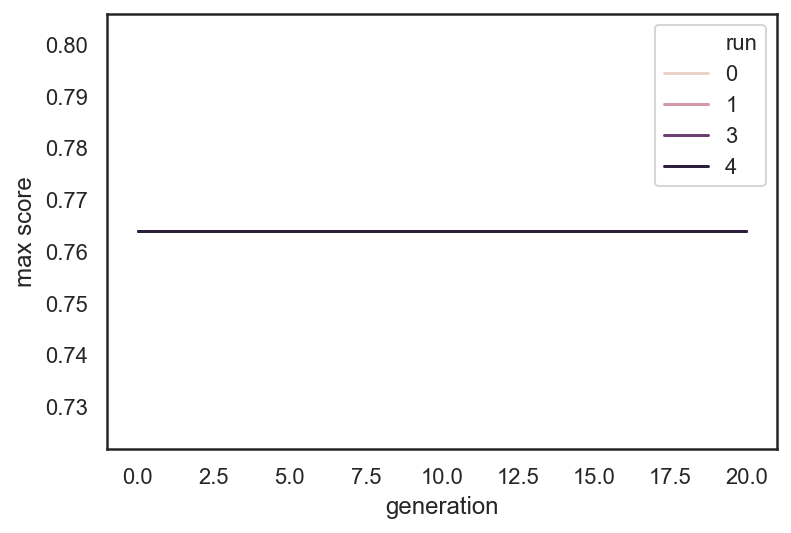

In [755]:
score_by_generation_lineplot(nia_search4)



In [756]:
print("Classification report of KNN")
print('\n')
clf =KNeighborsClassifier(**nia_search4.best_params_, n_neighbors=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of KNN


              precision    recall  f1-score   support

           0     0.7636    0.8400    0.8000       100
           1     0.6364    0.5185    0.5714        54

    accuracy                         0.7273       154
   macro avg     0.7000    0.6793    0.6857       154
weighted avg     0.7190    0.7273    0.7199       154



In [757]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid_lsvc={'dual': [False], 'intercept_scaling': [50], 'tol': [1e-05], 'max_iter': [1700]
                 }
clf_5 = LinearSVC(random_state=42)

nia_search5 = NatureInspiredSearchCV(
    clf_5,
    param_grid_lsvc,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search5.fit(X_train, y_train)
print("Bat model")

print("LinearSVC")

ba_lsvc= nia_search5.best_estimator_
model25=evaluate(ba_lsvc , X_test,  y_test, 'LinearSVC')
model25.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_lsvc.predict(X_test)
print(confusion_matrix(y_test, y_pred3))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Bat model
LinearSVC
confusion matrix
[[82 18]
 [27 27]]
Wall time: 797 ms


<AxesSubplot:xlabel='generation', ylabel='max score'>

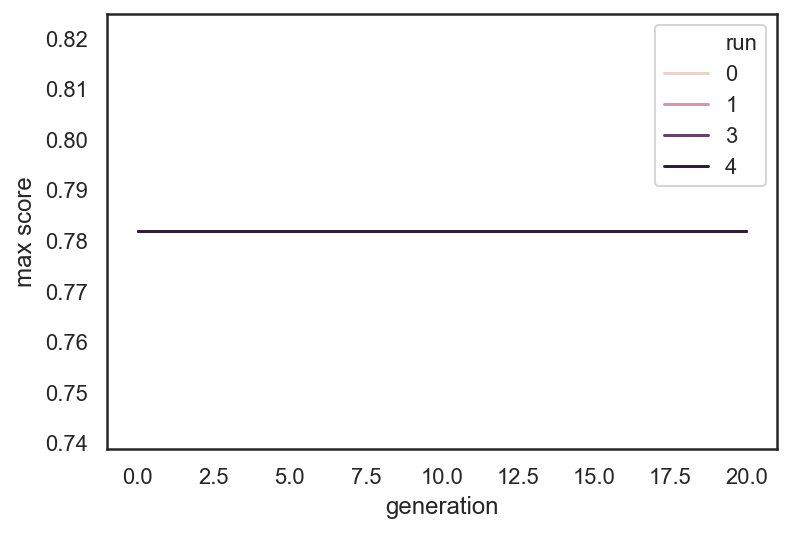

In [758]:
score_by_generation_lineplot(nia_search5)



In [759]:
print("Classification report of LinearSVC")
print('\n')
clf =LinearSVC(**nia_search5.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of LinearSVC


              precision    recall  f1-score   support

           0     0.7523    0.8200    0.7847       100
           1     0.6000    0.5000    0.5455        54

    accuracy                         0.7078       154
   macro avg     0.6761    0.6600    0.6651       154
weighted avg     0.6989    0.7078    0.7008       154



In [760]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid_gnb={'priors' :[None], 'var_smoothing' : [1e-20]}
clf_6 = GaussianNB()

nia_search6 = NatureInspiredSearchCV(
    clf_6,
    param_grid_gnb,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search6.fit(X_train, y_train)
print("Bat model")

print("GaussianNB")

ba_gnb= nia_search6.best_estimator_
model26=evaluate(ba_gnb , X_test,  y_test, 'GaussianNB')
model26.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred3))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Bat model
GaussianNB
confusion matrix
[[74 26]
 [20 34]]
Wall time: 839 ms


<AxesSubplot:xlabel='generation', ylabel='max score'>

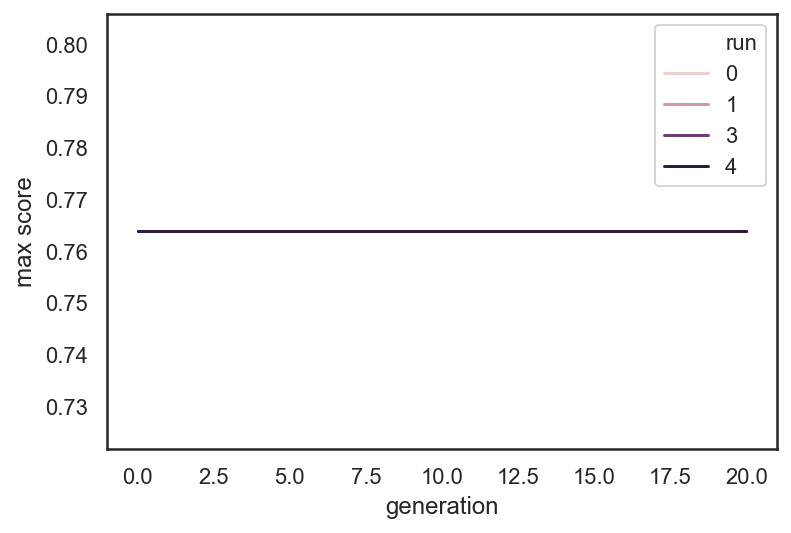

In [761]:
score_by_generation_lineplot(nia_search6)


In [762]:
print("Classification report of GaussianNB")
print('\n')
clf =GaussianNB(**nia_search6.best_params_)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of GaussianNB


              precision    recall  f1-score   support

           0     0.7872    0.7400    0.7629       100
           1     0.5667    0.6296    0.5965        54

    accuracy                         0.7013       154
   macro avg     0.6770    0.6848    0.6797       154
weighted avg     0.7099    0.7013    0.7045       154



In [763]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid_svc={'break_ties': [False], 'cache_size': [200], 'tol': [1e-05], 'degree': [4]}
clf_8 = SVC(random_state=42)

nia_search8 = NatureInspiredSearchCV(
    clf_8,
    param_grid_svc,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search8.fit(X_train, y_train)
print("Bat model")

print("SVC")

ba_svc= nia_search8.best_estimator_
model27=evaluate(ba_svc , X_test,  y_test, 'SVC')
model27.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred3))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Bat model
SVC
confusion matrix
[[87 13]
 [30 24]]
Wall time: 855 ms


<AxesSubplot:xlabel='generation', ylabel='max score'>

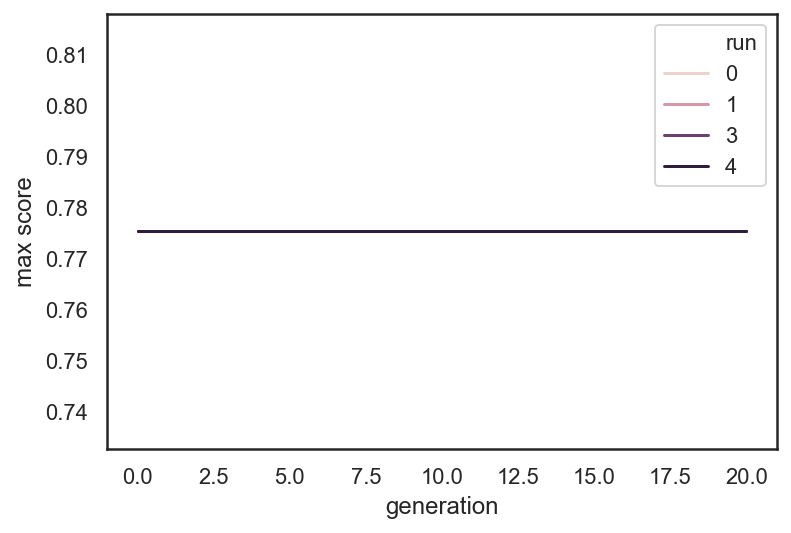

In [764]:
score_by_generation_lineplot(nia_search8)



In [765]:
print("Classification report of SVC")
print('\n')
clf = SVC(**nia_search8.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of SVC


              precision    recall  f1-score   support

           0     0.7436    0.8700    0.8018       100
           1     0.6486    0.4444    0.5275        54

    accuracy                         0.7208       154
   macro avg     0.6961    0.6572    0.6647       154
weighted avg     0.7103    0.7208    0.7056       154



In [766]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={
 'max_depth': [115],
 'max_features': ['sqrt'],
 'min_samples_leaf':[4],
 'min_samples_split': [5],
 }
clf_3 = DecisionTreeClassifier(random_state=42)

nia_search3 = NatureInspiredSearchCV(
    clf_3,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)

print("Bat Model")
print("Decision Tree")
nia_search3.fit(X_train, y_train)


ba_dt= nia_search3.best_estimator_
model28=evaluate(ba_dt,  X_test,  y_test, 'Decision Tree')
model28.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred3))



Bat Model
Decision Tree
Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


confusion matrix
[[82 18]
 [23 31]]
Wall time: 785 ms


<AxesSubplot:xlabel='generation', ylabel='max score'>

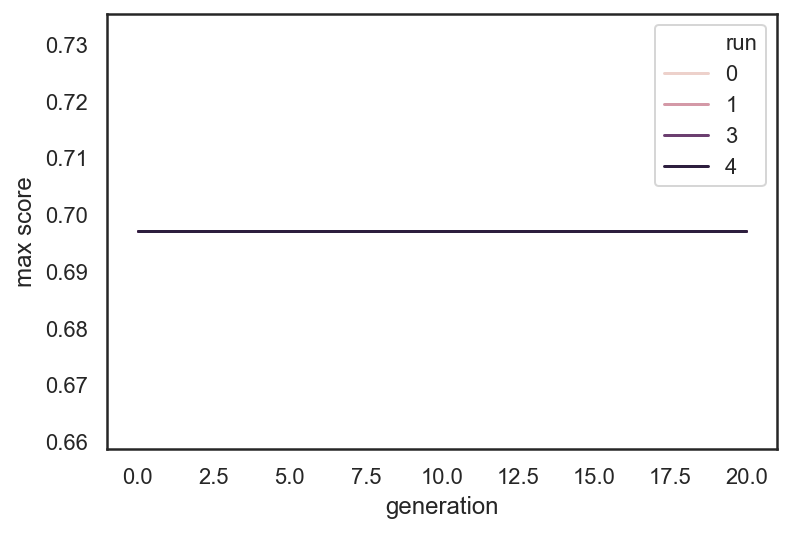

In [767]:
score_by_generation_lineplot(nia_search3)



In [768]:
print("Classification report of Decision Tree")
print('\n')
clf = DecisionTreeClassifier(**nia_search3.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Decision Tree


              precision    recall  f1-score   support

           0     0.7810    0.8200    0.8000       100
           1     0.6327    0.5741    0.6019        54

    accuracy                         0.7338       154
   macro avg     0.7068    0.6970    0.7010       154
weighted avg     0.7290    0.7338    0.7306       154



In [769]:
df_bat= pd.concat([model21,model22,model23,model24,model25,model26,model27,model28],axis = 0).reset_index()
df_bat.drop('index', axis=1, inplace=True)
df_bat

model  accuracy  precision    recall   f1score    rocauc  \
0        Random Forest  0.759740   0.680851  0.592593  0.633663  0.721296   
1           Extra Tree  0.746753   0.692308  0.500000  0.580645  0.690000   
2  Logistic Regression  0.701299   0.583333  0.518519  0.549020  0.659259   
3                  KNN  0.727273   0.636364  0.518519  0.571429  0.679259   
4            LinearSVC  0.707792   0.600000  0.500000  0.545455  0.660000   
5           GaussianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.720779   0.648649  0.444444  0.527473  0.657222   
7        Decision Tree  0.733766   0.632653  0.574074  0.601942  0.697037   

     logloss  timetaken  
0   8.298355   9.570852  
1   8.746895   8.184439  
2  10.316881   0.956905  
3   9.419749   0.881365  
4  10.092593   0.797487  
5  10.316912   0.831271  
6   9.644012   0.847120  
7   9.195482   0.777366

HYBRID BAT ALGORITHM


In [770]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()
param_grid={'bootstrap': [True],  
            'max_depth' : [None], 
            'max_features' : ['auto'],
            'min_samples_leaf' : [2], #intial 1
            'min_samples_split' : [5],
            'n_estimators' : [200]
                      }
rfc = RandomForestClassifier(random_state=42)
nia_search = NatureInspiredSearchCV(
    rfc,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybrid bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search.fit(X_train, y_train)
print("Hybrid Bat model")

print("Random Forest")

hba_random= nia_search.best_estimator_
model31=evaluate(hba_random,  X_test,  y_test, 'Random Forest')
model31.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_random.predict(X_test)
print(confusion_matrix(y_test, y_pred4))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


Hybrid Bat model
Random Forest
confusion matrix
[[86 14]
 [21 33]]
Wall time: 3.8 s


<AxesSubplot:xlabel='generation', ylabel='max score'>

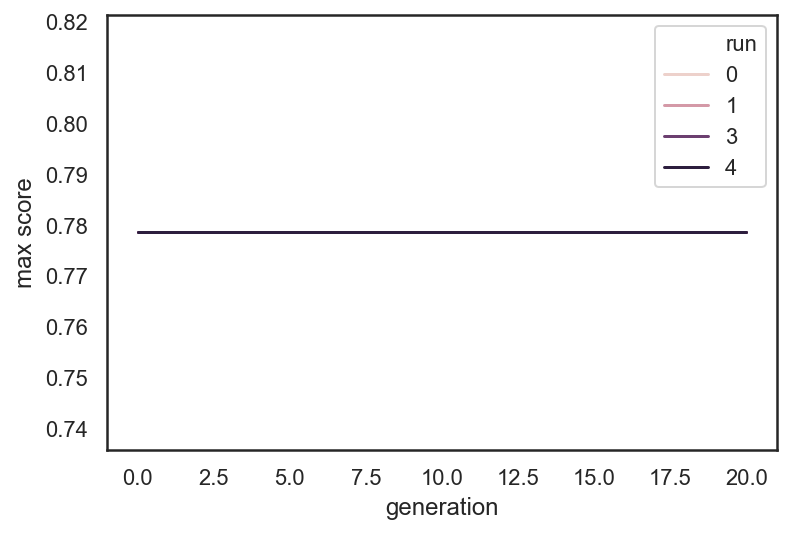

In [771]:
score_by_generation_lineplot(nia_search)



In [772]:
print("Classification report of Random Forest")
print('\n')
clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Random Forest


              precision    recall  f1-score   support

           0     0.8037    0.8600    0.8309       100
           1     0.7021    0.6111    0.6535        54

    accuracy                         0.7727       154
   macro avg     0.7529    0.7356    0.7422       154
weighted avg     0.7681    0.7727    0.7687       154



In [773]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
clf_12 = ExtraTreesClassifier(random_state=42)
param_grid={
    'bootstrap' :[True], 'max_depth' : [10], 'max_features' : ['auto'],
    'min_samples_leaf' : [2], 'min_samples_split' : [5],
    'n_estimators' : [200] #intial 1
}
nia_search12 = NatureInspiredSearchCV(
    clf_12,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybridbat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search12.fit(X_train, y_train)
print("Hybrid Bat model")

print("Extra Tree")

hba_et= nia_search12.best_estimator_
model32=evaluate(hba_et,  X_test,  y_test, 'Extra Tree')
model32.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_et.predict(X_test)
print(confusion_matrix(y_test, y_pred4))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished


Hybrid Bat model
Extra Tree
confusion matrix
[[87 13]
 [26 28]]
Wall time: 3.55 s


<AxesSubplot:xlabel='generation', ylabel='max score'>

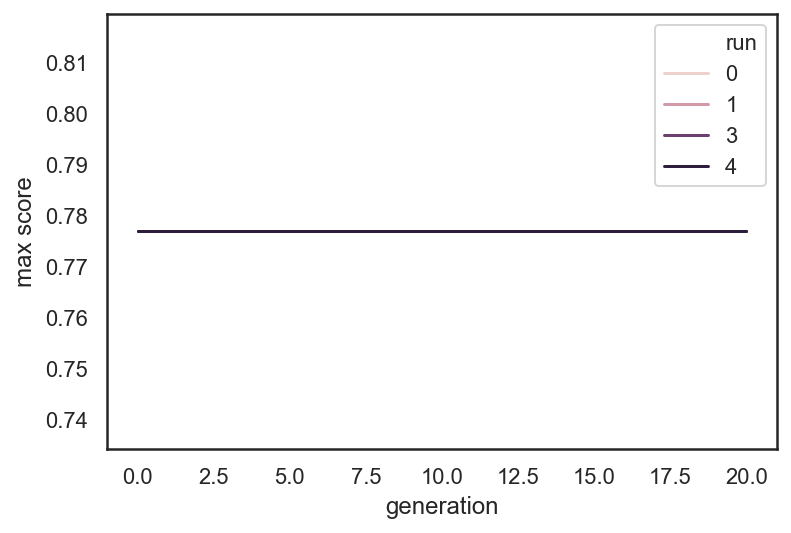

In [774]:
score_by_generation_lineplot(nia_search12)



In [775]:
print("Classification report of Extra Tree")
print('\n')
clf =ExtraTreesClassifier(**nia_search12.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Extra Tree


              precision    recall  f1-score   support

           0     0.7699    0.8700    0.8169       100
           1     0.6829    0.5185    0.5895        54

    accuracy                         0.7468       154
   macro avg     0.7264    0.6943    0.7032       154
weighted avg     0.7394    0.7468    0.7372       154



In [776]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid_lr={'max_iter': [882], 'solver': ['newton-cg'], 'C':[10.0]}
clf_13 = LogisticRegression(random_state=42)

nia_search13 = NatureInspiredSearchCV(
    clf_13,
    param_grid_lr,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=150,
    max_n_gen=200,
    max_stagnating_gen=60,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search13.fit(X_train, y_train)
print("Bat model")

print("Logistic Regression")

hba_lr= nia_search13.best_estimator_
model33=evaluate(hba_lr,  X_test,  y_test, 'Logistic Regression')
model33.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred4))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Bat model
Logistic Regression
confusion matrix
[[80 20]
 [26 28]]
Wall time: 6.4 s


<AxesSubplot:xlabel='generation', ylabel='max score'>

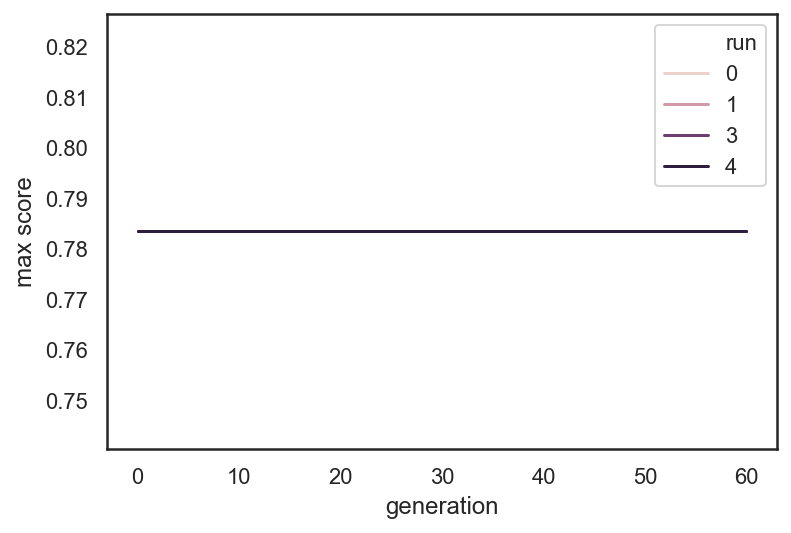

In [777]:
score_by_generation_lineplot(nia_search13)



In [778]:
print("Classification report of Logistic Regression")
print('\n')
clf = LogisticRegression(**nia_search13.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Logistic Regression


              precision    recall  f1-score   support

           0     0.7547    0.8000    0.7767       100
           1     0.5833    0.5185    0.5490        54

    accuracy                         0.7013       154
   macro avg     0.6690    0.6593    0.6629       154
weighted avg     0.6946    0.7013    0.6969       154



In [779]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={ 
    'algorithm' :['kd_tree'], 'leaf_size' : [133],'p' :[2]
}
clf_14 = KNeighborsClassifier(n_neighbors=42)

nia_search14 = NatureInspiredSearchCV(
    clf_14,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybridbat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search14.fit(X_train, y_train)
print("Hybrid Bat model")

print("KNN")

hba_kn= nia_search14.best_estimator_
model34=evaluate(hba_kn , X_test,  y_test, 'KNN')
model34.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_kn.predict(X_test)
print(confusion_matrix(y_test, y_pred4))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Hybrid Bat model
KNN
confusion matrix
[[84 16]
 [26 28]]
Wall time: 1.63 s


<AxesSubplot:xlabel='generation', ylabel='max score'>

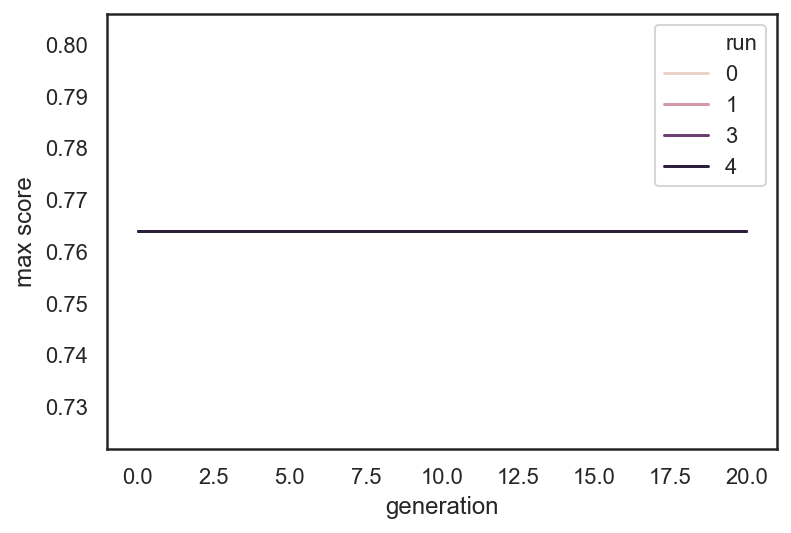

In [780]:
score_by_generation_lineplot(nia_search14)



In [781]:
print("Classification report of KNN")
print('\n')
clf = KNeighborsClassifier(**nia_search14.best_params_, n_neighbors=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of KNN


              precision    recall  f1-score   support

           0     0.7636    0.8400    0.8000       100
           1     0.6364    0.5185    0.5714        54

    accuracy                         0.7273       154
   macro avg     0.7000    0.6793    0.6857       154
weighted avg     0.7190    0.7273    0.7199       154



In [782]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={
    'intercept_scaling':[50],
    'max_iter' :[1700],
    'dual' : [False],
    'tol' : [1e-05]

}
clf_15 = LinearSVC(random_state=42)

nia_search15 = NatureInspiredSearchCV(
    clf_15,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search15.fit(X_train, y_train)
print("Hybrid Bat model")

print("LinearSVC")

hba_lsvc= nia_search15.best_estimator_
model35=evaluate(hba_lsvc , X_test,  y_test, 'LinearSVC')
model35.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_lsvc.predict(X_test)
print(confusion_matrix(y_test, y_pred4))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Hybrid Bat model
LinearSVC
confusion matrix
[[82 18]
 [27 27]]
Wall time: 1.48 s


<AxesSubplot:xlabel='generation', ylabel='max score'>

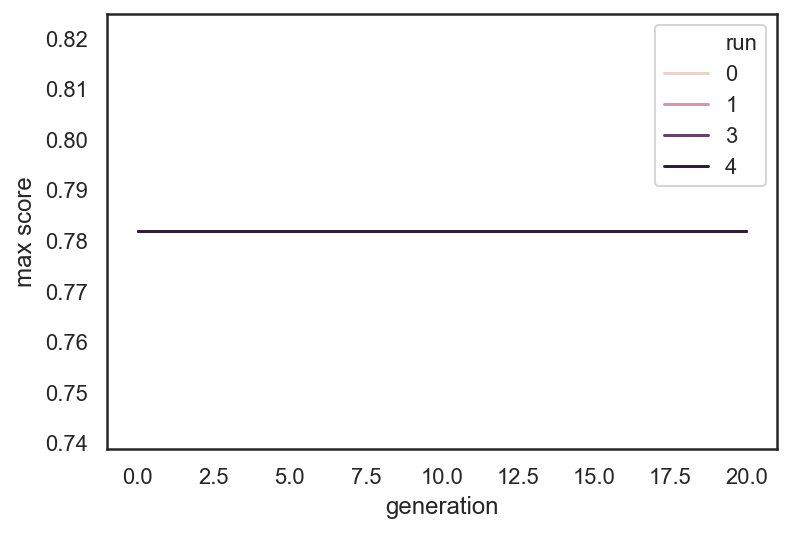

In [783]:
score_by_generation_lineplot(nia_search15)



In [784]:
print("Classification report of LinearSVC")
print('\n')

clf = LinearSVC(**nia_search15.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of LinearSVC


              precision    recall  f1-score   support

           0     0.7523    0.8200    0.7847       100
           1     0.6000    0.5000    0.5455        54

    accuracy                         0.7078       154
   macro avg     0.6761    0.6600    0.6651       154
weighted avg     0.6989    0.7078    0.7008       154



In [785]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={
   'priors' : [None], 'var_smoothing' : [1e-20] 
}
clf_16 = GaussianNB()

nia_search16 = NatureInspiredSearchCV(
    clf_16,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybridbat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search16.fit(X_train, y_train)
print("Hybrid Bat model")

print("GaussianNB")

hba_gnb= nia_search16.best_estimator_
model36=evaluate(hba_gnb , X_test,  y_test, 'GaussianNB')
model36.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred4))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Hybrid Bat model
GaussianNB
confusion matrix
[[74 26]
 [20 34]]
Wall time: 1.4 s


<AxesSubplot:xlabel='generation', ylabel='max score'>

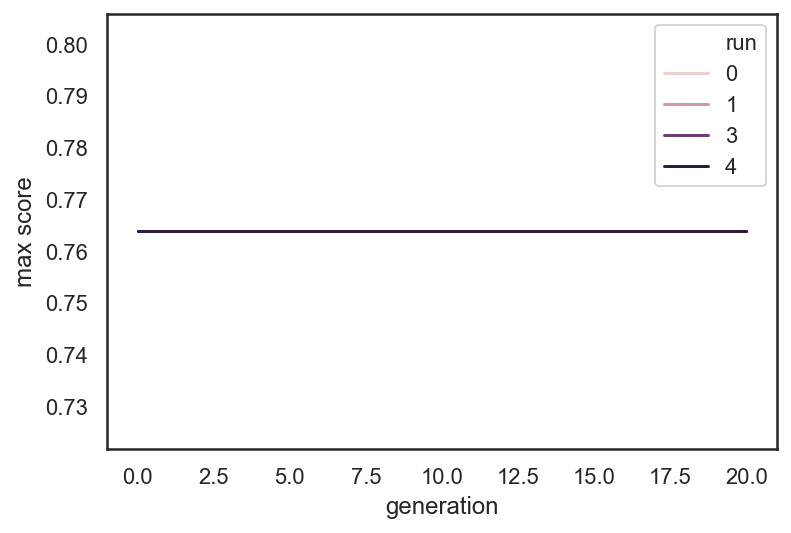

In [786]:
score_by_generation_lineplot(nia_search16)



In [787]:
print("Classification report of GaussianNB")
print('\n')

clf = GaussianNB(**nia_search16.best_params_)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of GaussianNB


              precision    recall  f1-score   support

           0     0.7872    0.7400    0.7629       100
           1     0.5667    0.6296    0.5965        54

    accuracy                         0.7013       154
   macro avg     0.6770    0.6848    0.6797       154
weighted avg     0.7099    0.7013    0.7045       154



In [788]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={
    'tol': [0.001],
    'cache_size': [1600],
    'break_ties': [False],
    'degree': [8]
    
}
clf_18 = SVC(random_state=42)

nia_search18 = NatureInspiredSearchCV(
    clf_18,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybridbat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search18.fit(X_train, y_train)
print("Hybrid Bat model")

print("SVC")

hba_svc= nia_search18.best_estimator_
model37=evaluate(hba_svc , X_test,  y_test, 'SVC')
model37.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred4))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Hybrid Bat model
SVC
confusion matrix
[[87 13]
 [30 24]]
Wall time: 1.58 s


<AxesSubplot:xlabel='generation', ylabel='max score'>

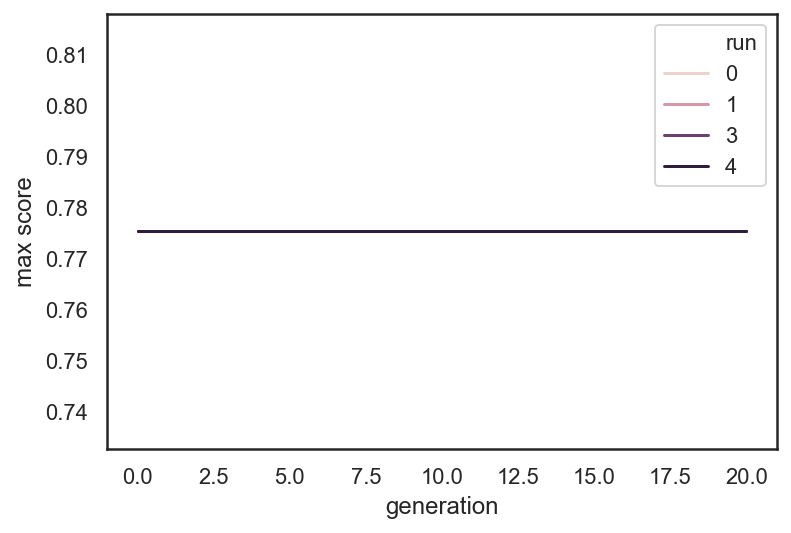

In [789]:
score_by_generation_lineplot(nia_search18)



In [790]:
print("Classification report of SVC")
print('\n')

clf = SVC(**nia_search18.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of SVC


              precision    recall  f1-score   support

           0     0.7436    0.8700    0.8018       100
           1     0.6486    0.4444    0.5275        54

    accuracy                         0.7208       154
   macro avg     0.6961    0.6572    0.6647       154
weighted avg     0.7103    0.7208    0.7056       154



In [791]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={
    'max_features': ['sqrt'],
    'max_depth': [187],
    'min_samples_split': [15],
    'min_samples_leaf': [2]
    
}
clf_40 = DecisionTreeClassifier(random_state=42)

nia_search40 = NatureInspiredSearchCV(
    clf_40,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybridbat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search40.fit(X_train, y_train)
print("Hybrid Bat model")

print("Decision Tree")

hba_dt= nia_search40.best_estimator_
model38=evaluate(hba_dt,  X_test,  y_test, 'Decision Tree')
model38.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred4))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Hybrid Bat model
Decision Tree
confusion matrix
[[89 11]
 [27 27]]
Wall time: 1.52 s


<AxesSubplot:xlabel='generation', ylabel='max score'>

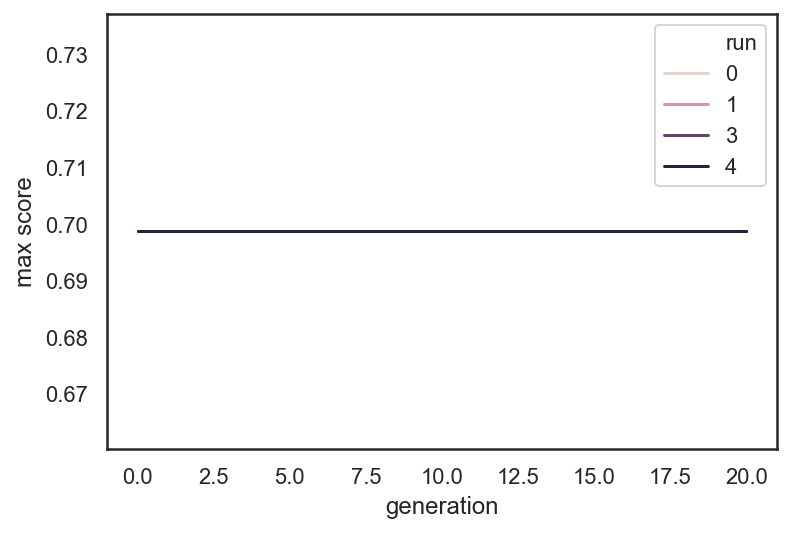

In [792]:
 score_by_generation_lineplot(nia_search40)



In [793]:
print("Classification report of Decision Tree")
print('\n')
clf = DecisionTreeClassifier(**nia_search40.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Decision Tree


              precision    recall  f1-score   support

           0     0.7672    0.8900    0.8241       100
           1     0.7105    0.5000    0.5870        54

    accuracy                         0.7532       154
   macro avg     0.7389    0.6950    0.7055       154
weighted avg     0.7474    0.7532    0.7409       154



In [794]:
df_hba= pd.concat([model31,model32,model33,model34,model35,model36,model37,model38],axis = 0).reset_index()
df_hba.drop('index', axis=1, inplace=True)
df_hba

model  accuracy  precision    recall   f1score    rocauc  \
0        Random Forest  0.772727   0.702128  0.611111  0.653465  0.735556   
1           Extra Tree  0.746753   0.682927  0.518519  0.589474  0.694259   
2  Logistic Regression  0.701299   0.583333  0.518519  0.549020  0.659259   
3                  KNN  0.727273   0.636364  0.518519  0.571429  0.679259   
4            LinearSVC  0.707792   0.600000  0.500000  0.545455  0.660000   
5           GaussianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.720779   0.648649  0.444444  0.527473  0.657222   
7        Decision Tree  0.753247   0.710526  0.500000  0.586957  0.695000   

     logloss  timetaken  
0   7.849795   3.742924  
1   8.746900   3.482733  
2  10.316881   6.399849  
3   9.419749   1.607271  
4  10.092593   1.474313  
5  10.316912   1.401385  
6   9.644012   1.565065  
7   8.522612   1.520355

#### GREY WOLF OPTIMIZER

In [795]:
%%time

from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()
param_grid_rt={'n_estimators': [400,100],
 'max_features': ['sqrt'],
 'max_depth': [40,None],
 'min_samples_split': [2,5], #intial 2
 'min_samples_leaf': [2,5],
 'bootstrap': [True]}

clf_21 = RandomForestClassifier(random_state=42)
nia_search21 = NatureInspiredSearchCV(
    clf_21,
    param_grid_rt,
    cv=3,
    verbose=2,
    algorithm='gwo', #  Greywolf algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search21.fit(X_train, y_train)
print("Greywolf model")

print("Random Forest")

gwa_random= nia_search21.best_estimator_
model41=evaluate(gwa_random,  X_test,  y_test, 'Random Forest')
model41.timetaken[0] = time.time() - time1
print(model41)
print("confusion matrix")
y_pred5=gwa_random.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 16 candidates, which might total in 48 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished


Greywolf model
Random Forest
           model  accuracy  precision    recall   f1score    rocauc   logloss  \
0  Random Forest  0.753247   0.666667  0.592593  0.627451  0.716296  8.522638   

   timetaken  
0  25.054046  
confusion matrix
[[84 16]
 [22 32]]
Wall time: 25.1 s


In [796]:
nia_search21.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'bootstrap': True}

<AxesSubplot:xlabel='generation', ylabel='max score'>

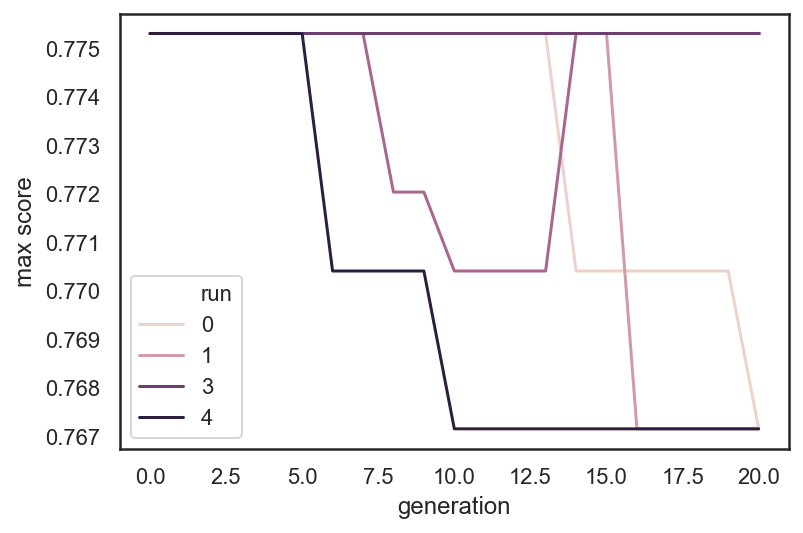

In [797]:
score_by_generation_lineplot(nia_search21)

In [798]:
print("Classification report of Random Forest")
print('\n')
clf = RandomForestClassifier(**nia_search21.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Random Forest


              precision    recall  f1-score   support

           0     0.7925    0.8400    0.8155       100
           1     0.6667    0.5926    0.6275        54

    accuracy                         0.7532       154
   macro avg     0.7296    0.7163    0.7215       154
weighted avg     0.7483    0.7532    0.7496       154



In [799]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.ensemble import ExtraTreesClassifier
param_grid_et={'n_estimators': [1000,100],
 'max_features': ['sqrt'],
 'max_depth': [10,None],
 'min_samples_split': [5,2], #intial is 2
 'min_samples_leaf': [2,1], #intial 1
 'bootstrap': [True]}

clf_22 = ExtraTreesClassifier(random_state=42)

nia_search22 = NatureInspiredSearchCV(
    clf_22,
    param_grid_et,
    cv=3,
    verbose=2,
    algorithm='gwo', #  Greywolf algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search22.fit(X_train, y_train)
print("Greywolf model")

print("Extra Tree")

gwa_et= nia_search22.best_estimator_
model42=evaluate(gwa_et,  X_test,  y_test, 'Extra Tree')
model42.timetaken[0] = time.time() - time1
print(model42)
print("confusion matrix")
y_pred5=gwa_et.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 16 candidates, which might total in 48 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s finished


Greywolf model
Extra Tree
        model  accuracy  precision    recall   f1score    rocauc   logloss  \
0  Extra Tree  0.753247        0.7  0.518519  0.595745  0.699259  8.522618   

   timetaken  
0  48.319504  
confusion matrix
[[88 12]
 [26 28]]
Wall time: 48.4 s


In [800]:
nia_search22.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'bootstrap': True}

<AxesSubplot:xlabel='generation', ylabel='max score'>

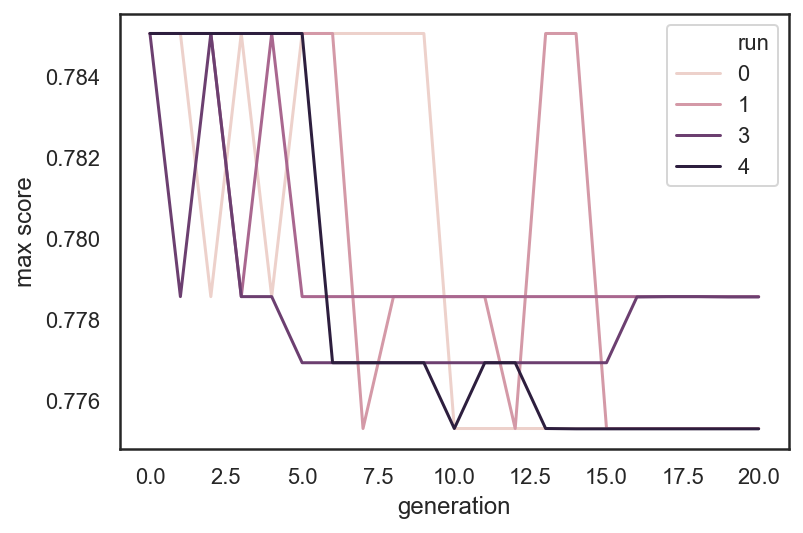

In [801]:
score_by_generation_lineplot(nia_search22)

In [802]:
print("Classification report of Extra Tree")
print('\n')
clf = ExtraTreesClassifier(**nia_search22.best_params_,random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Extra Tree


              precision    recall  f1-score   support

           0     0.7719    0.8800    0.8224       100
           1     0.7000    0.5185    0.5957        54

    accuracy                         0.7532       154
   macro avg     0.7360    0.6993    0.7091       154
weighted avg     0.7467    0.7532    0.7429       154



In [803]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.linear_model import LogisticRegression
param_grid_lr={'max_iter': [1200,100], 'solver': ['newton-cg','sag'] ,'C': [4.0,1.0]
              }

clf_23 = LogisticRegression(random_state=42)

nia_search23 = NatureInspiredSearchCV(
    clf_23,
    param_grid_lr,
    cv=3,
    verbose=2,
    algorithm='gwo', #  Greywolf  algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search23.fit(X_train, y_train)
print("Greywolf model")

print("Logistic Regression")

gwa_lr= nia_search23.best_estimator_
model43=evaluate(gwa_lr,  X_test,  y_test, 'Logistic Regression')
model43.timetaken[0] = time.time() - time1
print(model43)
print("confusion matrix")
y_pred5=gwa_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 8 candidates, which might total in 24 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Greywolf model
Logistic Regression
                 model  accuracy  precision    recall  f1score    rocauc  \
0  Logistic Regression  0.701299   0.583333  0.518519  0.54902  0.659259   

     logloss  timetaken  
0  10.316881   2.363941  
confusion matrix
[[80 20]
 [26 28]]
Wall time: 2.38 s


In [804]:
nia_search23.best_params_

{'max_iter': 100, 'solver': 'newton-cg', 'C': 4.0}

<AxesSubplot:xlabel='generation', ylabel='max score'>

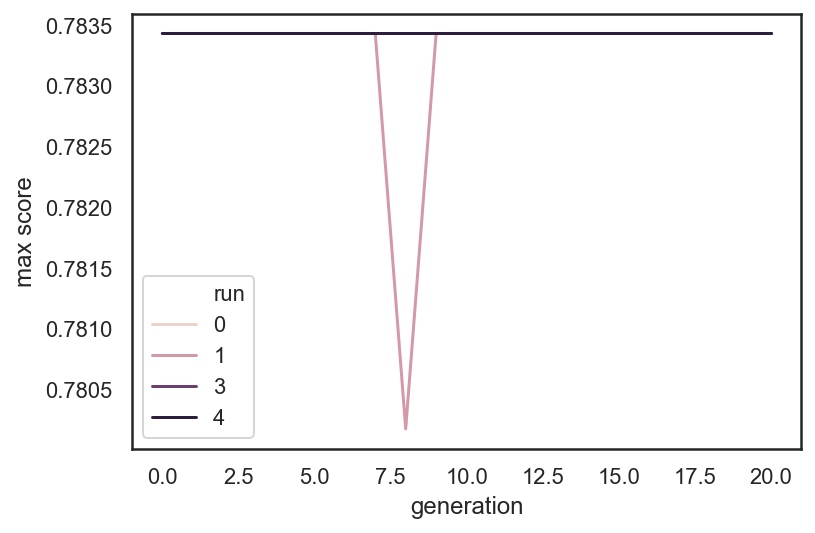

In [805]:
score_by_generation_lineplot(nia_search23)

In [806]:
print("Classification report of Logistic Regression")
print('\n')
clf = LogisticRegression(**nia_search23.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Logistic Regression


              precision    recall  f1-score   support

           0     0.7547    0.8000    0.7767       100
           1     0.5833    0.5185    0.5490        54

    accuracy                         0.7013       154
   macro avg     0.6690    0.6593    0.6629       154
weighted avg     0.6946    0.7013    0.6969       154



In [807]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.neighbors import KNeighborsClassifier
param_grid_kn={'algorithm': ['kd_tree','auto'],'leaf_size': [133,40,30], 'p': [2,1,3]}

clf_24 = KNeighborsClassifier(n_neighbors=42)

nia_search24 = NatureInspiredSearchCV(
    clf_24,
    param_grid_kn,
    cv=3,
    verbose=2,
    algorithm='gwo', #  Greywolf  algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search24.fit(X_train, y_train)
print("Greywolf  model")

print("KNN")

gwa_kn= nia_search24.best_estimator_
model44=evaluate(gwa_kn , X_test,  y_test, 'KNN')
model44.timetaken[0] = time.time() - time1
print(model44)
print("confusion matrix")
y_pred5=gwa_kn.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 18 candidates, which might total in 54 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Greywolf  model
KNN
  model  accuracy  precision  recall  f1score  rocauc  logloss  timetaken
0   KNN  0.714286   0.613636     0.5  0.55102   0.665  9.86831   4.081748
confusion matrix
[[83 17]
 [27 27]]
Wall time: 4.11 s


In [808]:
nia_search24.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 30, 'p': 1}

<AxesSubplot:xlabel='generation', ylabel='max score'>

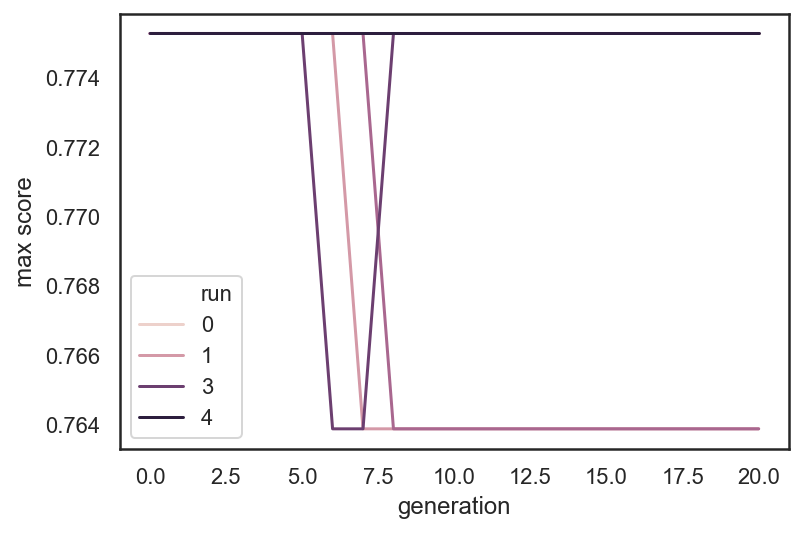

In [809]:
score_by_generation_lineplot(nia_search24)

In [810]:
print("Classification report of KNN")
print('\n')
clf = KNeighborsClassifier(**nia_search24.best_params_, n_neighbors=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of KNN


              precision    recall  f1-score   support

           0     0.7545    0.8300    0.7905       100
           1     0.6136    0.5000    0.5510        54

    accuracy                         0.7143       154
   macro avg     0.6841    0.6650    0.6707       154
weighted avg     0.7051    0.7143    0.7065       154



In [811]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.svm import LinearSVC
param_grid_lsvc={'tol': [1e-05,0.0001], 'intercept_scaling': [50,1], 'dual': [False], 'max_iter': [1700,100]}

clf_25 = LinearSVC(random_state=42)

nia_search25 = NatureInspiredSearchCV(
    clf_25,
    param_grid_lsvc,
    cv=3,
    verbose=2,
    algorithm='gwo', #  Greywolf  algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search25.fit(X_train, y_train)
print("Greywolf  model")

print("LinearSVC")

gwa_lsvc= nia_search25.best_estimator_
model45=evaluate(gwa_lsvc , X_test,  y_test, 'LinearSVC')
model45.timetaken[0] = time.time() - time1
print(model45)
print("confusion matrix")
y_pred5=gwa_lsvc.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 8 candidates, which might total in 24 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Greywolf  model
LinearSVC
       model  accuracy  precision  recall   f1score  rocauc    logloss  \
0  LinearSVC  0.707792        0.6     0.5  0.545455    0.66  10.092593   

   timetaken  
0   1.242658  
confusion matrix
[[82 18]
 [27 27]]
Wall time: 1.26 s


In [812]:
nia_search25.best_params_

{'tol': 1e-05, 'intercept_scaling': 50, 'dual': False, 'max_iter': 100}

<AxesSubplot:xlabel='generation', ylabel='max score'>

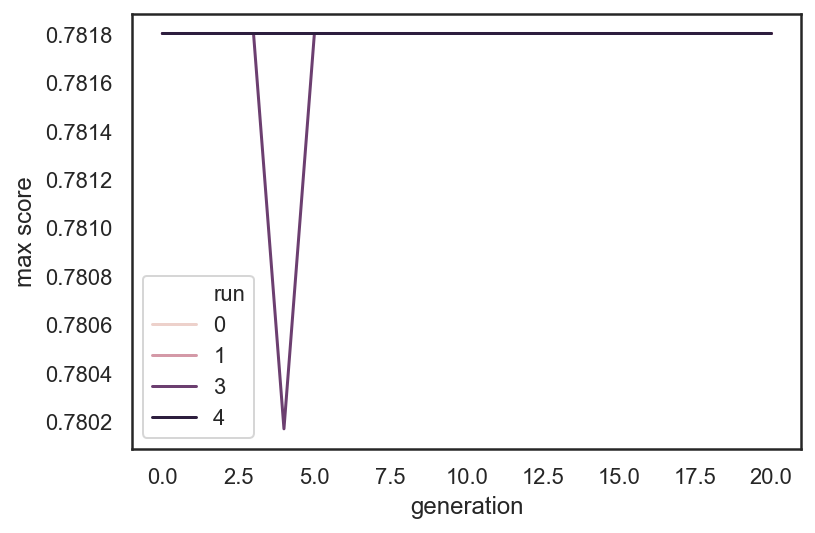

In [813]:
score_by_generation_lineplot(nia_search25)

In [814]:
print("Classification report of LinearSVC")
print('\n')
clf = LinearSVC(**nia_search25.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of LinearSVC


              precision    recall  f1-score   support

           0     0.7523    0.8200    0.7847       100
           1     0.6000    0.5000    0.5455        54

    accuracy                         0.7078       154
   macro avg     0.6761    0.6600    0.6651       154
weighted avg     0.6989    0.7078    0.7008       154



In [815]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
var_smoothing=[0.0000000001,0.000001,0.01,0.001,0.00000000000001,1,1e-15,1e-20]
param_grid_gnb = {             
               'var_smoothing' : var_smoothing
               }
print(param_grid_gnb)
clf_26 = GaussianNB()

nia_search26 = NatureInspiredSearchCV(
    clf_26,
    param_grid_gnb,
    cv=3,
    verbose=2,
    algorithm='gwo', #  Greywolf  algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search26.fit(X_train, y_train)
print("Greywolf  model")

print("GaussianNB")

gwa_gnb= nia_search26.best_estimator_
model46=evaluate(gwa_gnb , X_test,  y_test, 'GaussianNB')
model46.timetaken[0] = time.time() - time1
print(model46)
print("confusion matrix")
y_pred5=gwa_gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

{'var_smoothing': [1e-10, 1e-06, 0.01, 0.001, 1e-14, 1, 1e-15, 1e-20]}
Fitting 3 folds for some of the 8 candidates, which might total in 24 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Greywolf  model
GaussianNB
        model  accuracy  precision   recall   f1score    rocauc    logloss  \
0  GaussianNB  0.701299   0.566667  0.62963  0.596491  0.684815  10.316912   

   timetaken  
0    0.93075  
confusion matrix
[[74 26]
 [20 34]]
Wall time: 946 ms


In [816]:
nia_search6.best_params_

{'priors': None, 'var_smoothing': 1e-20}

<AxesSubplot:xlabel='generation', ylabel='max score'>

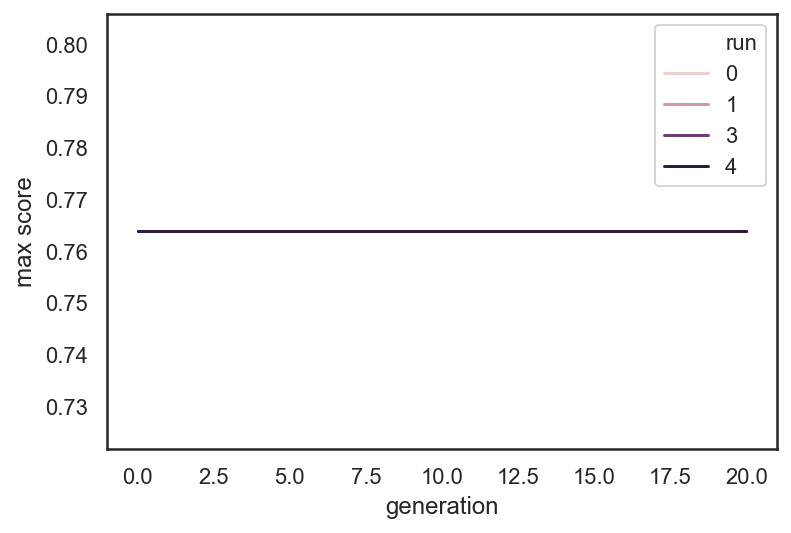

In [817]:
score_by_generation_lineplot(nia_search26)

In [818]:
print("Classification report of GaussianNB")
print('\n')
clf = GaussianNB(**nia_search26.best_params_)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of GaussianNB


              precision    recall  f1-score   support

           0     0.7872    0.7400    0.7629       100
           1     0.5667    0.6296    0.5965        54

    accuracy                         0.7013       154
   macro avg     0.6770    0.6848    0.6797       154
weighted avg     0.7099    0.7013    0.7045       154



In [819]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.svm import SVC
param_grid_svc = {'C' : [6,10],
               'degree': [5,9],              
               'tol': [0.01,0.1],
               'cache_size': [200,1000],
               'break_ties': [False]
               }
print(param_grid_svc)

nia_search27 = NatureInspiredSearchCV(
    clf_27,
    param_grid_svc,
    cv=3,
    verbose=2,
    algorithm='gwo', #  Greywolf  algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search27.fit(X_train, y_train)
print("Greywolf model")

print("SVC")

gwa_svc= nia_search27.best_estimator_
model47=evaluate(gwa_svc , X_test,  y_test, 'SVC')
model47.timetaken[0] = time.time() - time1
print(model47)
print("confusion matrix")
y_pred5=gwa_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

{'C': [6, 10], 'degree': [5, 9], 'tol': [0.01, 0.1], 'cache_size': [200, 1000], 'break_ties': [False]}
Fitting 3 folds for some of the 16 candidates, which might total in 48 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Greywolf model
SVC
  model  accuracy  precision    recall   f1score    rocauc   logloss  \
0   SVC  0.727273   0.657895  0.462963  0.543478  0.666481  9.419734   

   timetaken  
0   1.807617  
confusion matrix
[[87 13]
 [29 25]]
Wall time: 1.82 s


In [820]:
nia_search27.best_params_

{'C': 6, 'degree': 9, 'tol': 0.1, 'cache_size': 1000, 'break_ties': False}

<AxesSubplot:xlabel='generation', ylabel='max score'>

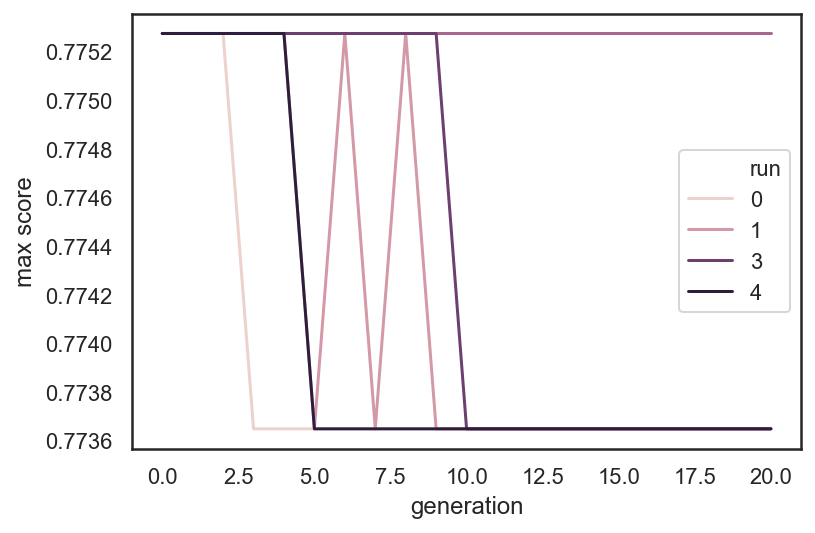

In [821]:
score_by_generation_lineplot(nia_search27)

In [822]:
print("Classification report of SVC")
print('\n')
clf = SVC(**nia_search27.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of SVC


              precision    recall  f1-score   support

           0     0.7500    0.8700    0.8056       100
           1     0.6579    0.4630    0.5435        54

    accuracy                         0.7273       154
   macro avg     0.7039    0.6665    0.6745       154
weighted avg     0.7177    0.7273    0.7137       154



In [823]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.tree import DecisionTreeClassifier
param_grid_dt={'max_features': ['sqrt'],
 'max_depth': [210],
 'min_samples_split': [10,20],
 'min_samples_leaf': [2,5]}

clf_28 = DecisionTreeClassifier(random_state=42)

nia_search28 = NatureInspiredSearchCV(
    clf_28,
    param_grid_dt,
    cv=3,
    verbose=2,
    algorithm='gwo', #   algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search28.fit(X_train, y_train)
print("Greywolf  model")

print("Decision Tree")

gwa_dt= nia_search28.best_estimator_
model48=evaluate(gwa_dt,  X_test,  y_test, 'Decision Tree')
model48.timetaken[0] = time.time() - time1
print(model48)
print("confusion matrix")
y_pred5=gwa_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 4 candidates, which might total in 12 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Greywolf  model
Decision Tree
           model  accuracy  precision    recall   f1score    rocauc  logloss  \
0  Decision Tree   0.75974   0.688889  0.574074  0.626263  0.717037  8.29835   

   timetaken  
0   1.038526  
confusion matrix
[[86 14]
 [23 31]]
Wall time: 1.05 s


In [824]:
nia_search28.best_params_

{'max_features': 'sqrt',
 'max_depth': 210,
 'min_samples_split': 20,
 'min_samples_leaf': 2}

<AxesSubplot:xlabel='generation', ylabel='max score'>

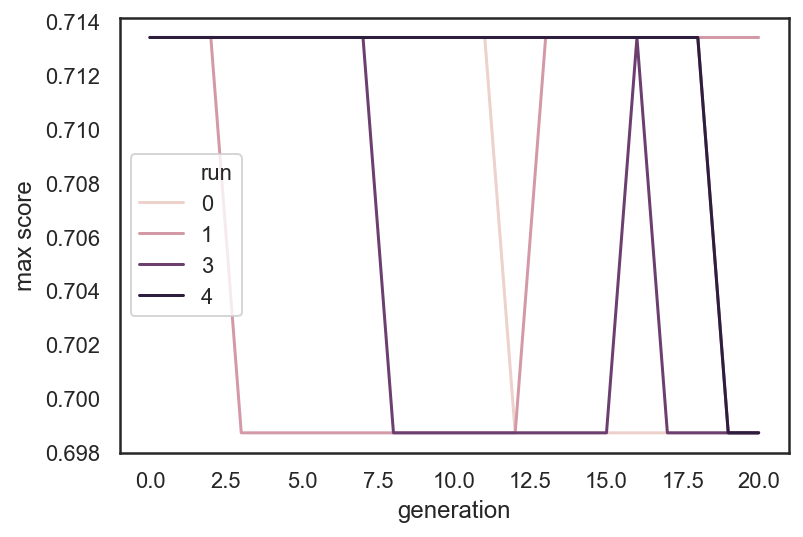

In [825]:
score_by_generation_lineplot(nia_search28)

In [826]:
print("Classification report of Decision Tree")
print('\n')
clf = DecisionTreeClassifier(**nia_search28.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Decision Tree


              precision    recall  f1-score   support

           0     0.7890    0.8600    0.8230       100
           1     0.6889    0.5741    0.6263        54

    accuracy                         0.7597       154
   macro avg     0.7389    0.7170    0.7246       154
weighted avg     0.7539    0.7597    0.7540       154



In [827]:
df_gwa= pd.concat([model41,model42,model43,model44,model45,model46,model47,model48],axis = 0).reset_index()
df_gwa.drop('index', axis=1, inplace=True)
df_gwa

model  accuracy  precision    recall   f1score    rocauc  \
0        Random Forest  0.753247   0.666667  0.592593  0.627451  0.716296   
1           Extra Tree  0.753247   0.700000  0.518519  0.595745  0.699259   
2  Logistic Regression  0.701299   0.583333  0.518519  0.549020  0.659259   
3                  KNN  0.714286   0.613636  0.500000  0.551020  0.665000   
4            LinearSVC  0.707792   0.600000  0.500000  0.545455  0.660000   
5           GaussianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.727273   0.657895  0.462963  0.543478  0.666481   
7        Decision Tree  0.759740   0.688889  0.574074  0.626263  0.717037   

     logloss  timetaken  
0   8.522638  25.054046  
1   8.522618  48.319504  
2  10.316881   2.363941  
3   9.868310   4.081748  
4  10.092593   1.242658  
5  10.316912   0.930750  
6   9.419734   1.807617  
7   8.298350   1.038526

#### FIREFLY ALGORITHM

In [828]:
%%time

from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()
param_grid_rt={'n_estimators': [800],
 'max_features': ['sqrt'],
 'max_depth': [60],
 'min_samples_split': [2,10,5],
 'min_samples_leaf': [1,5,10],
 'bootstrap': [True]}

clf_31 = RandomForestClassifier(random_state=42)
nia_search31 = NatureInspiredSearchCV(
    clf_31,
    param_grid_rt,
    cv=3,
    verbose=2,
    algorithm='fa', #  Firefly algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search31.fit(X_train, y_train)
print("Firefly model")

print("Random Forest")

fa_random= nia_search31.best_estimator_
model51=evaluate(fa_random,  X_test,  y_test, 'Random Forest')
model51.timetaken[0] = time.time() - time1
print(model51)
print("confusion matrix")
y_pred5=fa_random.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 9 candidates, which might total in 27 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.6s finished


Firefly model
Random Forest
           model  accuracy  precision    recall   f1score    rocauc   logloss  \
0  Random Forest  0.772727    0.72093  0.574074  0.639175  0.727037  7.849784   

   timetaken  
0  57.577813  
confusion matrix
[[88 12]
 [23 31]]
Wall time: 57.8 s


In [829]:
nia_search31.best_params_

{'n_estimators': 800,
 'max_features': 'sqrt',
 'max_depth': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'bootstrap': True}

<AxesSubplot:xlabel='generation', ylabel='max score'>

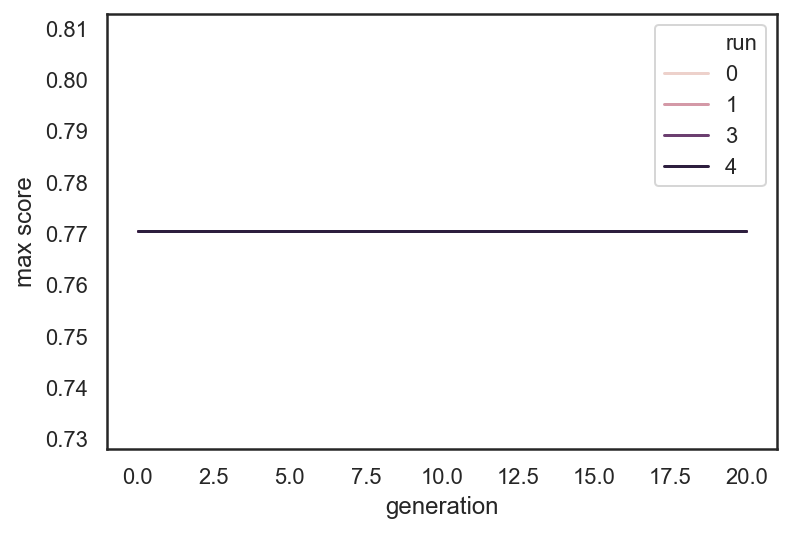

In [830]:
score_by_generation_lineplot(nia_search31)

In [831]:
print("Classification report of Random Forest")
print('\n')
clf = RandomForestClassifier(**nia_search31.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Random Forest


              precision    recall  f1-score   support

           0     0.7928    0.8800    0.8341       100
           1     0.7209    0.5741    0.6392        54

    accuracy                         0.7727       154
   macro avg     0.7569    0.7270    0.7366       154
weighted avg     0.7676    0.7727    0.7658       154



In [832]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.ensemble import ExtraTreesClassifier
param_grid_et={'n_estimators': [200],
 'max_features': ['auto'],
 'max_depth': [70],
 'min_samples_split': [2,10,5],
 'min_samples_leaf': [1,2,10],
 'bootstrap': [True]}

clf_32 = ExtraTreesClassifier(random_state=42)

nia_search32 = NatureInspiredSearchCV(
    clf_32,
    param_grid_et,
    cv=3,
    verbose=2,
    algorithm='fa', #  firefly algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search32.fit(X_train, y_train)
print("Firefly model")

print("Extra Tree")

fa_et= nia_search32.best_estimator_
model52=evaluate(fa_et,  X_test,  y_test, 'Extra Tree')
model52.timetaken[0] = time.time() - time1
print(model52)
print("confusion matrix")
y_pred5=fa_et.predict(X_test)
print(confusion_matrix(y_test, y_pred5))


Fitting 3 folds for some of the 9 candidates, which might total in 27 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished


Firefly model
Extra Tree
        model  accuracy  precision    recall   f1score    rocauc   logloss  \
0  Extra Tree  0.753247   0.690476  0.537037  0.604167  0.703519  8.522623   

   timetaken  
0  23.430817  
confusion matrix
[[87 13]
 [25 29]]
Wall time: 23.5 s


In [833]:
nia_search32.best_params_

{'n_estimators': 200,
 'max_features': 'auto',
 'max_depth': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'bootstrap': True}

<AxesSubplot:xlabel='generation', ylabel='max score'>

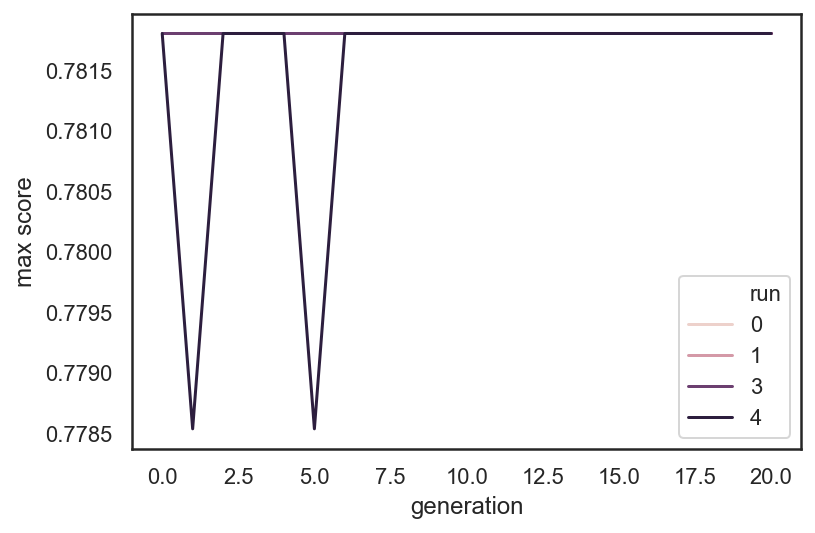

In [834]:
score_by_generation_lineplot(nia_search32)

In [835]:
print("Classification report of Extra Tree")
print('\n')
clf =ExtraTreesClassifier(**nia_search32.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Extra Tree


              precision    recall  f1-score   support

           0     0.7768    0.8700    0.8208       100
           1     0.6905    0.5370    0.6042        54

    accuracy                         0.7532       154
   macro avg     0.7336    0.7035    0.7125       154
weighted avg     0.7465    0.7532    0.7448       154



In [836]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.linear_model import LogisticRegression
param_grid_lr={'max_iter': [1200,100], 'solver': ['newton-cg'], 'C': [4.0,1.0]}
clf_33 = LogisticRegression(random_state=42)

nia_search33 = NatureInspiredSearchCV(
    clf_33,
    param_grid_lr,
    cv=3,
    verbose=2,
    algorithm='fa', #  Firefly algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search33.fit(X_train, y_train)
print("Firefly model")

print("Logistic Regression")

fa_lr= nia_search33.best_estimator_
model53=evaluate(fa_lr,  X_test,  y_test, 'Logistic Regression')
model53.timetaken[0] = time.time() - time1
print(model53)
print("confusion matrix")
y_pred5=fa_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred5))


Fitting 3 folds for some of the 4 candidates, which might total in 12 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Firefly model
Logistic Regression
                 model  accuracy  precision    recall  f1score    rocauc  \
0  Logistic Regression  0.701299   0.583333  0.518519  0.54902  0.659259   

     logloss  timetaken  
0  10.316881  10.450008  
confusion matrix
[[80 20]
 [26 28]]
Wall time: 10.5 s


In [837]:
nia_search33.best_params_

{'max_iter': 100, 'solver': 'newton-cg', 'C': 4.0}

<AxesSubplot:xlabel='generation', ylabel='max score'>

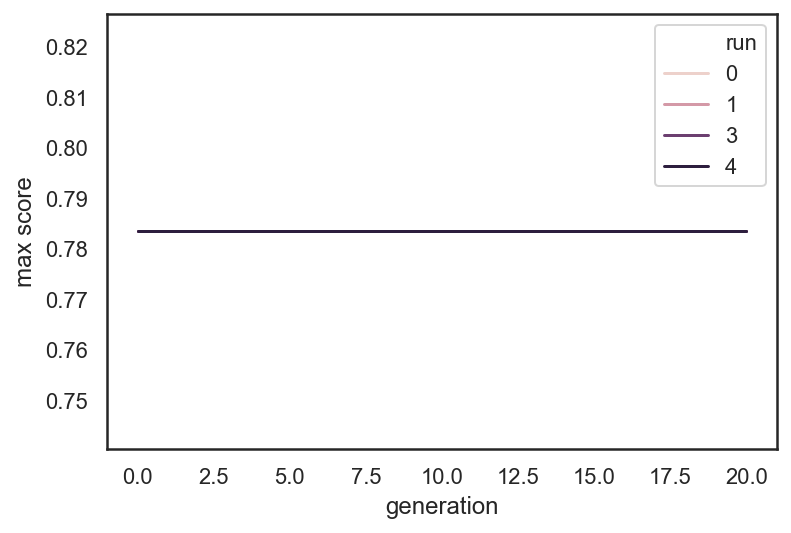

In [838]:
score_by_generation_lineplot(nia_search33)

In [839]:
print("Classification report of Logistic Regression")
print('\n')
clf = LogisticRegression(**nia_search33.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Logistic Regression


              precision    recall  f1-score   support

           0     0.7547    0.8000    0.7767       100
           1     0.5833    0.5185    0.5490        54

    accuracy                         0.7013       154
   macro avg     0.6690    0.6593    0.6629       154
weighted avg     0.6946    0.7013    0.6969       154



In [840]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.neighbors import KNeighborsClassifier
param_grid_kn={'leaf_size': [133], 'p': [2,5], 'algorithm': ['kd_tree']}
clf_34 = KNeighborsClassifier(n_neighbors=42)

nia_search34 = NatureInspiredSearchCV(
    clf_34,
    param_grid_kn,
    cv=3,
    verbose=2,
    algorithm='fa', #  Firefly algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search34.fit(X_train, y_train)
print("Firefly model")

print("KNN")

fa_kn= nia_search34.best_estimator_
model54=evaluate(fa_kn , X_test,  y_test, 'KNN')
model54.timetaken[0] = time.time() - time1
print(model54)
print("confusion matrix")
y_pred5=fa_kn.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 2 candidates, which might total in 6 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Firefly model
KNN
  model  accuracy  precision    recall   f1score    rocauc   logloss  \
0   KNN  0.727273   0.636364  0.518519  0.571429  0.679259  9.419749   

   timetaken  
0  10.482502  
confusion matrix
[[84 16]
 [26 28]]
Wall time: 10.5 s


In [841]:
nia_search34.best_params_

{'leaf_size': 133, 'p': 2, 'algorithm': 'kd_tree'}

<AxesSubplot:xlabel='generation', ylabel='max score'>

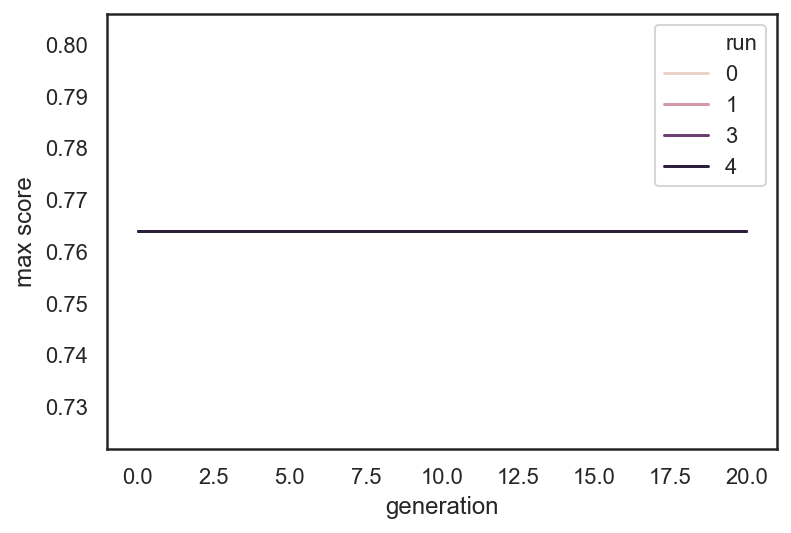

In [842]:
score_by_generation_lineplot(nia_search34)

In [843]:
print("Classification report of KNN")
print('\n')
clf = KNeighborsClassifier(**nia_search34.best_params_, n_neighbors=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of KNN


              precision    recall  f1-score   support

           0     0.7636    0.8400    0.8000       100
           1     0.6364    0.5185    0.5714        54

    accuracy                         0.7273       154
   macro avg     0.7000    0.6793    0.6857       154
weighted avg     0.7190    0.7273    0.7199       154



In [844]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.svm import LinearSVC
param_grid_lsvc={'tol': [1e-05,0.0001],'intercept_scaling': [44,1,55], 'dual': [False]}
clf_35 = LinearSVC(random_state=42)

nia_search35 = NatureInspiredSearchCV(
    clf_35,
    param_grid_lsvc,
    cv=3,
    verbose=2,
    algorithm='fa', #  Firefly algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search35.fit(X_train, y_train)
print("Firefly model")

print("LinearSVC")

fa_lsvc= nia_search35.best_estimator_
model55=evaluate(fa_lsvc , X_test,  y_test, 'LinearSVC')
model55.timetaken[0] = time.time() - time1
print(model55)
print("confusion matrix")
y_pred5=fa_lsvc.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 6 candidates, which might total in 18 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Firefly model
LinearSVC
       model  accuracy  precision  recall   f1score  rocauc    logloss  \
0  LinearSVC  0.707792        0.6     0.5  0.545455    0.66  10.092593   

   timetaken  
0   9.798468  
confusion matrix
[[82 18]
 [27 27]]
Wall time: 9.81 s


In [845]:
 nia_search35.best_params_

{'tol': 1e-05, 'intercept_scaling': 55, 'dual': False}

<AxesSubplot:xlabel='generation', ylabel='max score'>

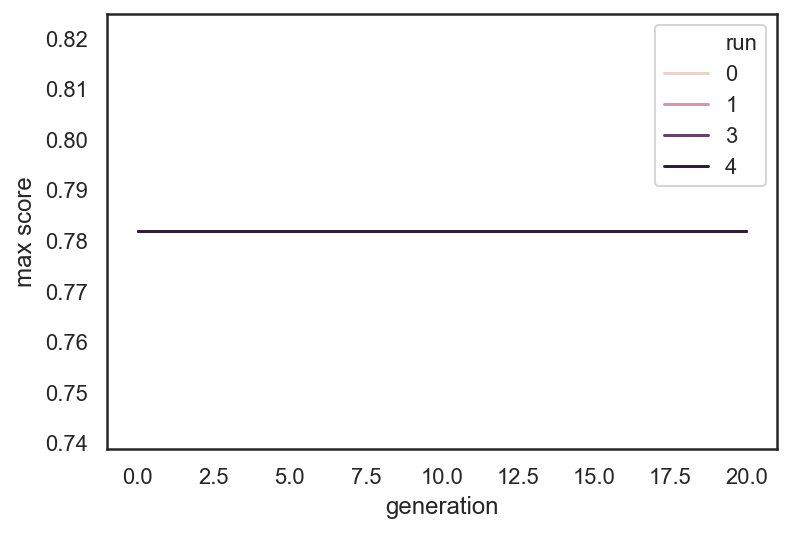

In [846]:
score_by_generation_lineplot(nia_search35)

In [847]:
print("Classification report of LinearSVC")
print('\n')
clf = LinearSVC(**nia_search35.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of LinearSVC


              precision    recall  f1-score   support

           0     0.7523    0.8200    0.7847       100
           1     0.6000    0.5000    0.5455        54

    accuracy                         0.7078       154
   macro avg     0.6761    0.6600    0.6651       154
weighted avg     0.6989    0.7078    0.7008       154



In [848]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
var_smoothing=[0.0000000001,0.000001,0.01,0.001,0.00000000000001,1,1e-15,1e-20]
param_grid_gnb = {             
               'var_smoothing' : var_smoothing
               }
clf_36 = GaussianNB()

nia_search36 = NatureInspiredSearchCV(
    clf_36,
    param_grid_gnb,
    cv=3,
    verbose=2,
    algorithm='fa', #  Firefly algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search36.fit(X_train, y_train)
print("Firefly model")

print("GaussianNB")

fa_gnb= nia_search36.best_estimator_
model56=evaluate(fa_gnb , X_test,  y_test, 'GaussianNB')
model56.timetaken[0] = time.time() - time1
print(model56)
print("confusion matrix")
y_pred5=fa_gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 8 candidates, which might total in 24 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Firefly model
GaussianNB
        model  accuracy  precision   recall   f1score    rocauc    logloss  \
0  GaussianNB  0.701299   0.566667  0.62963  0.596491  0.684815  10.316912   

   timetaken  
0   10.80859  
confusion matrix
[[74 26]
 [20 34]]
Wall time: 10.8 s


In [849]:
 nia_search36.best_estimator_

GaussianNB(priors=None, var_smoothing=1e-20)

<AxesSubplot:xlabel='generation', ylabel='max score'>

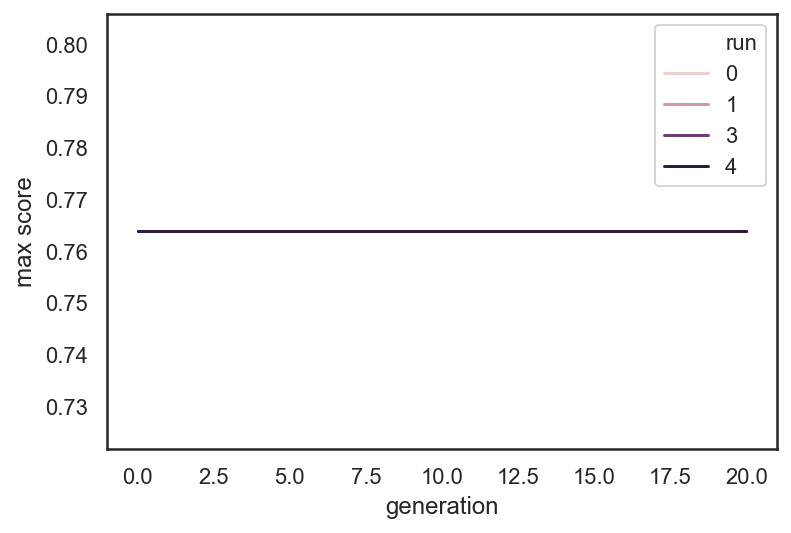

In [850]:
score_by_generation_lineplot(nia_search36)

In [851]:

print("Classification report of GaussianNB")
print('\n')
clf = GaussianNB(**nia_search36.best_params_)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of GaussianNB


              precision    recall  f1-score   support

           0     0.7872    0.7400    0.7629       100
           1     0.5667    0.6296    0.5965        54

    accuracy                         0.7013       154
   macro avg     0.6770    0.6848    0.6797       154
weighted avg     0.7099    0.7013    0.7045       154



In [852]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.svm import SVC
param_grid_svc = {'C' : [6,10],
               'degree': [4,8],              
               'tol': [0.01,0.1,0.00001],
               'cache_size': [200,1000],
               'break_ties': [False]
               }
print(param_grid_svc)
clf_37=SVC(random_state=42)
nia_search37 = NatureInspiredSearchCV(
    clf_37,
    param_grid_svc,
    cv=3,
    verbose=2,
    algorithm='fa', #  Firefly  algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search37.fit(X_train, y_train)
print("Firefly model")

print("SVC")

fa_svc= nia_search37.best_estimator_
model57=evaluate(fa_svc , X_test,  y_test, 'SVC')
model57.timetaken[0] = time.time() - time1
print(model57)
print("confusion matrix")
y_pred5=fa_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

{'C': [6, 10], 'degree': [4, 8], 'tol': [0.01, 0.1, 1e-05], 'cache_size': [200, 1000], 'break_ties': [False]}
Fitting 3 folds for some of the 24 candidates, which might total in 72 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBacken

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Firefly model
SVC
  model  accuracy  precision    recall   f1score    rocauc   logloss  \
0   SVC  0.727273   0.657895  0.462963  0.543478  0.666481  9.419734   

   timetaken  
0  14.126513  
confusion matrix
[[87 13]
 [29 25]]
Wall time: 14.1 s


In [853]:
 nia_search37.best_params_

{'C': 6, 'degree': 4, 'tol': 0.1, 'cache_size': 200, 'break_ties': False}

<AxesSubplot:xlabel='generation', ylabel='max score'>

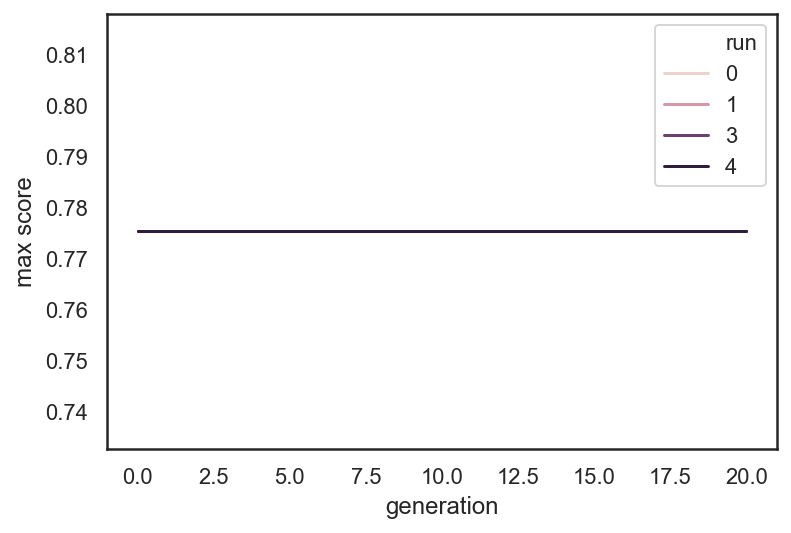

In [854]:
score_by_generation_lineplot(nia_search37)

In [855]:
print("Classification report of SVC")
print('\n')
clf = SVC(**nia_search37.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of SVC


              precision    recall  f1-score   support

           0     0.7500    0.8700    0.8056       100
           1     0.6579    0.4630    0.5435        54

    accuracy                         0.7273       154
   macro avg     0.7039    0.6665    0.6745       154
weighted avg     0.7177    0.7273    0.7137       154



In [856]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.tree import DecisionTreeClassifier
param_grid_dt={'max_features': ['auto'],
 'max_depth': [110],
 'min_samples_split': [5,2,10],
 'min_samples_leaf': [1,5,10]}

clf_38 = DecisionTreeClassifier(random_state=42)

nia_search38 = NatureInspiredSearchCV(
    clf_38,
    param_grid_dt,
    cv=3,
    verbose=2,
    algorithm='fa', #  Firefly algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search38.fit(X_train, y_train)
print("Firefly model")

print("Decision Tree")

fa_dt= nia_search38.best_estimator_
model58=evaluate(fa_dt,  X_test,  y_test, 'Decision Tree')
model58.timetaken[0] = time.time() - time1
print(model58)
print("confusion matrix")
y_pred5=fa_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 9 candidates, which might total in 27 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Firefly model
Decision Tree
           model  accuracy  precision    recall   f1score    rocauc  \
0  Decision Tree  0.675325   0.541667  0.481481  0.509804  0.630741   

     logloss  timetaken  
0  11.214003  11.683575  
confusion matrix
[[78 22]
 [28 26]]
Wall time: 11.7 s


In [857]:
 nia_search38.best_params_

{'max_features': 'auto',
 'max_depth': 110,
 'min_samples_split': 5,
 'min_samples_leaf': 10}

<AxesSubplot:xlabel='generation', ylabel='max score'>

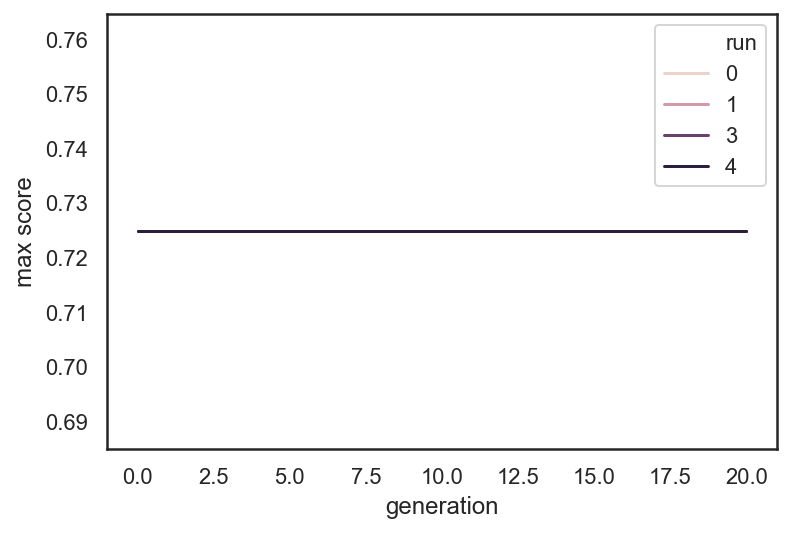

In [858]:
score_by_generation_lineplot(nia_search38)


In [859]:
print("Classification report of Decision Tree")
print('\n')
clf = DecisionTreeClassifier(**nia_search38.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

Classification report of Decision Tree


              precision    recall  f1-score   support

           0     0.7358    0.7800    0.7573       100
           1     0.5417    0.4815    0.5098        54

    accuracy                         0.6753       154
   macro avg     0.6388    0.6307    0.6335       154
weighted avg     0.6678    0.6753    0.6705       154



In [860]:
df_fa= pd.concat([model51,model52,model53,model54,model55,model56,model7,model58],axis = 0).reset_index()
df_fa.drop('index', axis=1, inplace=True)
df_fa

model  accuracy  precision    recall   f1score    rocauc  \
0        Random Forest  0.772727   0.720930  0.574074  0.639175  0.727037   
1           Extra Tree  0.753247   0.690476  0.537037  0.604167  0.703519   
2  Logistic Regression  0.701299   0.583333  0.518519  0.549020  0.659259   
3                  KNN  0.727273   0.636364  0.518519  0.571429  0.679259   
4            LinearSVC  0.707792   0.600000  0.500000  0.545455  0.660000   
5           GaussianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.720779   0.648649  0.444444  0.527473  0.657222   
7        Decision Tree  0.675325   0.541667  0.481481  0.509804  0.630741   

     logloss  timetaken  
0   7.849784  57.577813  
1   8.522623  23.430817  
2  10.316881  10.450008  
3   9.419749  10.482502  
4  10.092593   9.798468  
5  10.316912  10.808590  
6   9.644012   0.049407  
7  11.214003  11.683575

In [861]:
df_gwa

model  accuracy  precision    recall   f1score    rocauc  \
0        Random Forest  0.753247   0.666667  0.592593  0.627451  0.716296   
1           Extra Tree  0.753247   0.700000  0.518519  0.595745  0.699259   
2  Logistic Regression  0.701299   0.583333  0.518519  0.549020  0.659259   
3                  KNN  0.714286   0.613636  0.500000  0.551020  0.665000   
4            LinearSVC  0.707792   0.600000  0.500000  0.545455  0.660000   
5           GaussianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.727273   0.657895  0.462963  0.543478  0.666481   
7        Decision Tree  0.759740   0.688889  0.574074  0.626263  0.717037   

     logloss  timetaken  
0   8.522638  25.054046  
1   8.522618  48.319504  
2  10.316881   2.363941  
3   9.868310   4.081748  
4  10.092593   1.242658  
5  10.316912   0.930750  
6   9.419734   1.807617  
7   8.298350   1.038526

In [862]:
df_hba

model  accuracy  precision    recall   f1score    rocauc  \
0        Random Forest  0.772727   0.702128  0.611111  0.653465  0.735556   
1           Extra Tree  0.746753   0.682927  0.518519  0.589474  0.694259   
2  Logistic Regression  0.701299   0.583333  0.518519  0.549020  0.659259   
3                  KNN  0.727273   0.636364  0.518519  0.571429  0.679259   
4            LinearSVC  0.707792   0.600000  0.500000  0.545455  0.660000   
5           GaussianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.720779   0.648649  0.444444  0.527473  0.657222   
7        Decision Tree  0.753247   0.710526  0.500000  0.586957  0.695000   

     logloss  timetaken  
0   7.849795   3.742924  
1   8.746900   3.482733  
2  10.316881   6.399849  
3   9.419749   1.607271  
4  10.092593   1.474313  
5  10.316912   1.401385  
6   9.644012   1.565065  
7   8.522612   1.520355

In [863]:
df_bat

model  accuracy  precision    recall   f1score    rocauc  \
0        Random Forest  0.759740   0.680851  0.592593  0.633663  0.721296   
1           Extra Tree  0.746753   0.692308  0.500000  0.580645  0.690000   
2  Logistic Regression  0.701299   0.583333  0.518519  0.549020  0.659259   
3                  KNN  0.727273   0.636364  0.518519  0.571429  0.679259   
4            LinearSVC  0.707792   0.600000  0.500000  0.545455  0.660000   
5           GaussianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.720779   0.648649  0.444444  0.527473  0.657222   
7        Decision Tree  0.733766   0.632653  0.574074  0.601942  0.697037   

     logloss  timetaken  
0   8.298355   9.570852  
1   8.746895   8.184439  
2  10.316881   0.956905  
3   9.419749   0.881365  
4  10.092593   0.797487  
5  10.316912   0.831271  
6   9.644012   0.847120  
7   9.195482   0.777366

In [864]:
df_randomized

model  accuracy  precision    recall   f1score    rocauc  \
0         RandomForest  0.746753   0.659574  0.574074  0.613861  0.707037   
1           Extra Tree  0.740260   0.675000  0.500000  0.574468  0.685000   
2  Logistic Regression  0.701299   0.583333  0.518519  0.549020  0.659259   
3                  KNN  0.720779   0.622222  0.518519  0.565657  0.674259   
4            LinearSVC  0.707792   0.600000  0.500000  0.545455  0.660000   
5           GassuianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.720779   0.648649  0.444444  0.527473  0.657222   
7        Decision Tree  0.707792   0.595745  0.518519  0.554455  0.664259   

     logloss  timetaken  
0   8.746916   7.077144  
1   8.971178  14.604259  
2  10.316881   2.920889  
3   9.644032   0.227777  
4  10.092593   0.070647  
5  10.316912   0.060392  
6   9.644012   0.101501  
7  10.092598   0.177592

In [865]:
df_base

model  accuracy  precision    recall   f1score    rocauc  \
0         RandomForest  0.740260   0.659091  0.537037  0.591837  0.693519   
1           Extra Tree  0.733766   0.627451  0.592593  0.609524  0.701296   
2  Logistic Regression  0.740260   0.659091  0.537037  0.591837  0.693519   
3                  KNN  0.688312   0.560000  0.518519  0.538462  0.649259   
4            LinearSVC  0.649351   0.000000  0.000000  0.000000  0.500000   
5           GaussianNB  0.701299   0.566667  0.629630  0.596491  0.684815   
6                  SVC  0.720779   0.648649  0.444444  0.527473  0.657222   
7        Decision Tree  0.675325   0.547619  0.425926  0.479167  0.617963   

     logloss  timetaken  
0   8.971189   0.527565  
1   9.195487   1.216379  
2   8.971189   0.078193  
3  10.765447   0.041798  
4  12.111000   0.099567  
5  10.316912   0.016155  
6   9.644012   0.049407  
7  11.213987   0.027816

### COMPARISION AMONG THE TECHNIQUES

#### BASE MODEL VS OTHER TECHNIQUES

In [866]:
print("COMPARISION OF BASE LINE MODEL AND RANDOMIZED MODEL")

comp_base_randomized = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_base_randomized.model = df_base.model
for i in range(1,8):
    for j in range(8):
        if df_base[df_base.columns[i]][j] < df_randomized[df_randomized.columns[i]][j]:
            comp_base_randomized[comp_base_randomized.columns[i]][j] = 1
comp_base_randomized


COMPARISION OF BASE LINE MODEL AND RANDOMIZED MODEL


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0         RandomForest         1          1       1        1       1        0   
1           Extra Tree         1          1       0        0       0        0   
2  Logistic Regression         0          0       0        0       0        1   
3                  KNN         1          1       0        1       1        0   
4            LinearSVC         1          1       1        1       1        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         0          0       0        0       0        0   
7        Decision Tree         1          1       1        1       1        0   

   timetaken  
0          1  
1          1  
2          1  
3          1  
4          0  
5          1  
6          1  
7          1

In [867]:
print("COMPARISION OF BASE LINE MODEL AND BAT ALGORITHM")

comp_base_ba = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_base_ba.model = df_base.model
for i in range(1,8):
    for j in range(8):
        if df_base[df_base.columns[i]][j] < df_bat[df_bat.columns[i]][j]:
            comp_base_ba[comp_base_ba.columns[i]][j] = 1
comp_base_ba


COMPARISION OF BASE LINE MODEL AND BAT ALGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0         RandomForest         1          1       1        1       1        0   
1           Extra Tree         1          1       0        0       0        0   
2  Logistic Regression         0          0       0        0       0        1   
3                  KNN         1          1       0        1       1        0   
4            LinearSVC         1          1       1        1       1        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         0          0       0        0       0        0   
7        Decision Tree         1          1       1        1       1        0   

   timetaken  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1

In [868]:
print("COMPARISION OF BASE LINE MODEL AND HYBRID BAT ALGORITHM")

comp_base_hba = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_base_hba.model = df_base.model
for i in range(1,8):
    for j in range(8):
        if df_base[df_base.columns[i]][j] < df_hba[df_hba.columns[i]][j]:
            comp_base_hba[comp_base_hba.columns[i]][j] = 1
comp_base_hba


COMPARISION OF BASE LINE MODEL AND HYBRID BAT ALGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0         RandomForest         1          1       1        1       1        0   
1           Extra Tree         1          1       0        0       0        0   
2  Logistic Regression         0          0       0        0       0        1   
3                  KNN         1          1       0        1       1        0   
4            LinearSVC         1          1       1        1       1        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         0          0       0        0       0        0   
7        Decision Tree         1          1       1        1       1        0   

   timetaken  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1

In [869]:
print("COMPARISION OF BASE LINE MODEL AND GREY WOLF ALGORITHM")

comp_base_gwa = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_base_gwa.model = df_base.model
for i in range(1,8):
    for j in range(8):
        if df_base[df_base.columns[i]][j] < df_gwa[df_gwa.columns[i]][j]:
            comp_base_gwa[comp_base_gwa.columns[i]][j] = 1
comp_base_gwa


COMPARISION OF BASE LINE MODEL AND GREY WOLF ALGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0         RandomForest         1          1       1        1       1        0   
1           Extra Tree         1          1       0        0       0        0   
2  Logistic Regression         0          0       0        0       0        1   
3                  KNN         1          1       0        1       1        0   
4            LinearSVC         1          1       1        1       1        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         1          1       1        1       1        0   
7        Decision Tree         1          1       1        1       1        0   

   timetaken  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1

In [870]:
print("COMPARISION OF BASE LINE MODEL AND FIREFLY ALGORITHM")

comp_base_fa = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_base_fa.model = df_base.model
for i in range(1,8):
    for j in range(8):
        if df_base[df_base.columns[i]][j] < df_fa[df_fa.columns[i]][j]:
            comp_base_fa[comp_base_fa.columns[i]][j] = 1
comp_base_fa


COMPARISION OF BASE LINE MODEL AND FIREFLY ALGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0         RandomForest         1          1       1        1       1        0   
1           Extra Tree         1          1       0        0       1        0   
2  Logistic Regression         0          0       0        0       0        1   
3                  KNN         1          1       0        1       1        0   
4            LinearSVC         1          1       1        1       1        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         0          0       0        0       0        0   
7        Decision Tree         0          0       1        1       1        1   

   timetaken  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          0  
7          1

#### RANDOMIZED SEARCH VS NATURE INSPIRIED ALGORITHM

In [871]:
print("COMPARISION OF RANDOMIZED MODEL AND BAT ALOGORITHM")

comp_bat_randomized = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_bat_randomized.model = df_randomized.model
for i in range(1,8):
    for j in range(8):
        if df_bat[df_bat.columns[i]][j] > df_randomized[df_randomized.columns[i]][j]:
            comp_bat_randomized[comp_bat_randomized.columns[i]][j] = 1
comp_bat_randomized


COMPARISION OF RANDOMIZED MODEL AND BAT ALOGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0         RandomForest         1          1       1        1       1        0   
1           Extra Tree         1          1       0        1       1        0   
2  Logistic Regression         0          0       0        0       0        0   
3                  KNN         1          1       0        1       1        0   
4            LinearSVC         0          0       0        0       0        0   
5           GassuianNB         0          0       0        0       0        0   
6                  SVC         0          0       0        0       0        0   
7        Decision Tree         1          1       1        1       1        0   

   timetaken  
0          1  
1          0  
2          0  
3          1  
4          1  
5          1  
6          1  
7          1

In [872]:
print("COMPARISION OF RANDOMIZED MODEL AND HYBRID BAT ALOGORITHM")

comp_hba_randomized = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_hba_randomized.model = df_randomized.model
for i in range(1,8):
    for j in range(8):
        if df_hba[df_hba.columns[i]][j] > df_randomized[df_randomized.columns[i]][j]:
            comp_hba_randomized[comp_hba_randomized.columns[i]][j] = 1
comp_hba_randomized


COMPARISION OF RANDOMIZED MODEL AND HYBRID BAT ALOGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0         RandomForest         1          1       1        1       1        0   
1           Extra Tree         1          1       1        1       1        0   
2  Logistic Regression         0          0       0        0       0        0   
3                  KNN         1          1       0        1       1        0   
4            LinearSVC         0          0       0        0       0        0   
5           GassuianNB         0          0       0        0       0        0   
6                  SVC         0          0       0        0       0        0   
7        Decision Tree         1          1       0        1       1        0   

   timetaken  
0          0  
1          0  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1

In [873]:
print("COMPARISION OF RANDOMIZED MODEL AND GREYWOLF ALOGORITHM")

comp_gwa_randomized = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_gwa_randomized.model = df_randomized.model
for i in range(1,8):
    for j in range(8):
        if df_gwa[df_gwa.columns[i]][j] > df_randomized[df_randomized.columns[i]][j]:
            comp_gwa_randomized[comp_gwa_randomized.columns[i]][j] = 1
comp_gwa_randomized


COMPARISION OF RANDOMIZED MODEL AND GREYWOLF ALOGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0         RandomForest         1          1       1        1       1        0   
1           Extra Tree         1          1       1        1       1        0   
2  Logistic Regression         0          0       0        0       0        0   
3                  KNN         0          0       0        0       0        1   
4            LinearSVC         0          0       0        0       0        0   
5           GassuianNB         0          0       0        0       0        0   
6                  SVC         1          1       1        1       1        0   
7        Decision Tree         1          1       1        1       1        0   

   timetaken  
0          1  
1          1  
2          0  
3          1  
4          1  
5          1  
6          1  
7          1

In [874]:
print("COMPARISION OF RANDOMIZED MODEL AND FIREFLY ALOGORITHM")

comp_fa_randomized = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_fa_randomized.model = df_randomized.model
for i in range(1,8):
    for j in range(8):
        if df_fa[df_fa.columns[i]][j] > df_randomized[df_randomized.columns[i]][j]:
            comp_fa_randomized[comp_fa_randomized.columns[i]][j] = 1
comp_fa_randomized


COMPARISION OF RANDOMIZED MODEL AND FIREFLY ALOGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0         RandomForest         1          1       0        1       1        0   
1           Extra Tree         1          1       1        1       1        0   
2  Logistic Regression         0          0       0        0       0        0   
3                  KNN         1          1       0        1       1        0   
4            LinearSVC         0          0       0        0       0        0   
5           GassuianNB         0          0       0        0       0        0   
6                  SVC         0          0       0        0       0        0   
7        Decision Tree         0          0       0        0       0        1   

   timetaken  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          0  
7          1

#### COMPARISION AMONG NATURE INSPIRIED ALGORITHMS

In [875]:
print("COMPARISION OF HYBRID BAT AND BAT ALOGORITHM")

comp_bat_hba = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_bat_hba.model = df_bat.model
for i in range(1,8):
    for j in range(8):
        if df_bat[df_bat.columns[i]][j] > df_hba[df_hba.columns[i]][j]:
            comp_bat_hba[comp_bat_hba.columns[i]][j] = 1
comp_bat_hba


COMPARISION OF HYBRID BAT AND BAT ALOGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0        Random Forest         0          0       0        0       0        1   
1           Extra Tree         0          1       0        0       0        0   
2  Logistic Regression         0          0       0        0       0        0   
3                  KNN         0          0       0        0       0        0   
4            LinearSVC         0          0       0        0       0        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         0          0       0        0       0        0   
7        Decision Tree         0          0       1        1       1        1   

   timetaken  
0          1  
1          1  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0

In [876]:
print("COMPARISION OF HYBRID BAT AND GREYWOLF ALOGORITHM")

comp_gwa_hba = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_gwa_hba.model = df_gwa.model
for i in range(1,8):
    for j in range(8):
        if df_gwa[df_gwa.columns[i]][j] > df_hba[df_hba.columns[i]][j]:
            comp_gwa_hba[comp_gwa_hba.columns[i]][j] = 1
comp_gwa_hba


COMPARISION OF HYBRID BAT AND GREYWOLF ALOGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0        Random Forest         0          0       0        0       0        1   
1           Extra Tree         1          1       0        1       1        0   
2  Logistic Regression         0          0       0        0       0        0   
3                  KNN         0          0       0        0       0        1   
4            LinearSVC         0          0       0        0       0        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         1          1       1        1       1        0   
7        Decision Tree         1          0       1        1       1        0   

   timetaken  
0          1  
1          1  
2          0  
3          1  
4          0  
5          0  
6          1  
7          0

In [877]:
print("COMPARISION OF HYBRID BAT AND GREYWOLF ALOGORITHM")

comp_fa_hba = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_fa_hba.model = df_fa.model
for i in range(1,8):
    for j in range(8):
        if df_fa[df_fa.columns[i]][j] > df_hba[df_hba.columns[i]][j]:
            comp_fa_hba[comp_fa_hba.columns[i]][j] = 1
comp_fa_hba


COMPARISION OF HYBRID BAT AND GREYWOLF ALOGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0        Random Forest         0          1       0        0       0        0   
1           Extra Tree         1          1       1        1       1        0   
2  Logistic Regression         0          0       0        0       0        0   
3                  KNN         0          0       0        0       0        0   
4            LinearSVC         0          0       0        0       0        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         0          0       0        0       0        0   
7        Decision Tree         0          0       0        0       0        1   

   timetaken  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          0  
7          1

In [878]:
print("COMPARISION OF BAT AND FIReFLY ALOGORITHM")

comp_fa_bat = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_fa_bat.model = df_fa.model
for i in range(1,8):
    for j in range(8):
        if df_fa[df_fa.columns[i]][j] > df_bat[df_bat.columns[i]][j]:
            comp_fa_bat[comp_fa_bat.columns[i]][j] = 1
comp_fa_bat


COMPARISION OF BAT AND FIReFLY ALOGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0        Random Forest         1          1       0        1       1        0   
1           Extra Tree         1          0       1        1       1        0   
2  Logistic Regression         0          0       0        0       0        0   
3                  KNN         0          0       0        0       0        0   
4            LinearSVC         0          0       0        0       0        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         0          0       0        0       0        0   
7        Decision Tree         0          0       0        0       0        1   

   timetaken  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          0  
7          1

In [879]:
print("COMPARISION OF BAT AND GREYWOLF ALOGORITHM")

comp_gwa_bat = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_gwa_bat.model = df_gwa.model
for i in range(1,8):
    for j in range(8):
        if df_gwa[df_gwa.columns[i]][j] > df_bat[df_bat.columns[i]][j]:
            comp_gwa_bat[comp_gwa_bat.columns[i]][j] = 1
comp_gwa_bat


COMPARISION OF BAT AND GREYWOLF ALOGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0        Random Forest         0          0       0        0       0        1   
1           Extra Tree         1          1       1        1       1        0   
2  Logistic Regression         0          0       0        0       0        0   
3                  KNN         0          0       0        0       0        1   
4            LinearSVC         0          0       0        0       0        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         1          1       1        1       1        0   
7        Decision Tree         1          1       0        1       1        0   

   timetaken  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1

In [880]:
print("COMPARISION OF FIREFLY AND GREYWOLF ALOGORITHM")

comp_gwa_fa = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_gwa_fa.model = df_gwa.model
for i in range(1,8):
    for j in range(8):
        if df_gwa[df_gwa.columns[i]][j] > df_fa[df_fa.columns[i]][j]:
            comp_gwa_fa[comp_gwa_fa.columns[i]][j] = 1
comp_gwa_fa


COMPARISION OF FIREFLY AND GREYWOLF ALOGORITHM


model  accuracy  precision  recall  f1score  rocauc  logloss  \
0        Random Forest         0          0       1        0       0        1   
1           Extra Tree         0          1       0        0       0        0   
2  Logistic Regression         0          0       0        0       0        0   
3                  KNN         0          0       0        0       0        1   
4            LinearSVC         0          0       0        0       0        0   
5           GaussianNB         0          0       0        0       0        0   
6                  SVC         1          1       1        1       1        0   
7        Decision Tree         1          1       1        1       1        0   

   timetaken  
0          0  
1          1  
2          0  
3          0  
4          0  
5          0  
6          1  
7          0

### PLOT REPRESENTATION OF PERFORMANCE METRICS

#### BASE LINE MODEL

Base Model




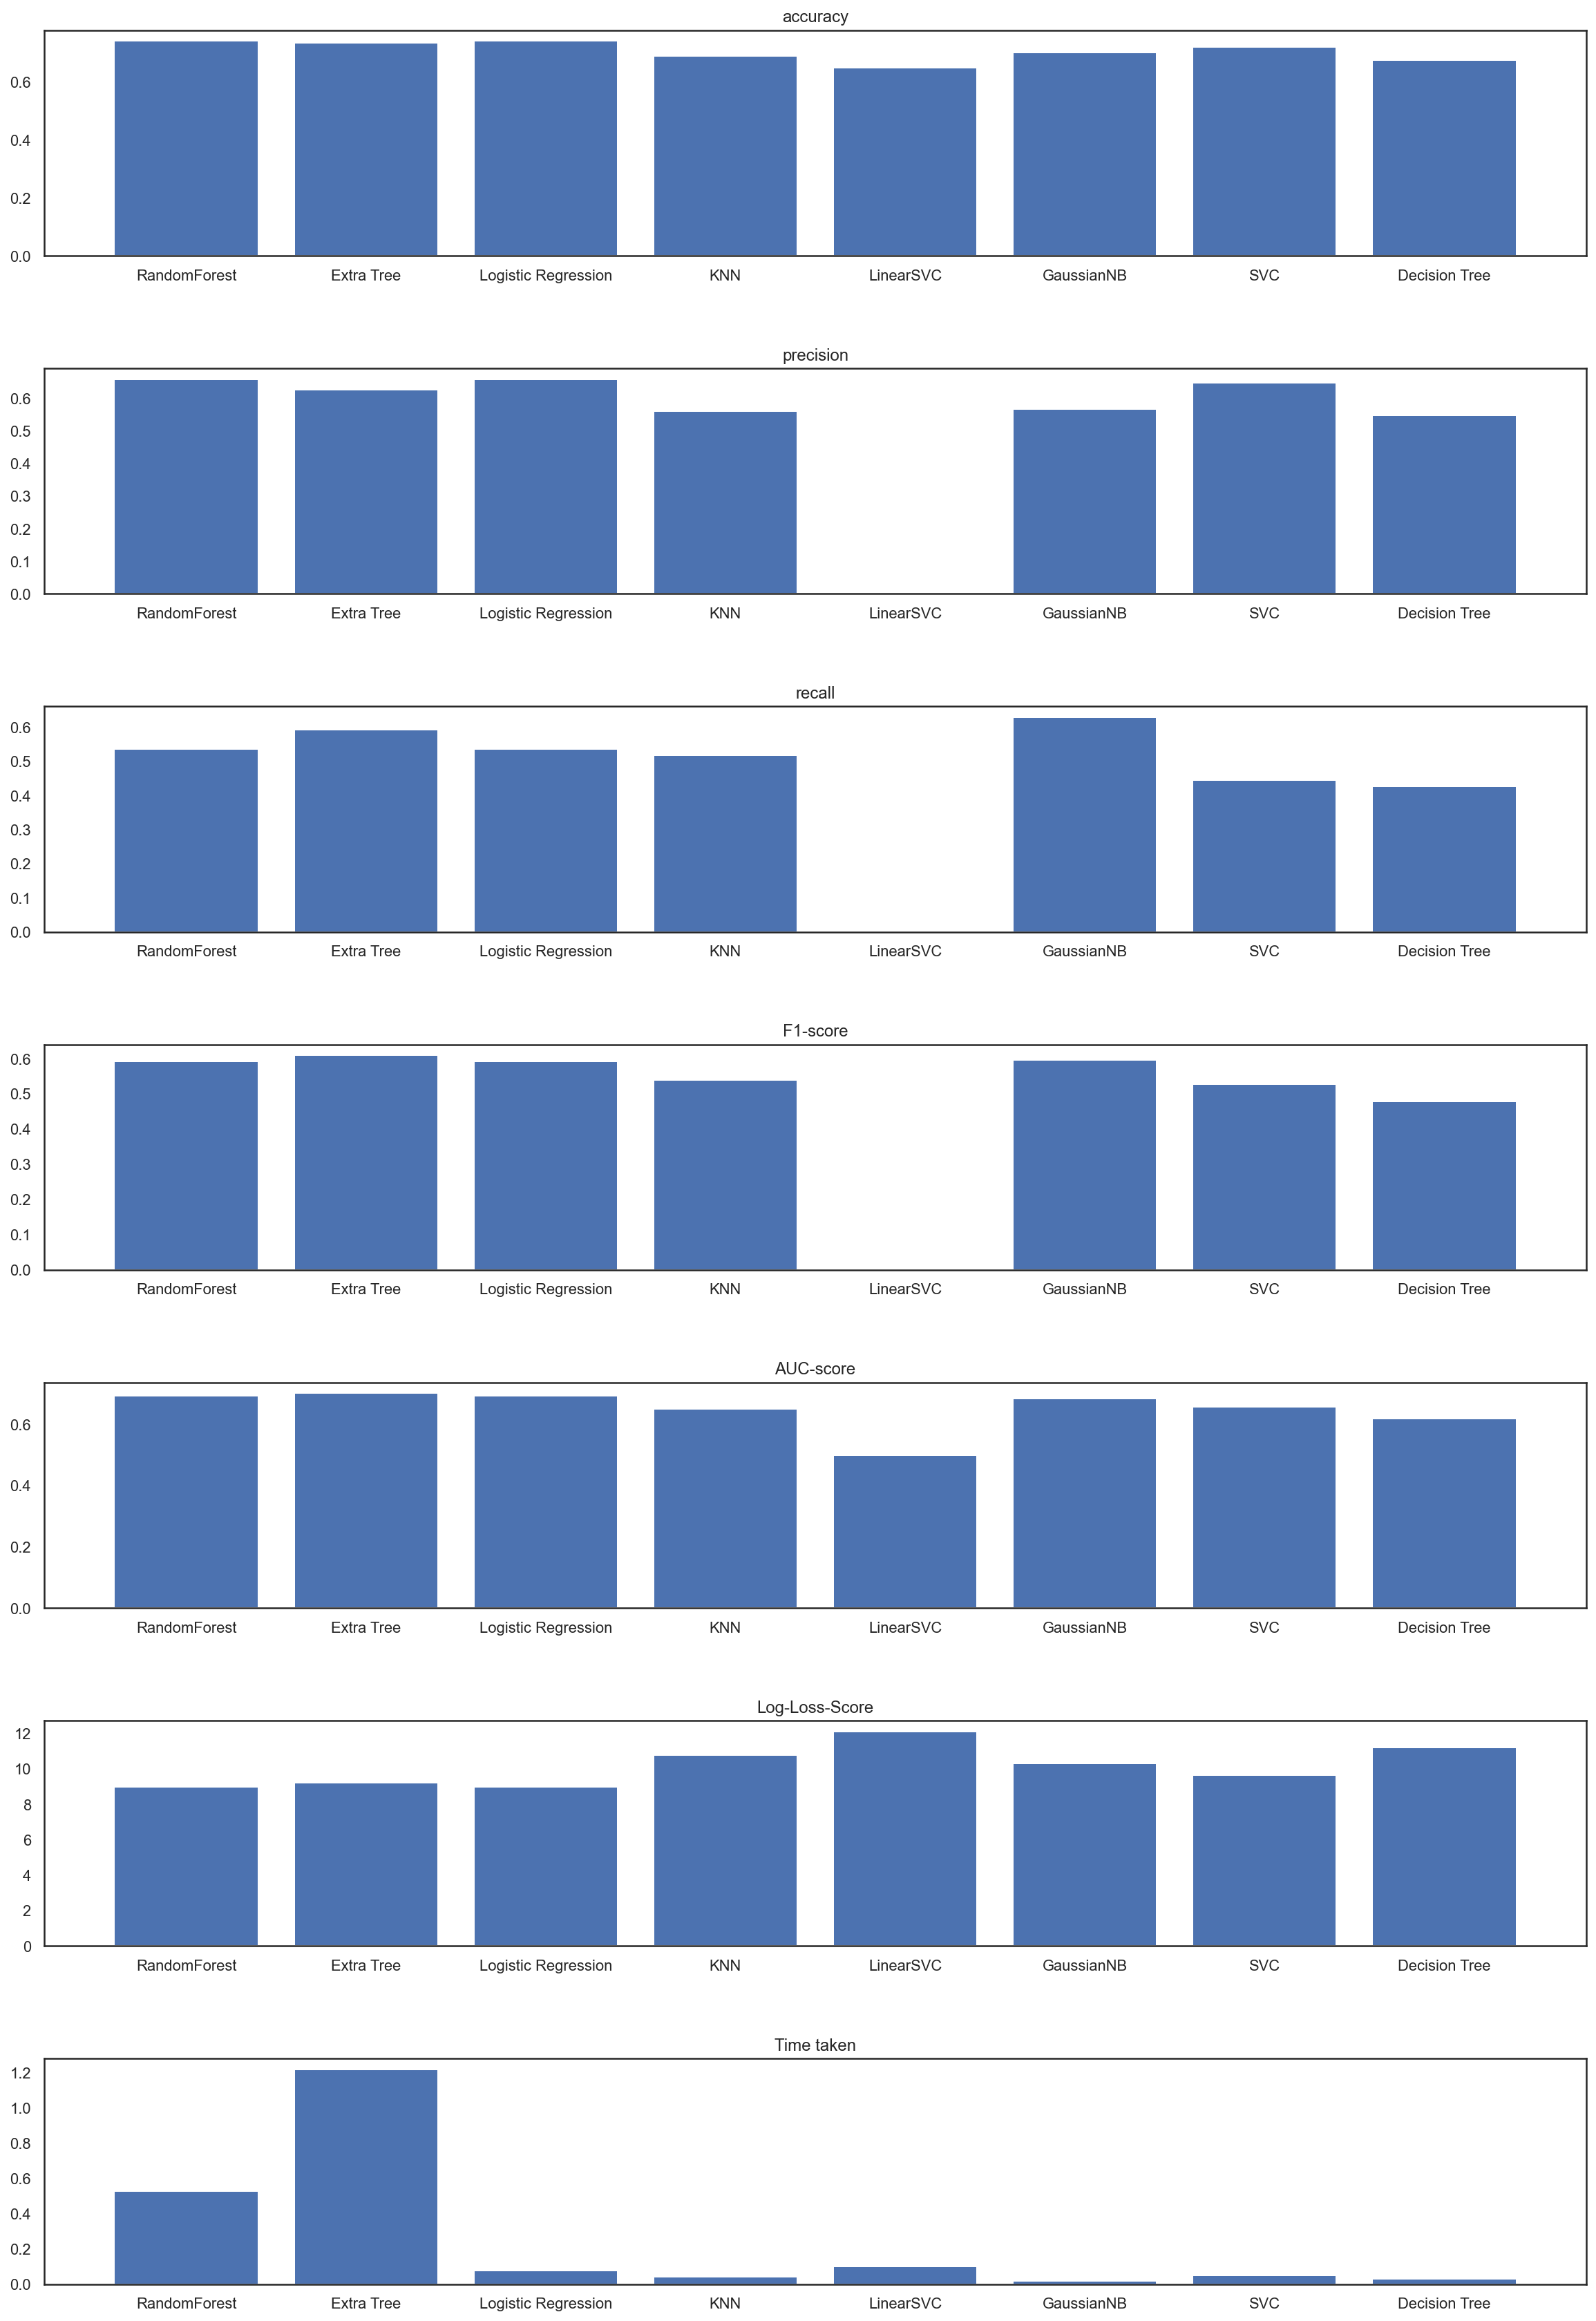

In [881]:
print("Base Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(20, 30))
ax[0].bar(df_base.model, df_base.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_base.model, df_base.precision)
ax[1].set_title('precision')

ax[2].bar(df_base.model, df_base.recall)
ax[2].set_title('recall')

ax[3].bar(df_base.model, df_base.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_base.model, df_base.rocauc)
ax[4].set_title('AUC-score')                                                                                          
                                                                                                                   
ax[5].bar(df_base.model, df_base.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_base.model, df_base.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### RANDOMIZED MODEL

Randomized Model




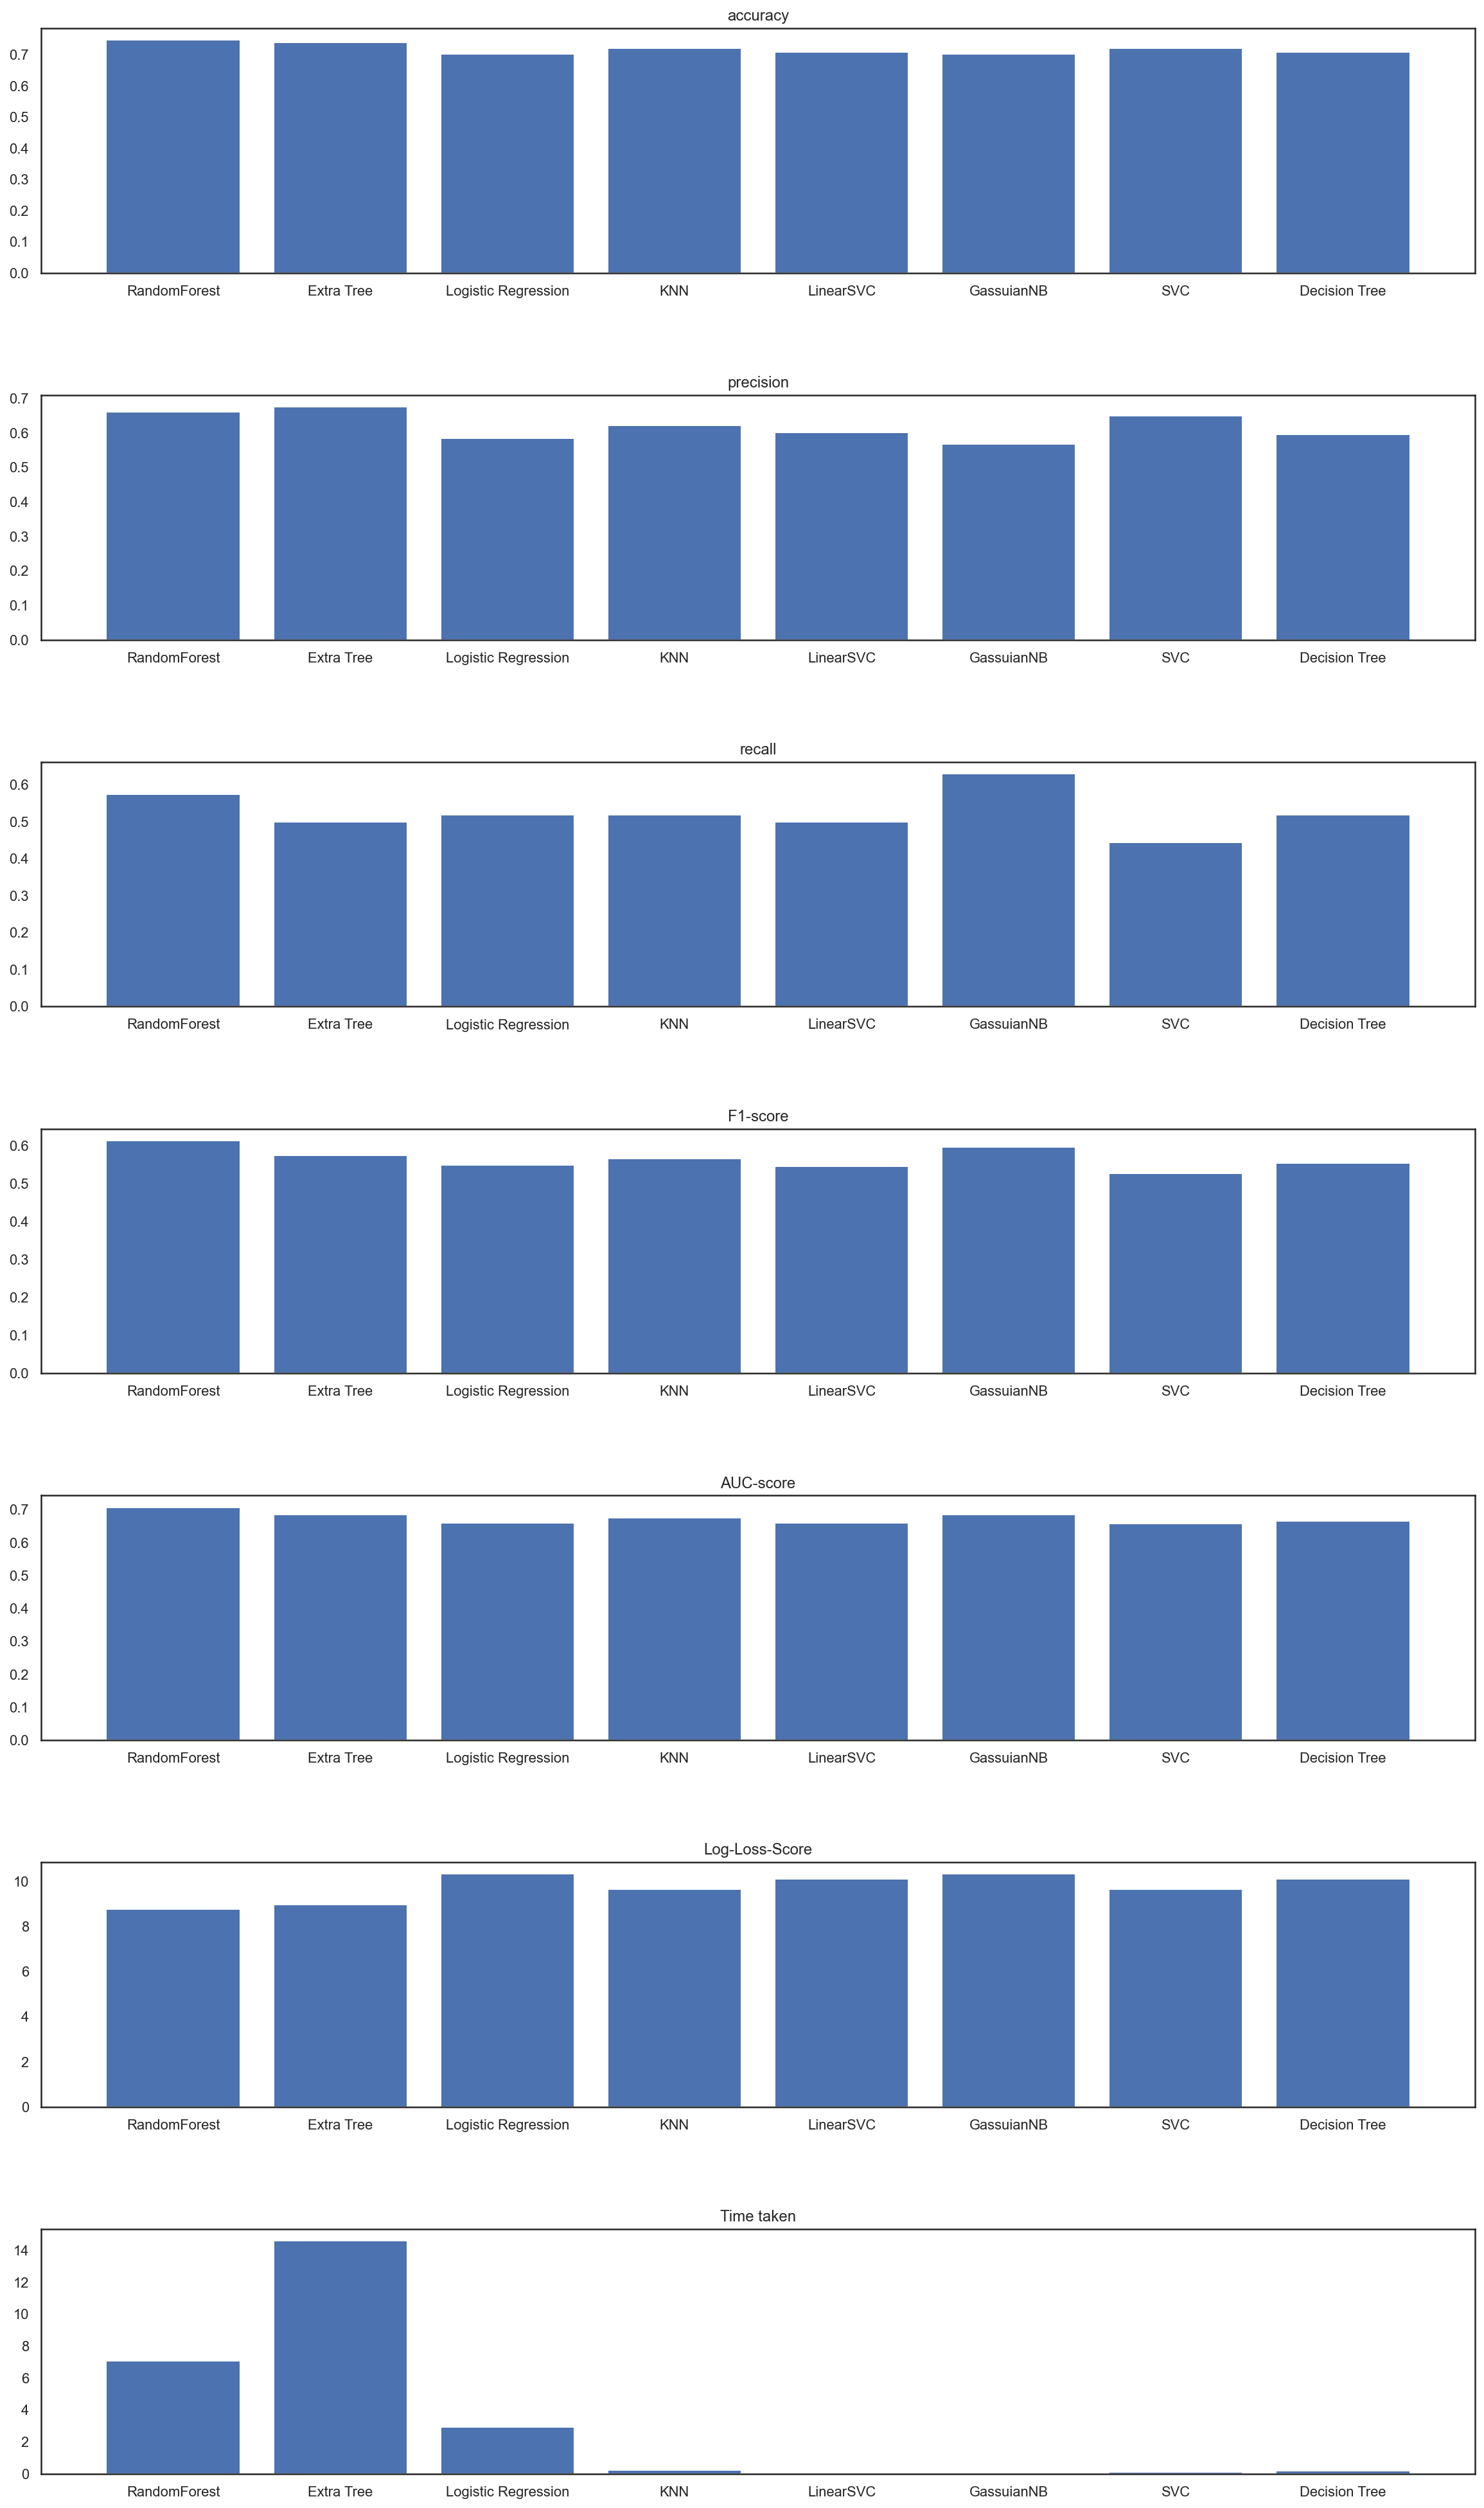

In [882]:
print("Randomized Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(20, 35))

ax[0].bar(df_randomized.model, df_randomized.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_randomized.model, df_randomized.precision)
ax[1].set_title('precision')

ax[2].bar(df_randomized.model, df_randomized.recall)
ax[2].set_title('recall')


ax[3].bar(df_randomized.model, df_randomized.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_randomized.model,df_randomized.rocauc)
ax[4].set_title('AUC-score')

ax[5].bar(df_randomized.model, df_randomized.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_randomized.model, df_randomized.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### BAT MODEL

Bat Model




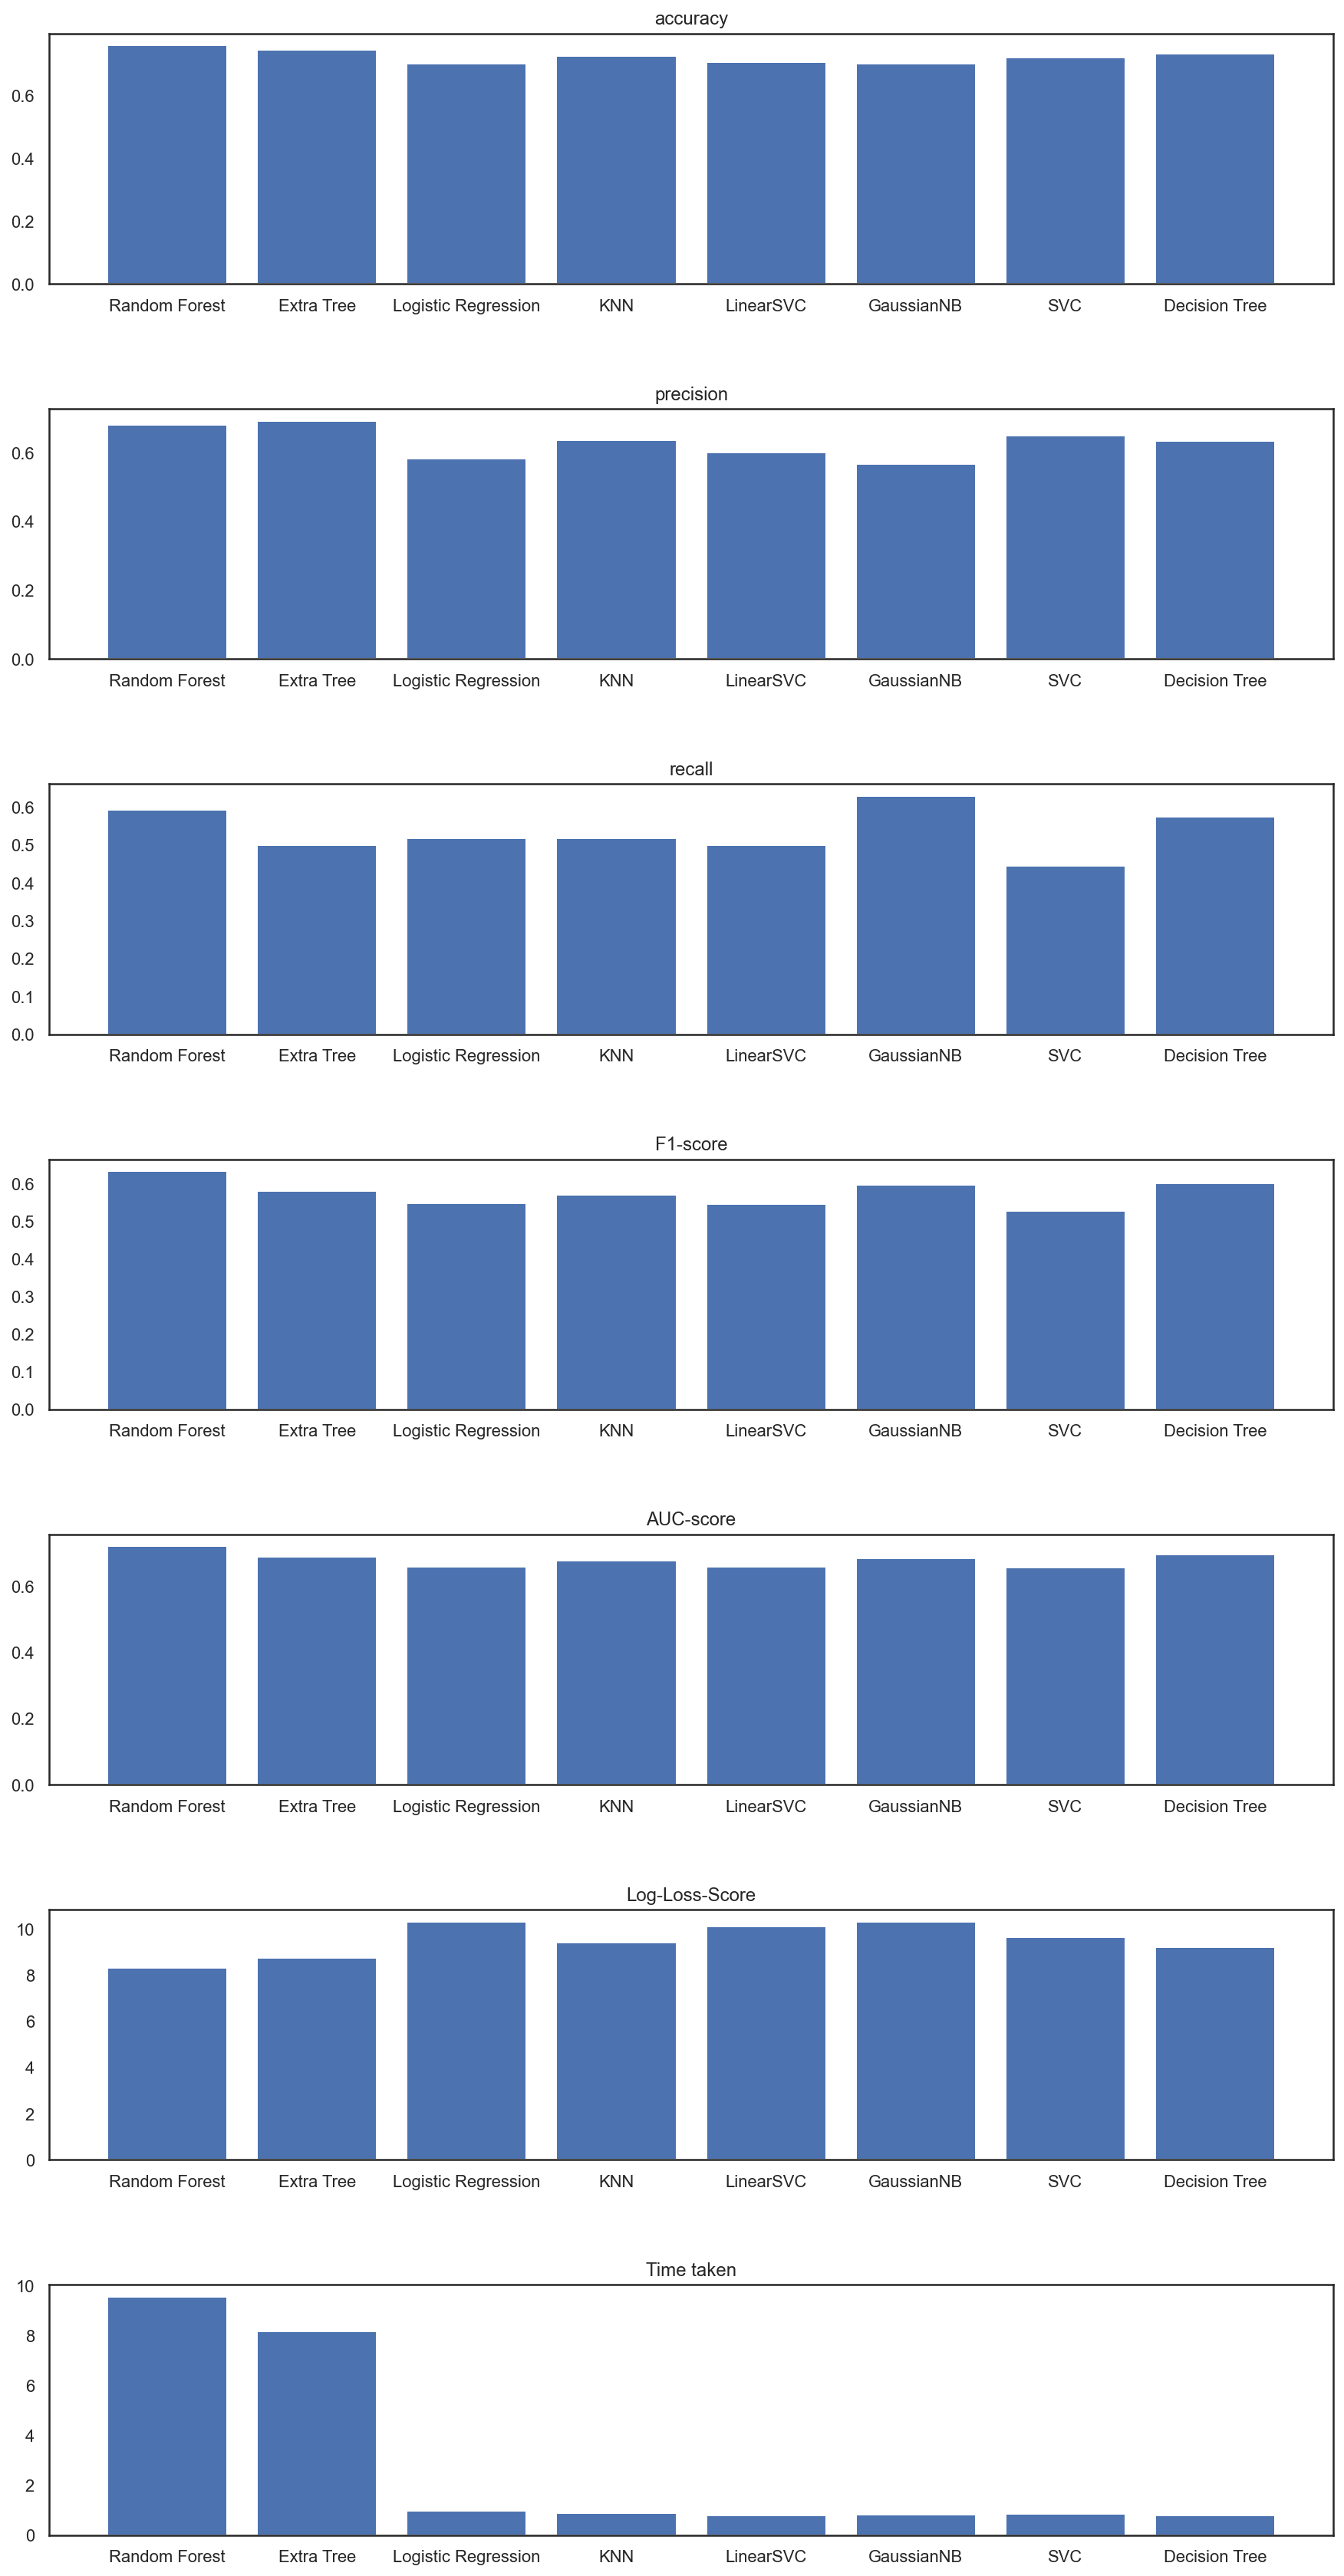

In [883]:
print("Bat Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(15, 30))
ax[0].bar(df_bat.model, df_bat.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_bat.model, df_bat.precision)
ax[1].set_title('precision')

ax[2].bar(df_bat.model, df_bat.recall)
ax[2].set_title('recall')

ax[3].bar(df_bat.model, df_bat.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_bat.model, df_bat.rocauc)
ax[4].set_title('AUC-score')                                                                                          
                                                                                                                   
ax[5].bar(df_bat.model, df_bat.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_bat.model, df_bat.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### HYBRID BAT MODEL

Hybrid Bat Model




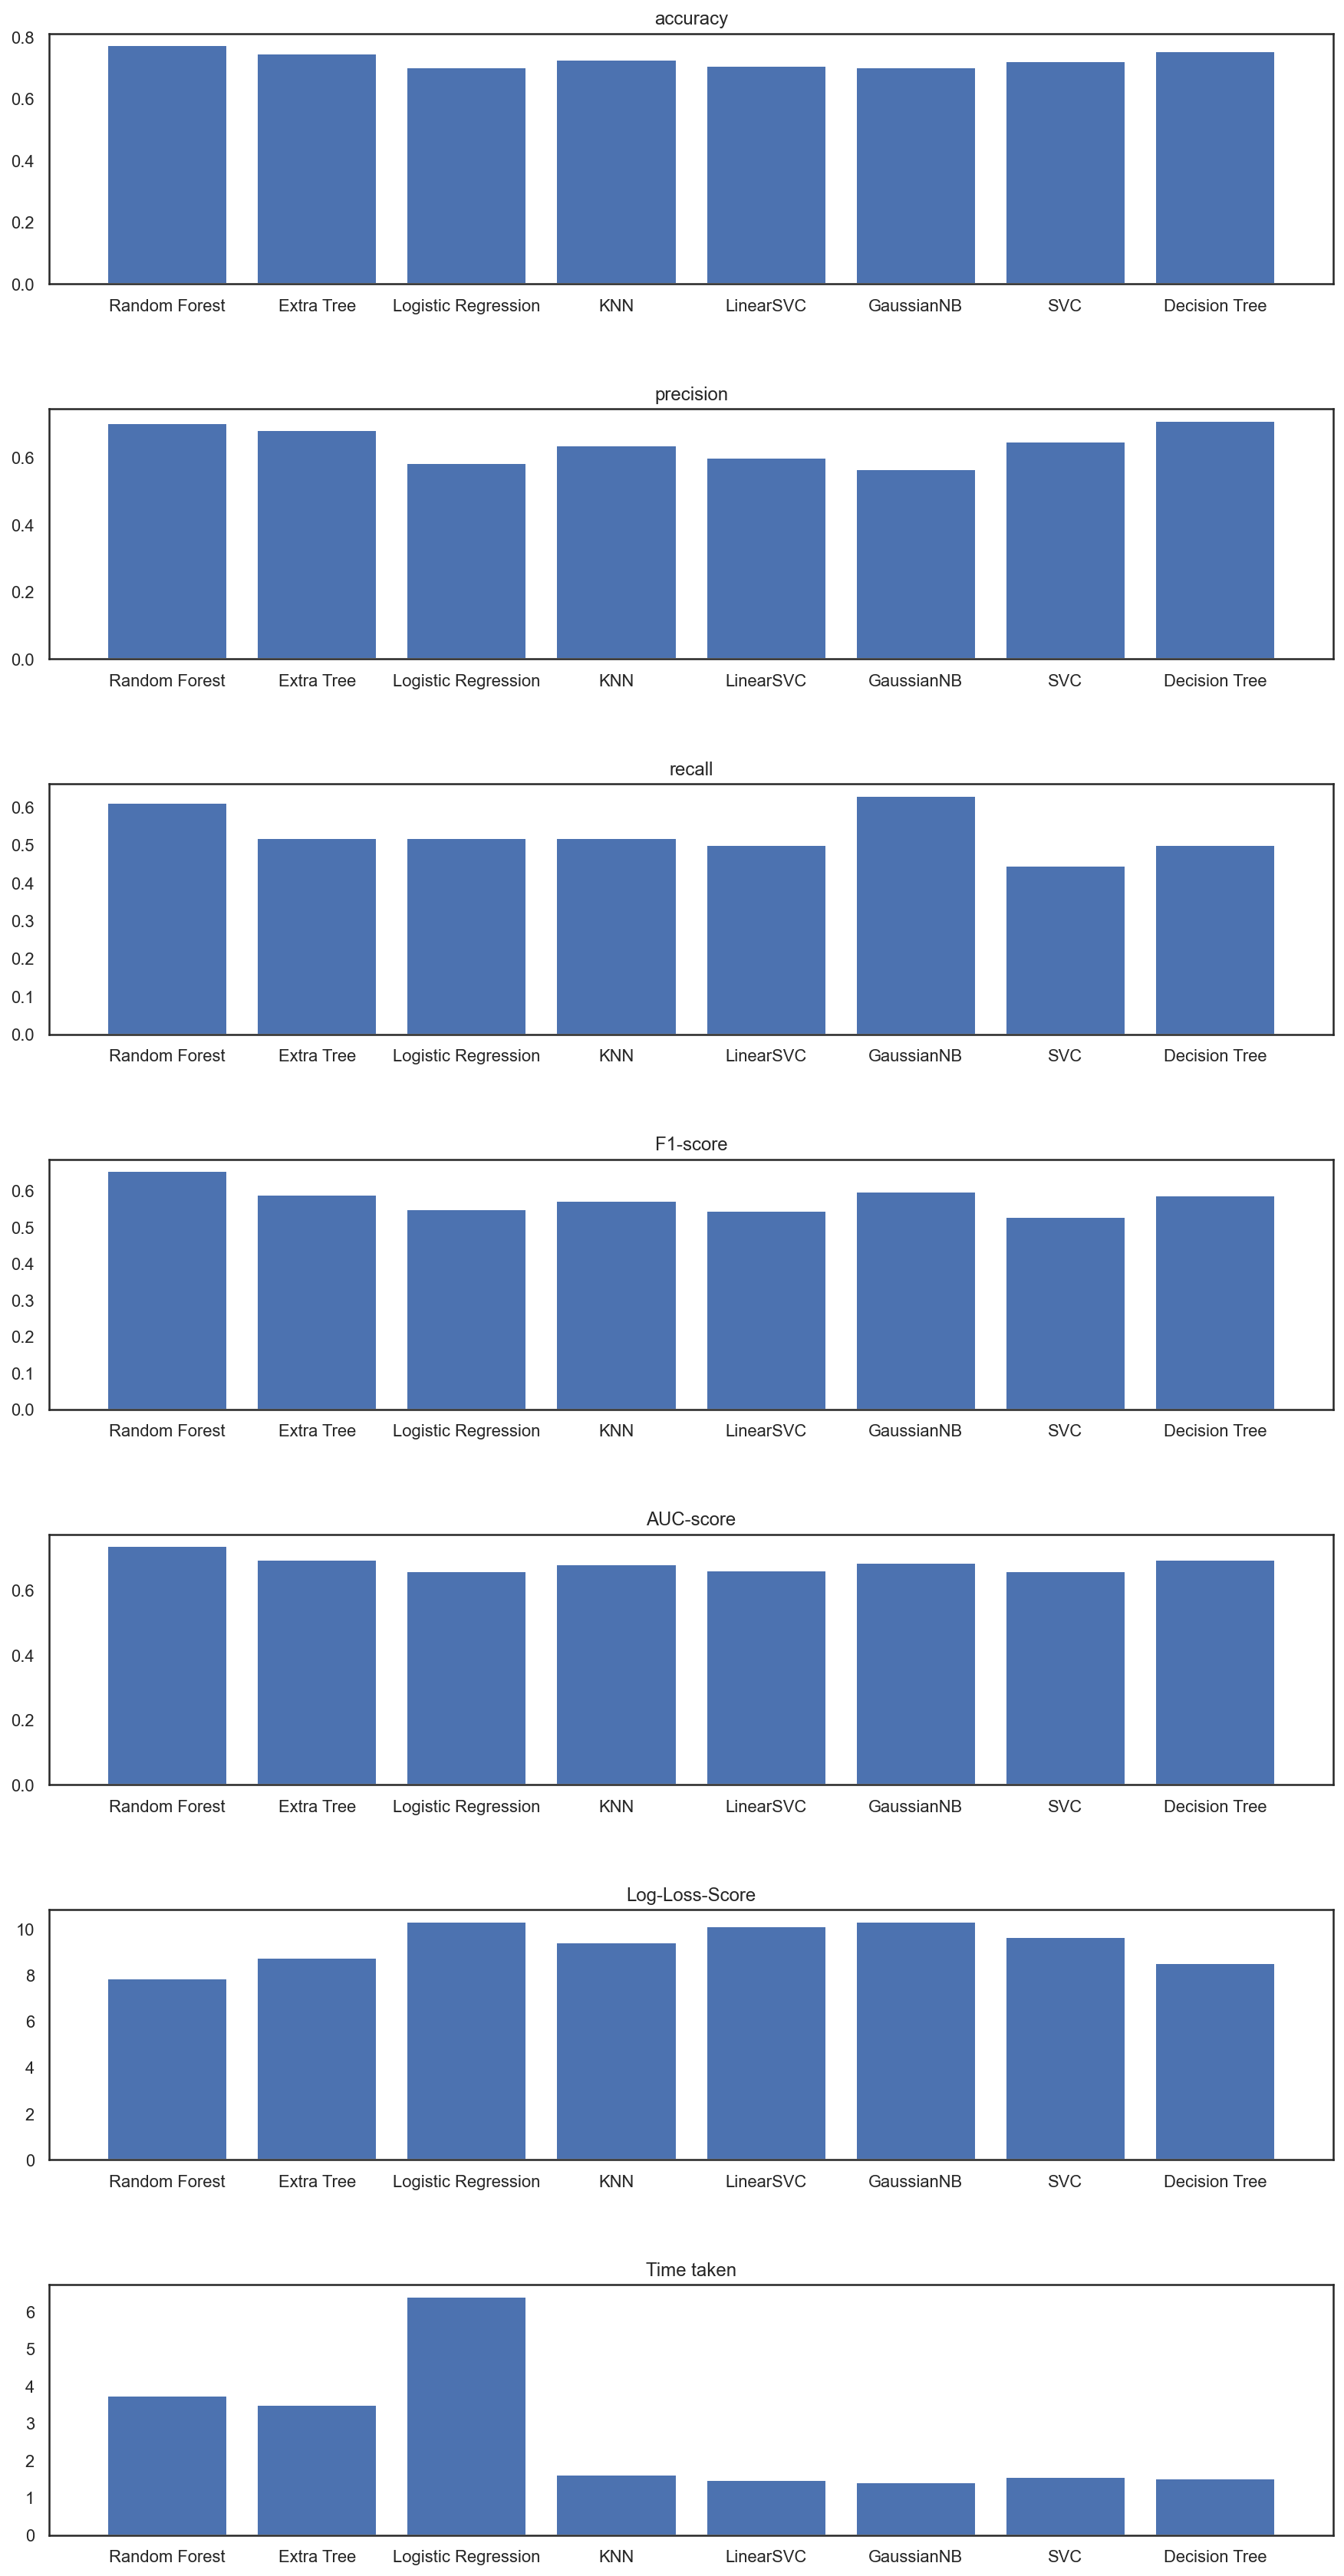

In [884]:
print("Hybrid Bat Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(15, 30))

ax[0].bar(df_hba.model, df_hba.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_hba.model, df_hba.precision)
ax[1].set_title('precision')

ax[2].bar(df_hba.model, df_hba.recall)
ax[2].set_title('recall')

ax[3].bar(df_hba.model, df_hba.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_hba.model, df_hba.rocauc)
ax[4].set_title('AUC-score')                                                                                          
                                                                                                                   
ax[5].bar(df_hba.model, df_hba.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_hba.model, df_hba.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### GERY WOLF MODEL

Grey Wolf Model




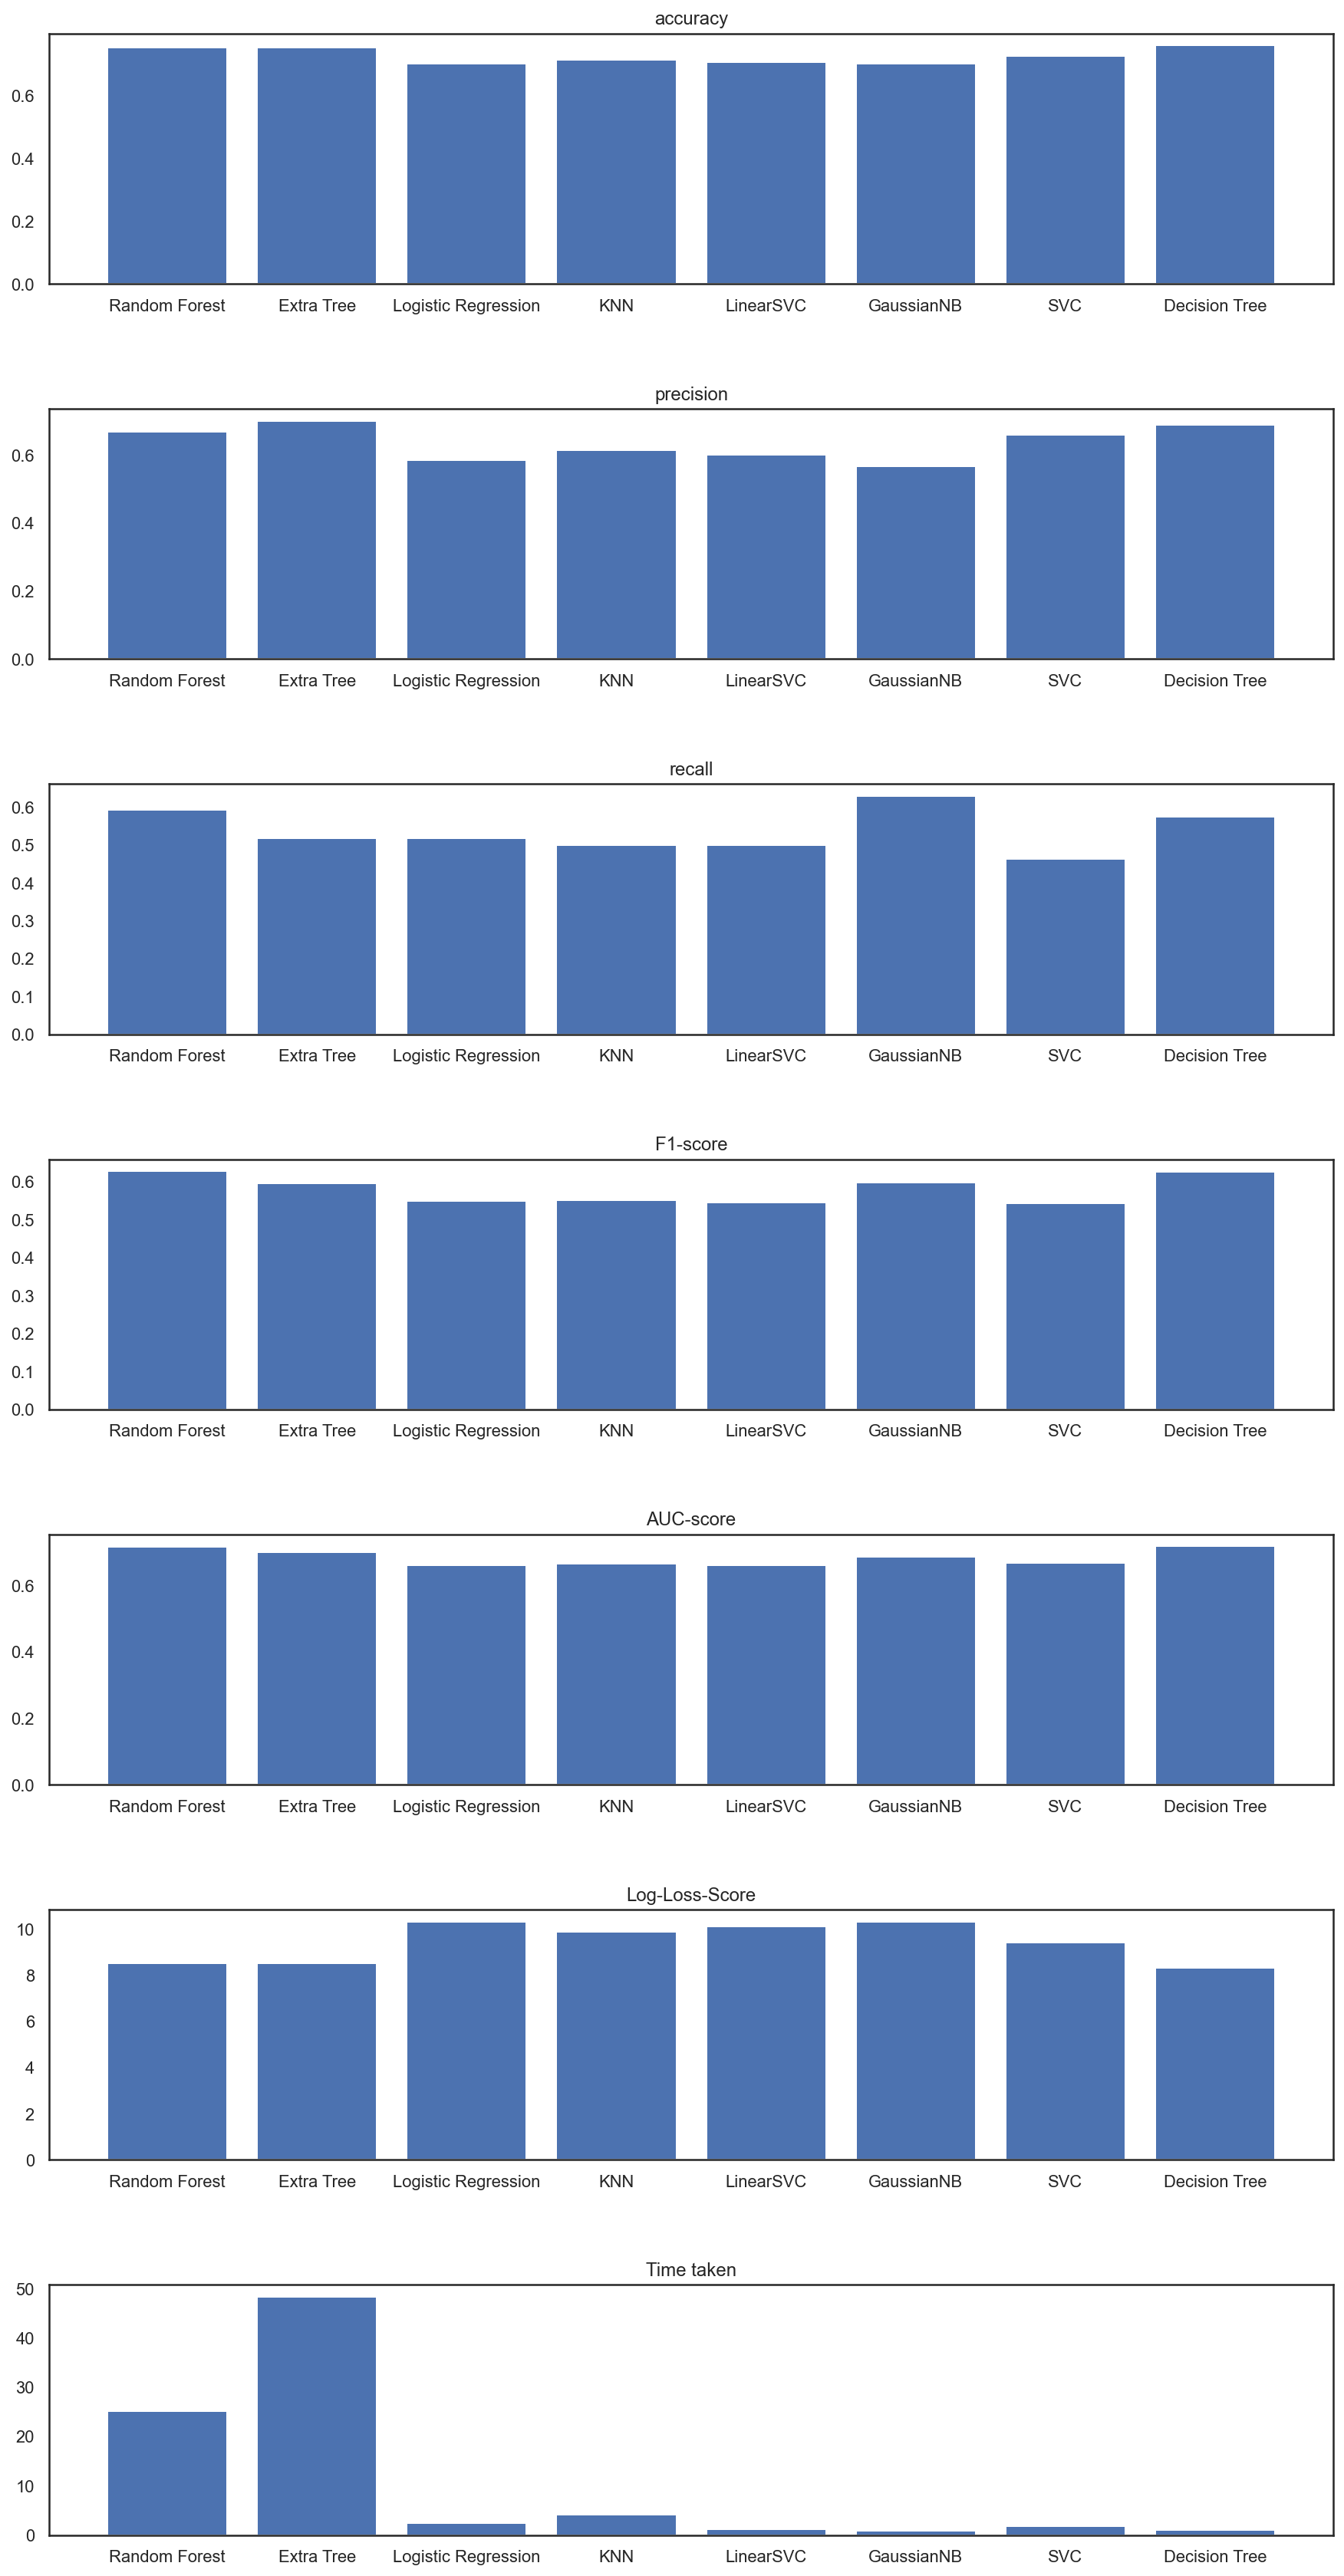

In [885]:
print("Grey Wolf Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(15, 30))

ax[0].bar(df_gwa.model, df_gwa.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_gwa.model, df_gwa.precision)
ax[1].set_title('precision')

ax[2].bar(df_gwa.model, df_gwa.recall)
ax[2].set_title('recall')

ax[3].bar(df_gwa.model, df_gwa.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_gwa.model, df_gwa.rocauc)
ax[4].set_title('AUC-score')                                                                                          
                                                                                                                   
ax[5].bar(df_gwa.model, df_gwa.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_gwa.model, df_gwa.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### FIREFLY MODEL

Firefly Model




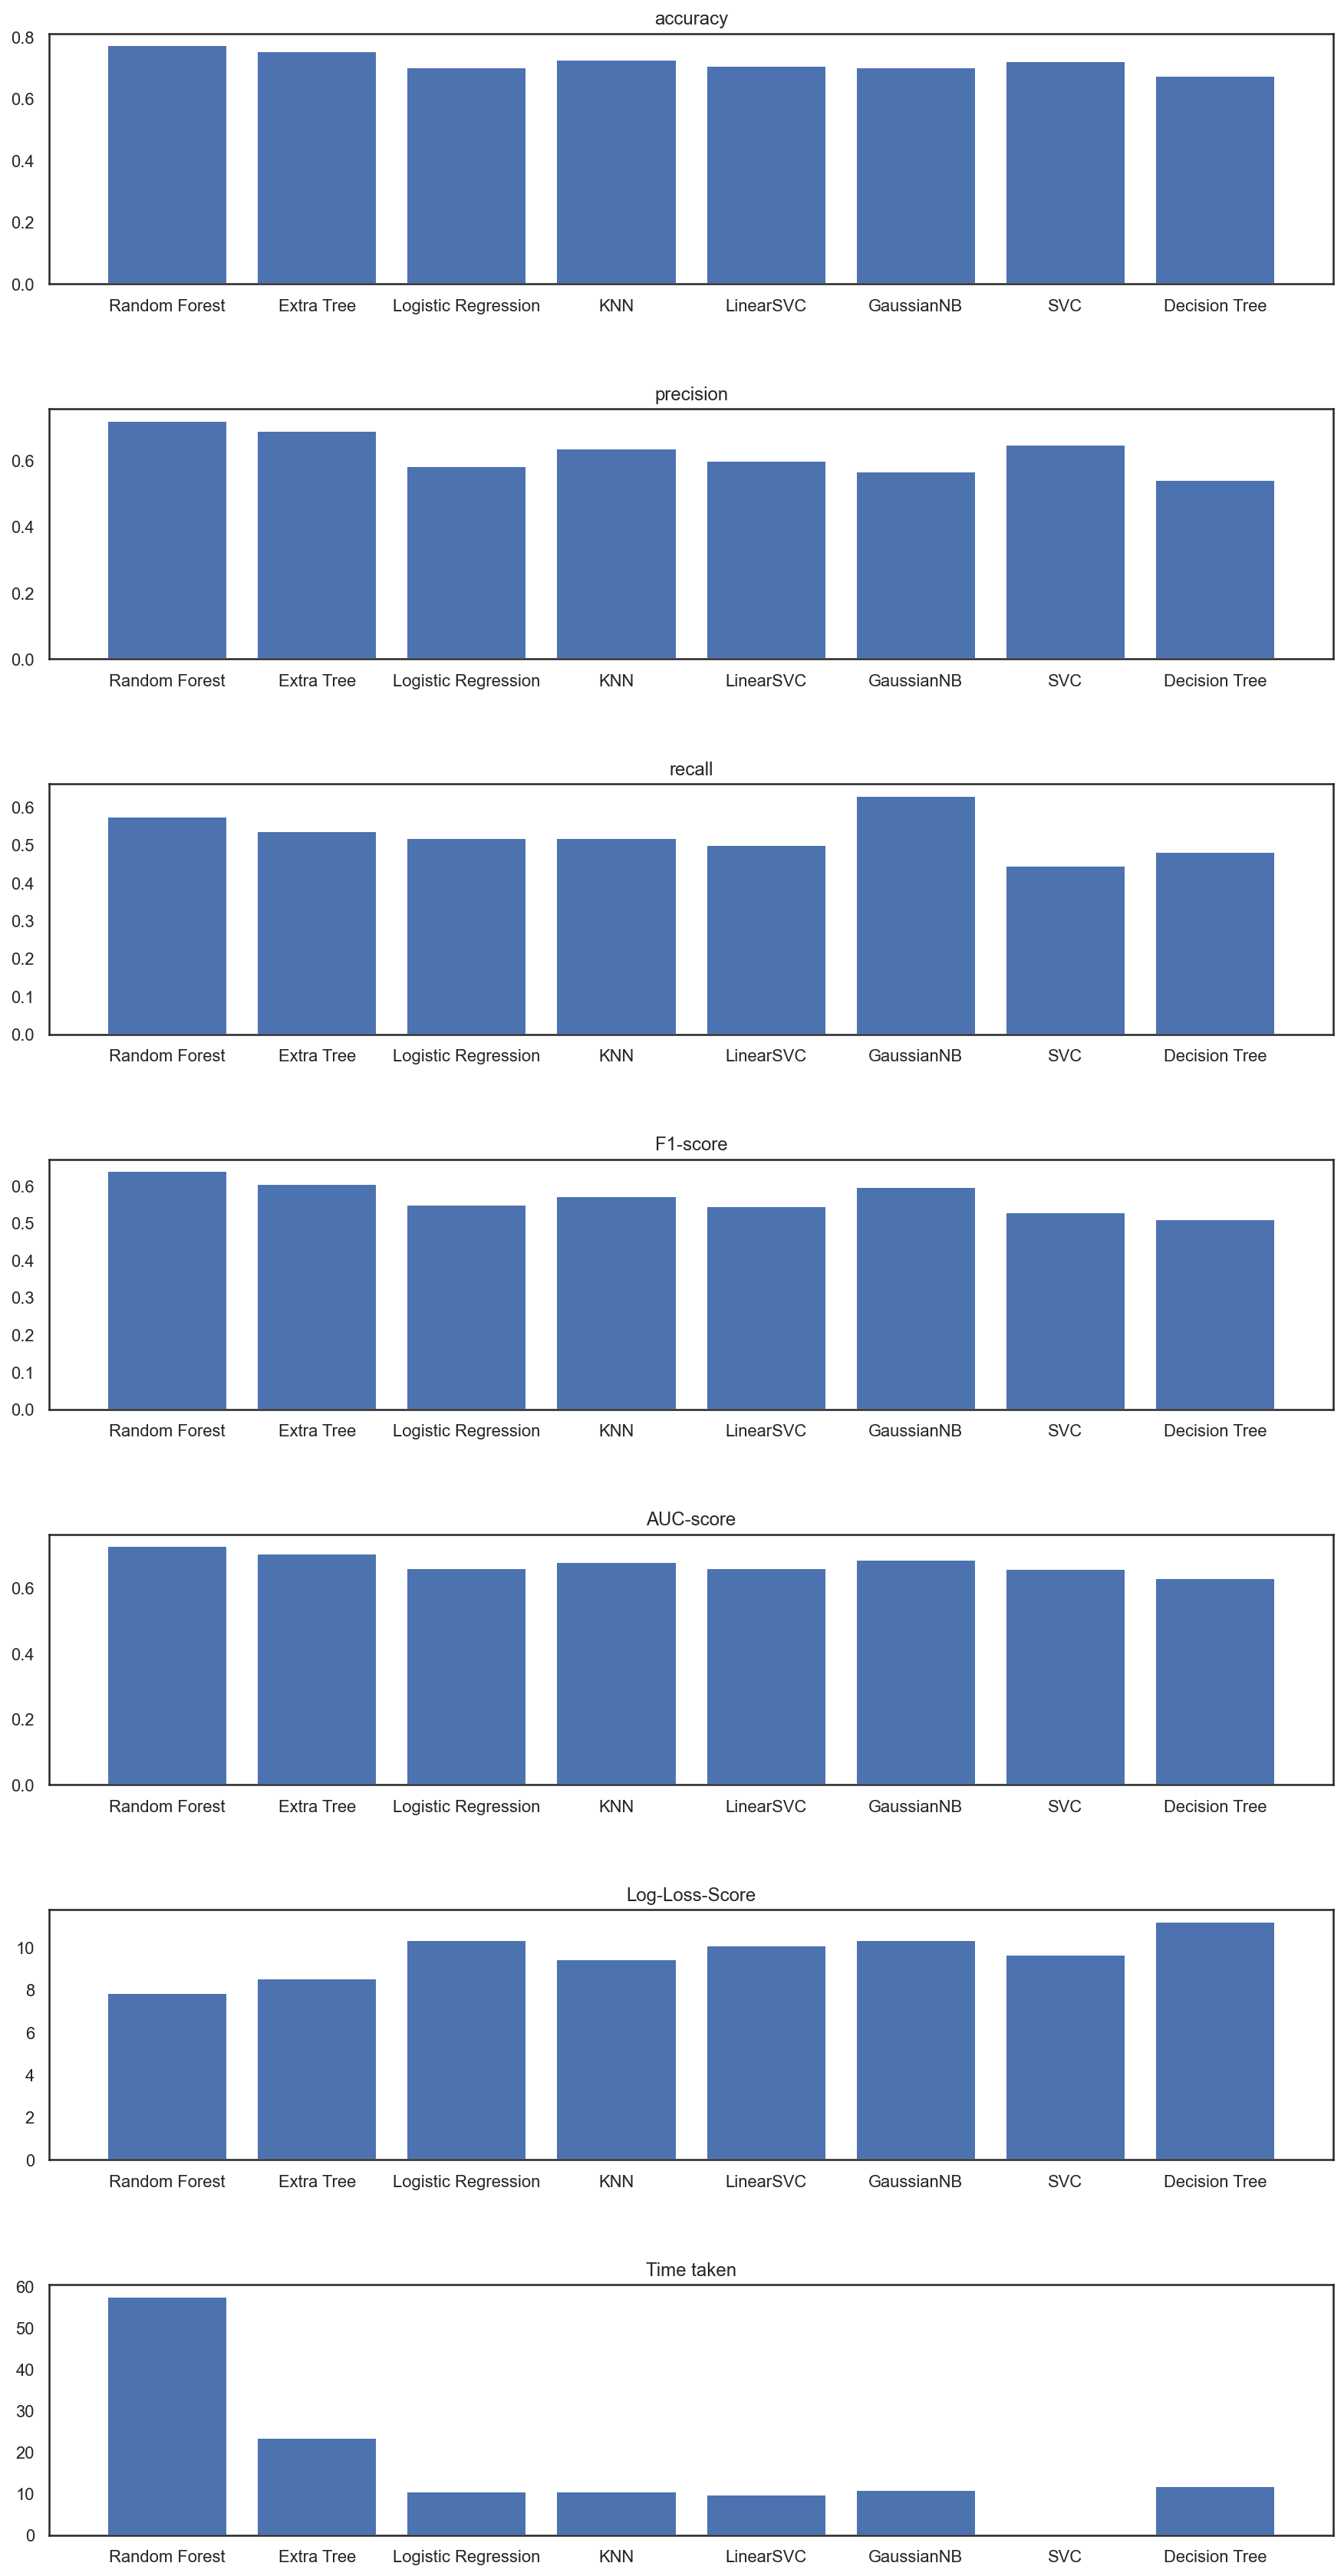

In [886]:
print("Firefly Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(15, 30))

ax[0].bar(df_fa.model, df_fa.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_fa.model, df_fa.precision)
ax[1].set_title('precision')

ax[2].bar(df_fa.model, df_fa.recall)
ax[2].set_title('recall')

ax[3].bar(df_fa.model, df_fa.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_fa.model, df_fa.rocauc)
ax[4].set_title('AUC-score')                                                                                          
                                                                                                                   
ax[5].bar(df_fa.model, df_fa.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_fa.model, df_fa.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)